In [2]:
#load the patchclamp data class from functions
from functions import PatchClampData
import os

The aim of this demos to give an idea of how the figures for the paper - - were generated 
Here is one where the example exp59 dataset can be displayed to show how the function works

In [3]:
exp59 = PatchClampData(r"$base_dir$\data.csv", molecule_id="5")

note codeblock below will save file to molecule_id/experimental_conds/experiment_id

[0, 1, 2, 3]


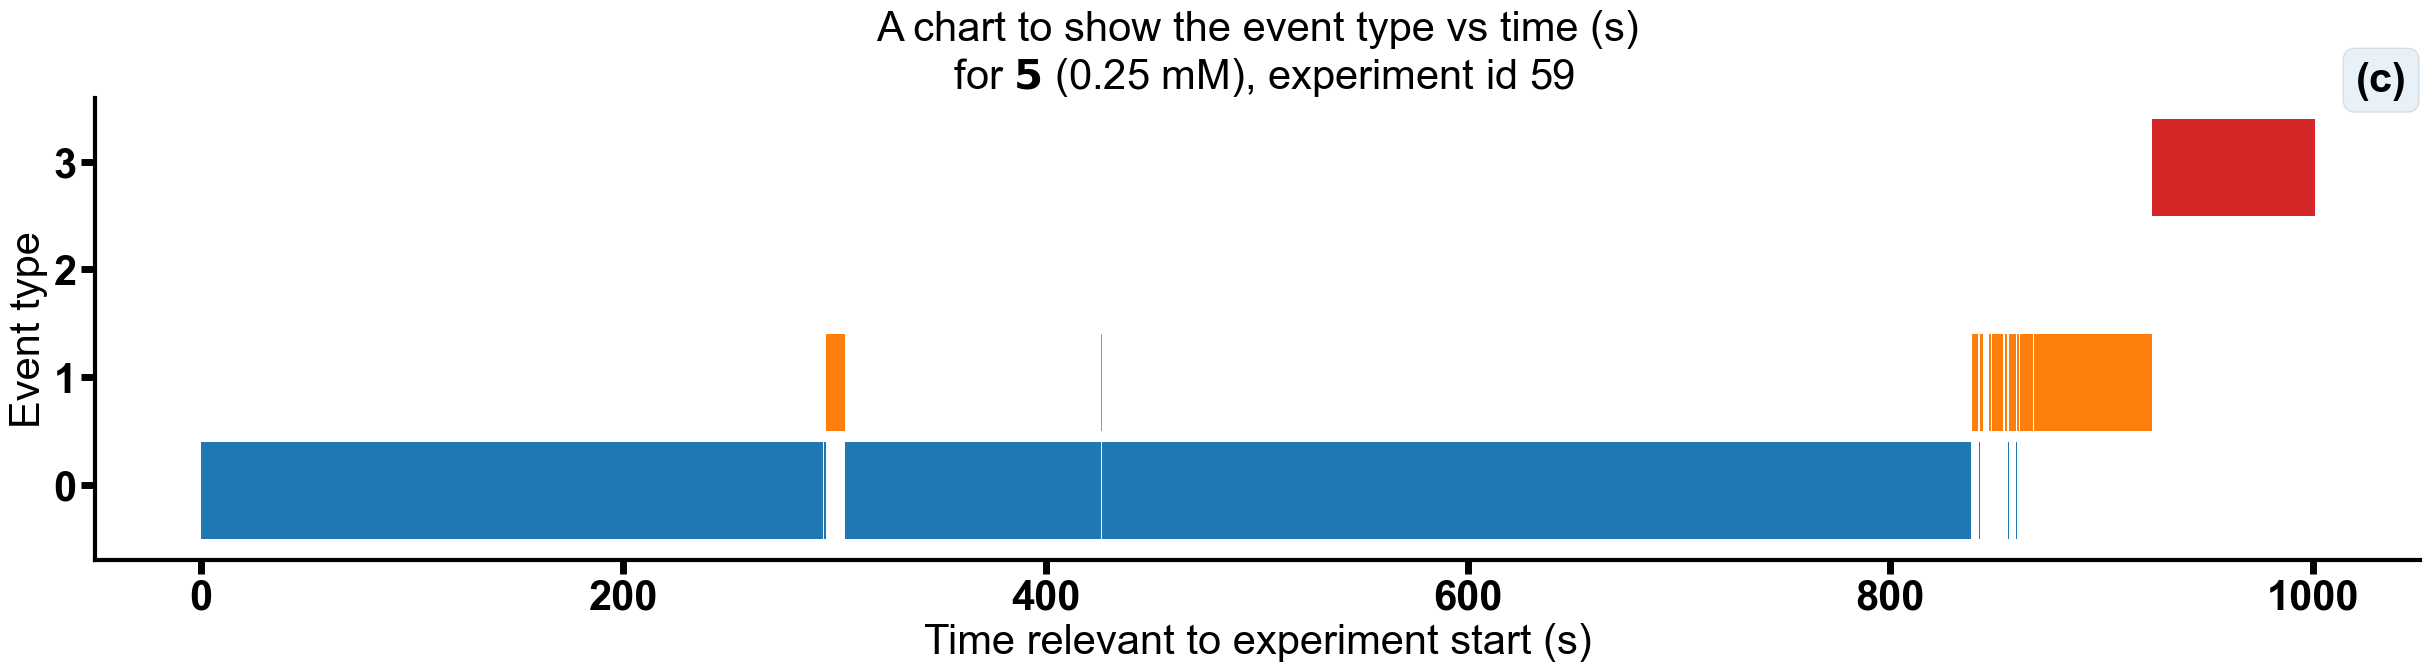

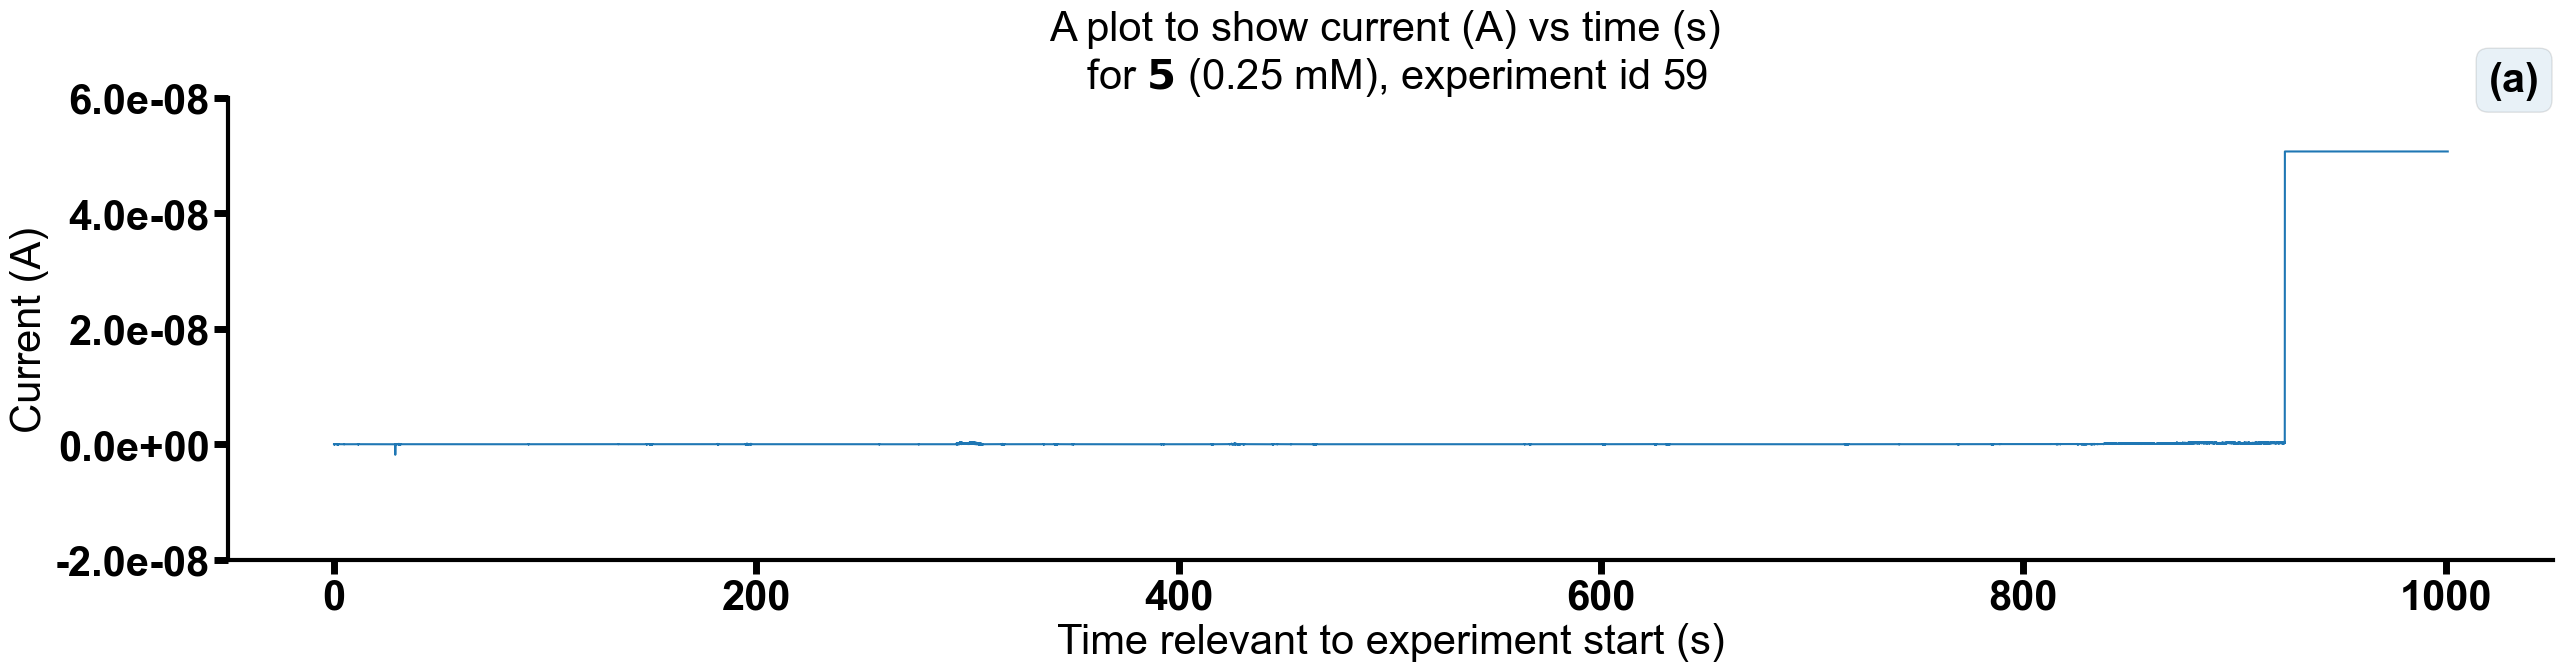

total_experiment_time molecule_ID  experiment_ID exp_cond  \
1               1000.998           5           59.0  0.25 mM   

   size_of_window_for_baseline_current  baseline_current_mean  \
1                                100.0          -2.413208e-12   

   baseline_current_max  baseline_current_min  baseline_noise_std  \
1          6.187713e-12         -1.237543e-11        4.008167e-12   

   baseline_threshold  ... time_weighted_mean_current_for_event_2  \
1        1.594959e-12  ...                              0.000e+00   

  time_in_event_2 percentage_of_time_in_event_2 first_time_entering_event_2  \
1       0.000e+00                           0.0                         0.0   

   first_event_length_2  time_weighted_mean_current_for_event_3  \
1                   0.0                               5.069e-08   

  time_in_event_3 percentage_of_time_in_event_3 first_time_entering_event_3  \
1       7.718e+01                           7.7                     923.764   

   first_event_length_3  
1                77.178  

[1 rows x 31 columns]

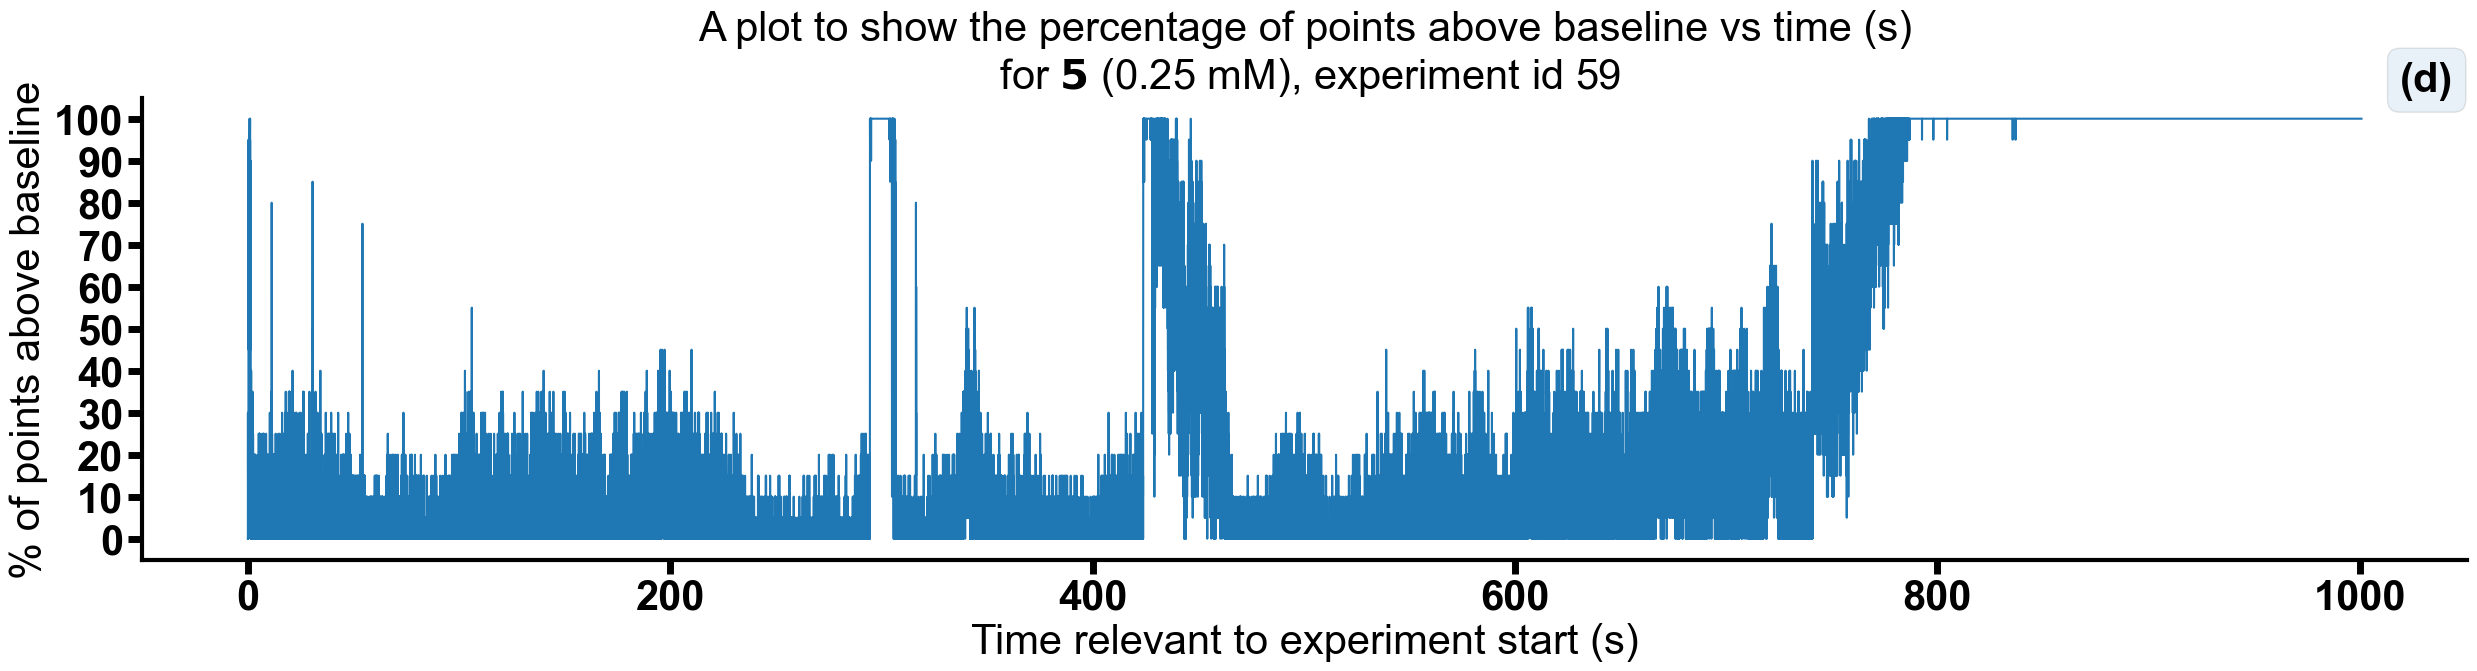

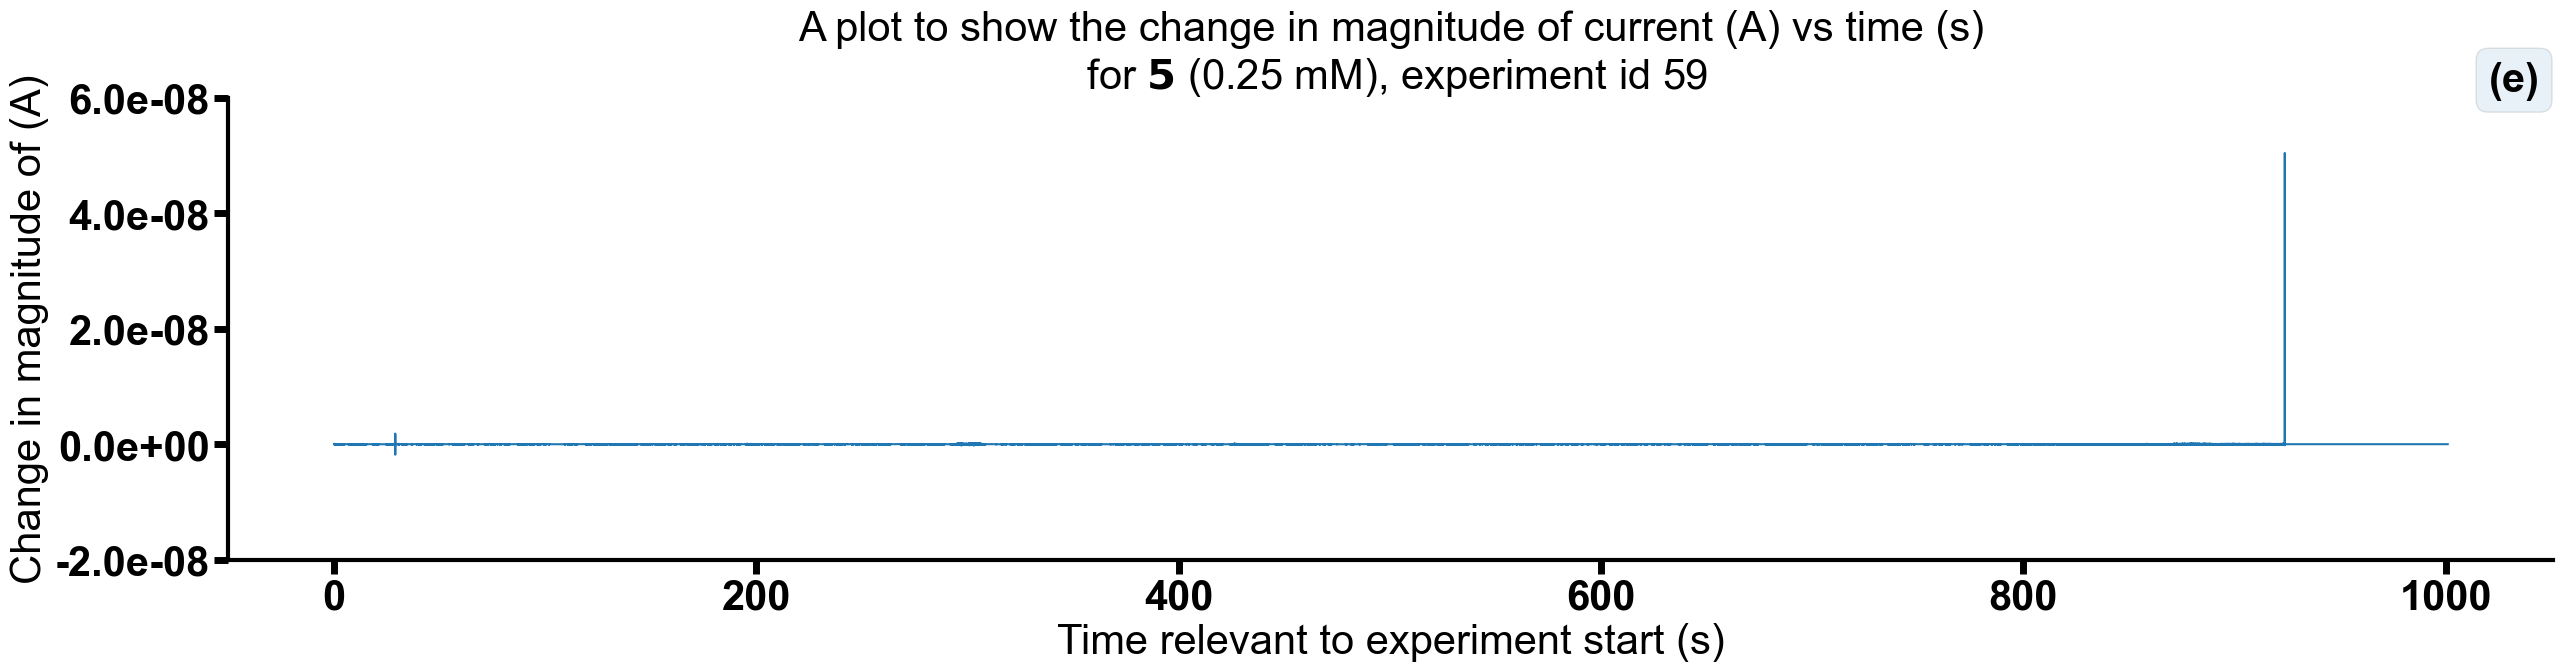

In [6]:
exp59.categorize_data(bin_range=True)
exp59.bin_event_allocation_summary()
exp59.plot_gantt()
exp59.static_plot_with_labels()
exp59.create_fig_caption()
exp59.generate_interactive_plot()
exp59.basic_static_plot()
exp59.static_plot_with_labels()
exp59.time_vs_percentage_of_points_above_baseline_allocation_plot()
exp59.time_vs_change_in_current_plot()
exp59.static_event_plots(append_to_figure_doc=False,max_current_cutoff=5e-10)
exp59.create_combined_figure(append_to_figure_doc=False)
exp59.experiment_summary_dataframe#.to_csv(f'experiment_summary.csv', index=True) # can also be save to csv


Generate time specfic plots

## Variable conc ##
shows how though not automated any section of the patchcalmp data can be used for analysis

In [ ]:
exp59 = PatchClampData(r"$base_dir$\data.csv", molecule_id="5")

KeyboardInterrupt: 

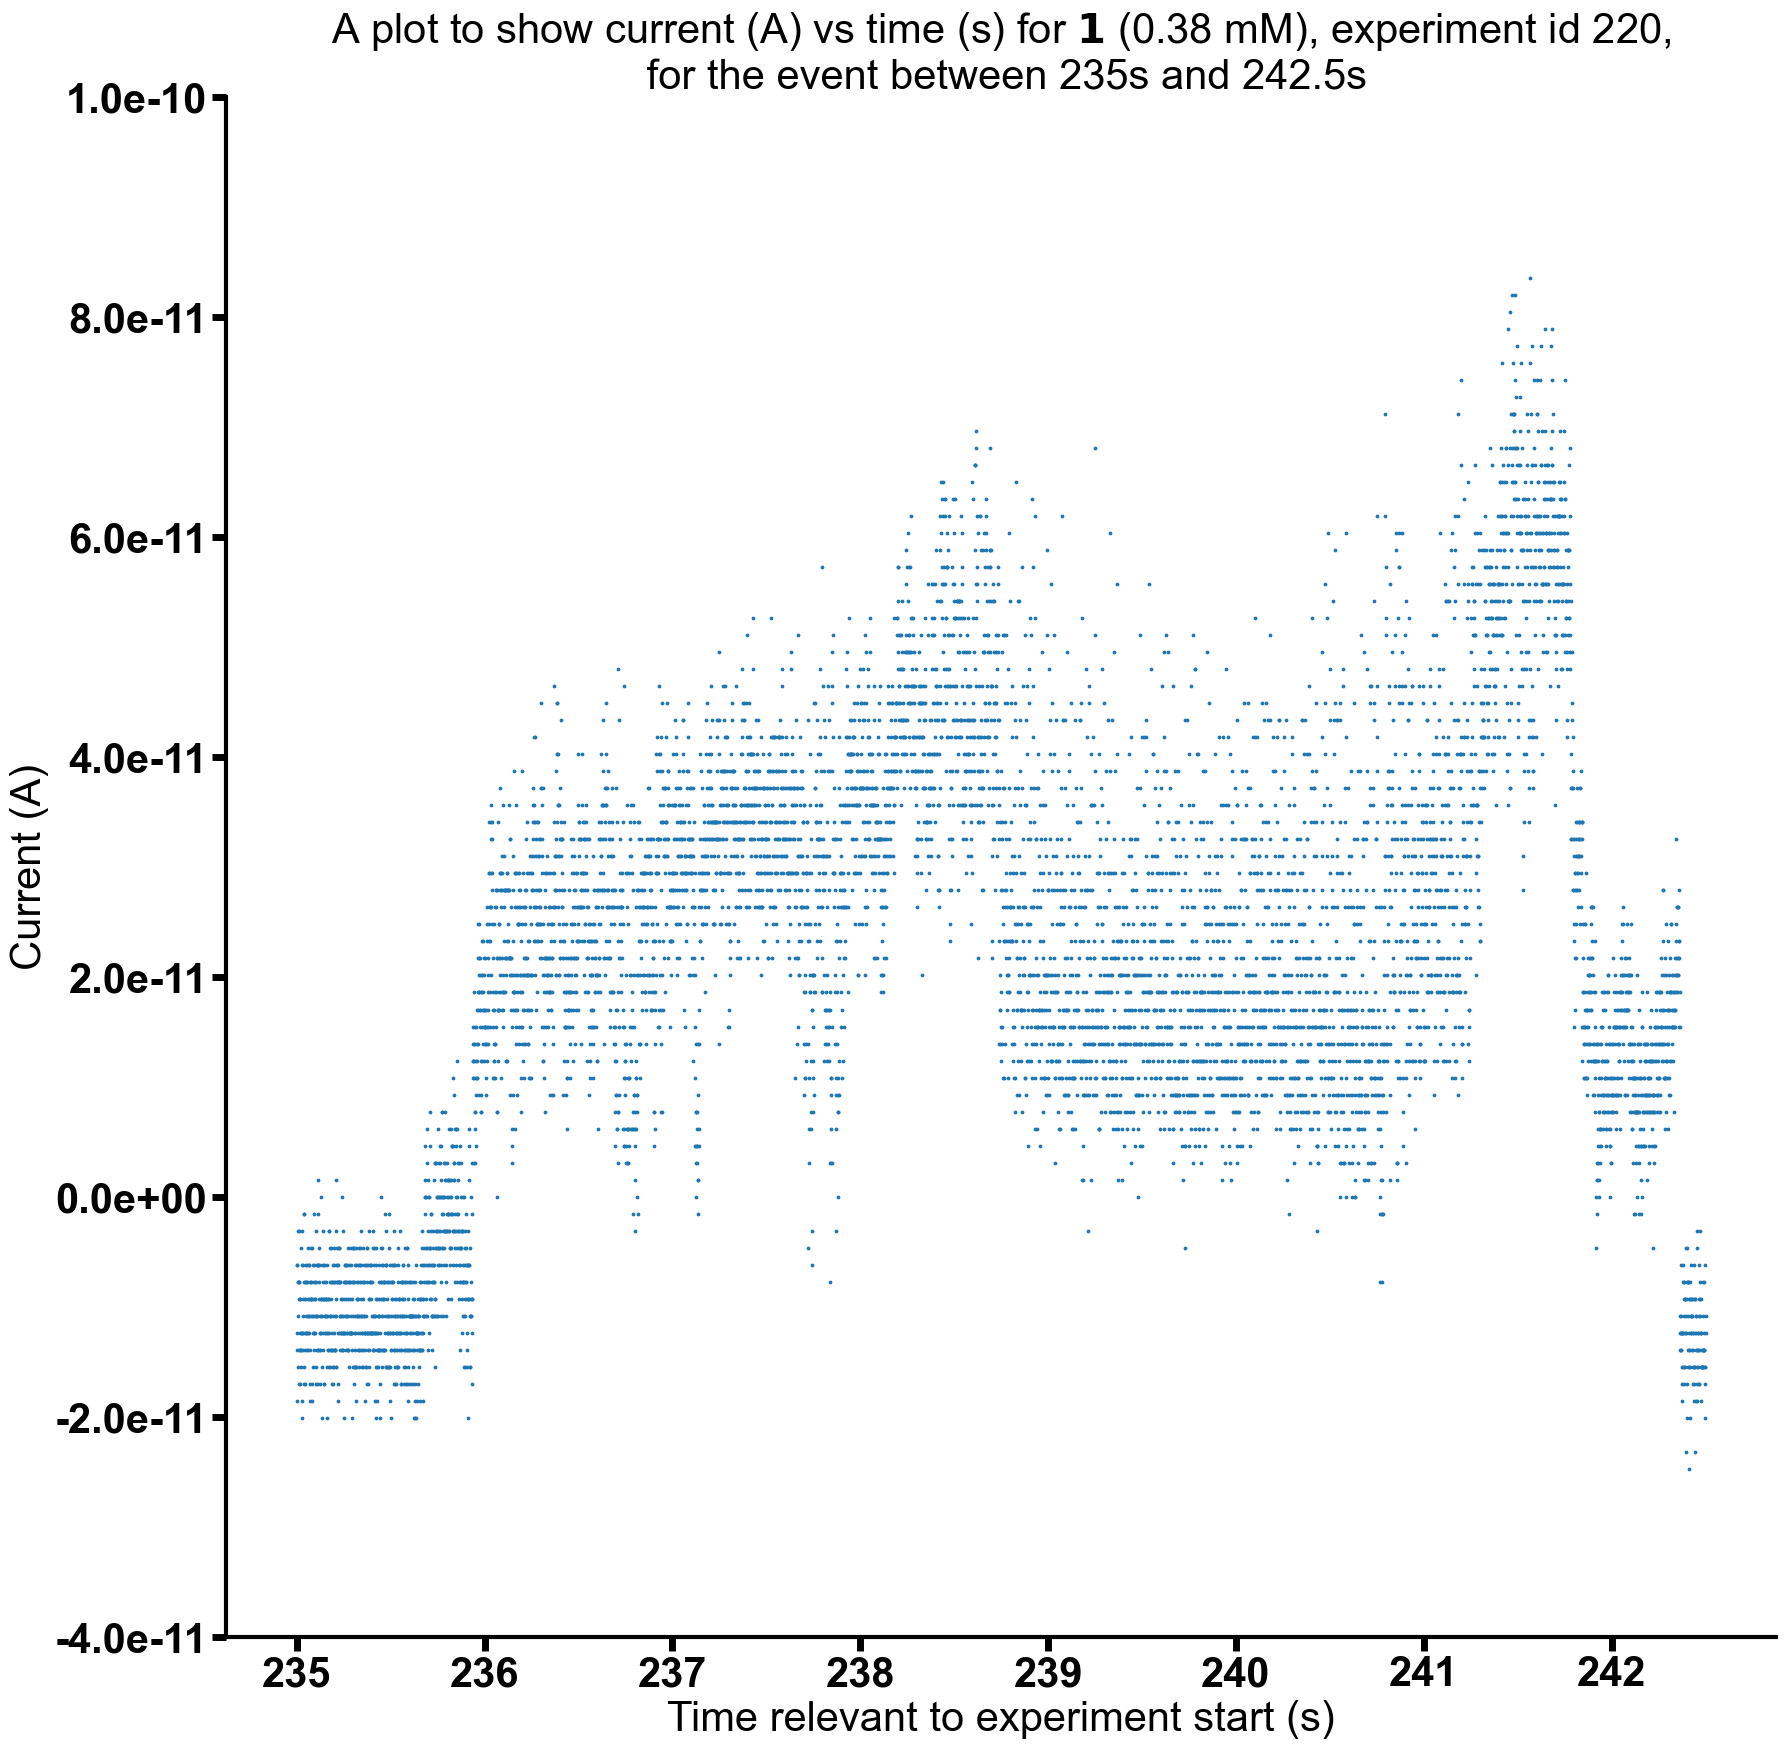

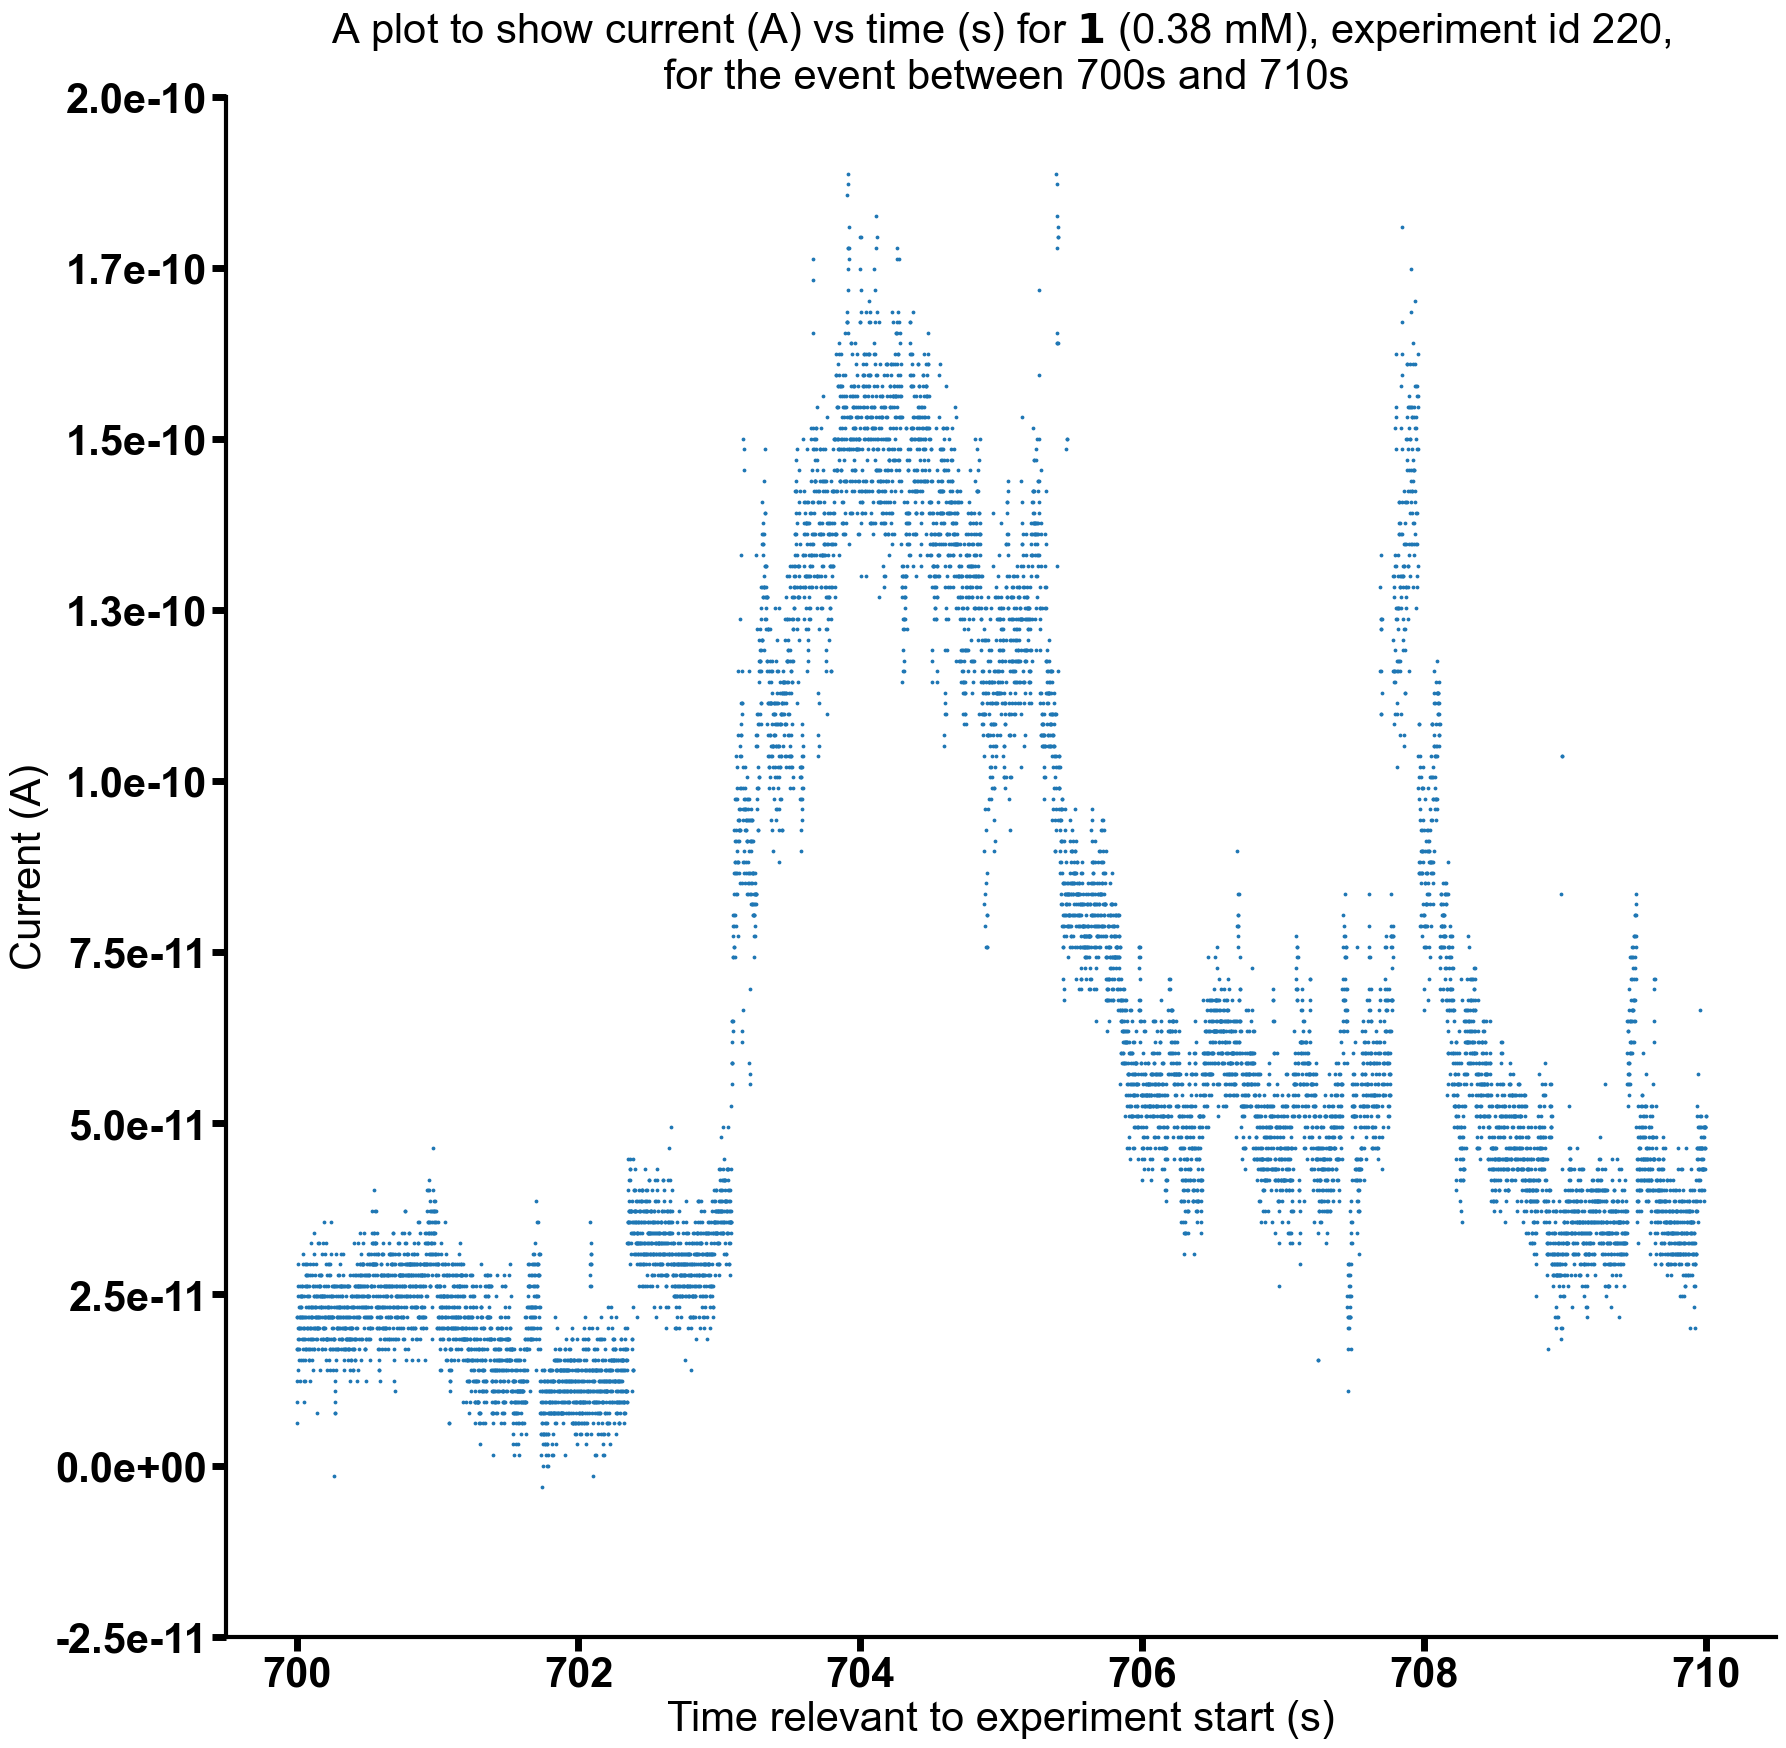

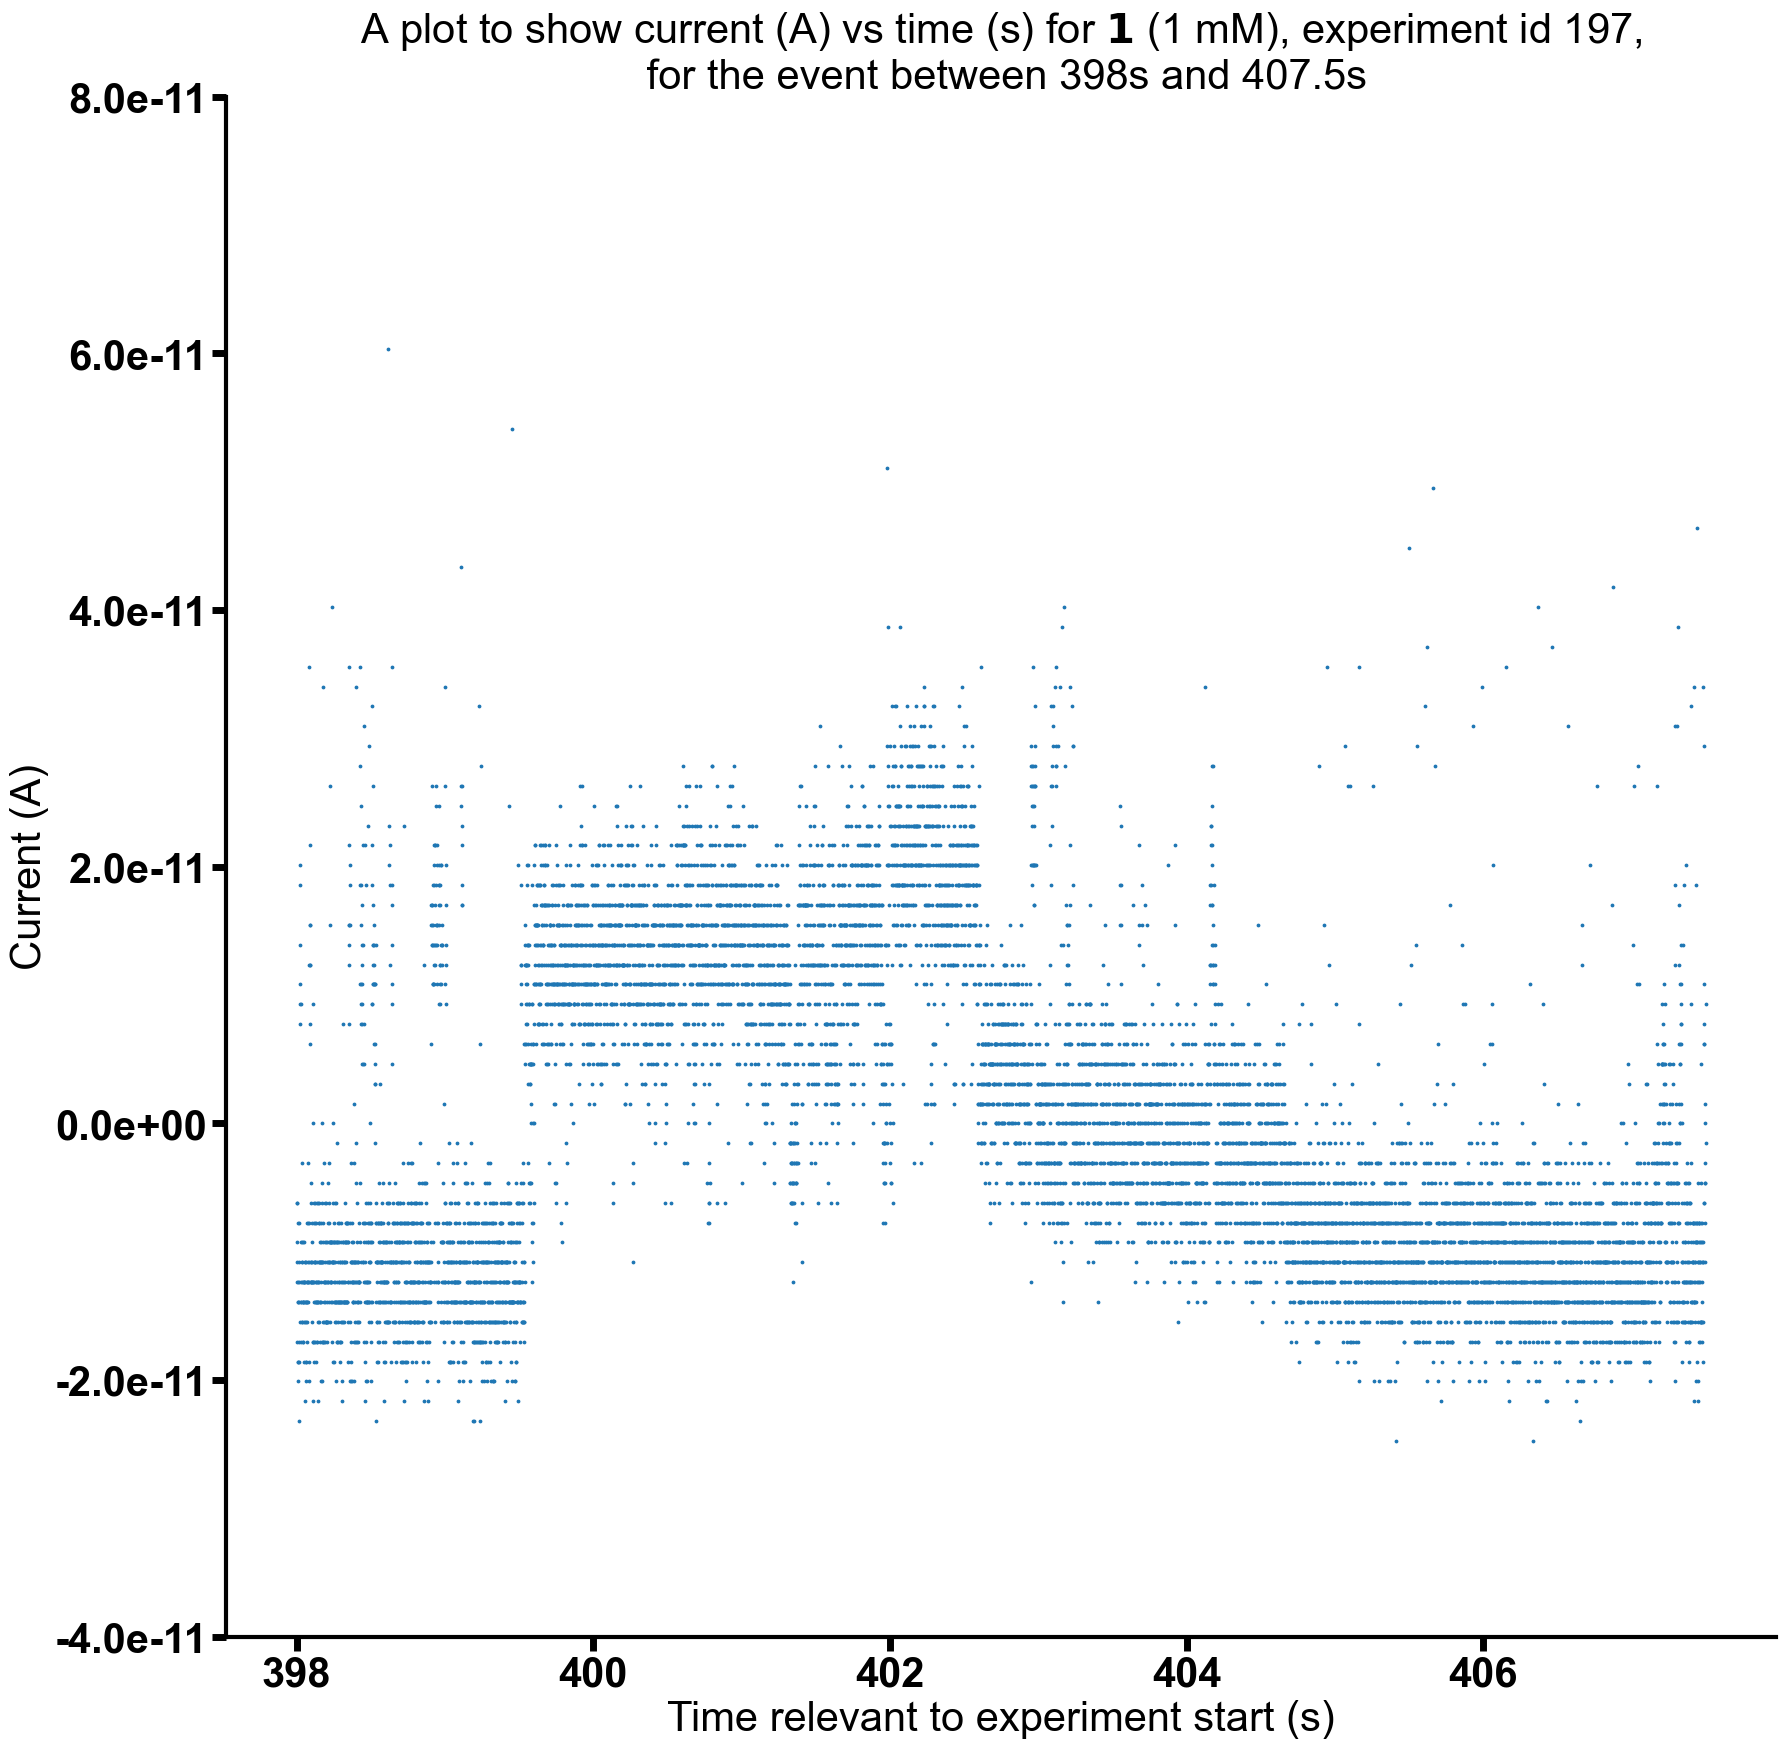

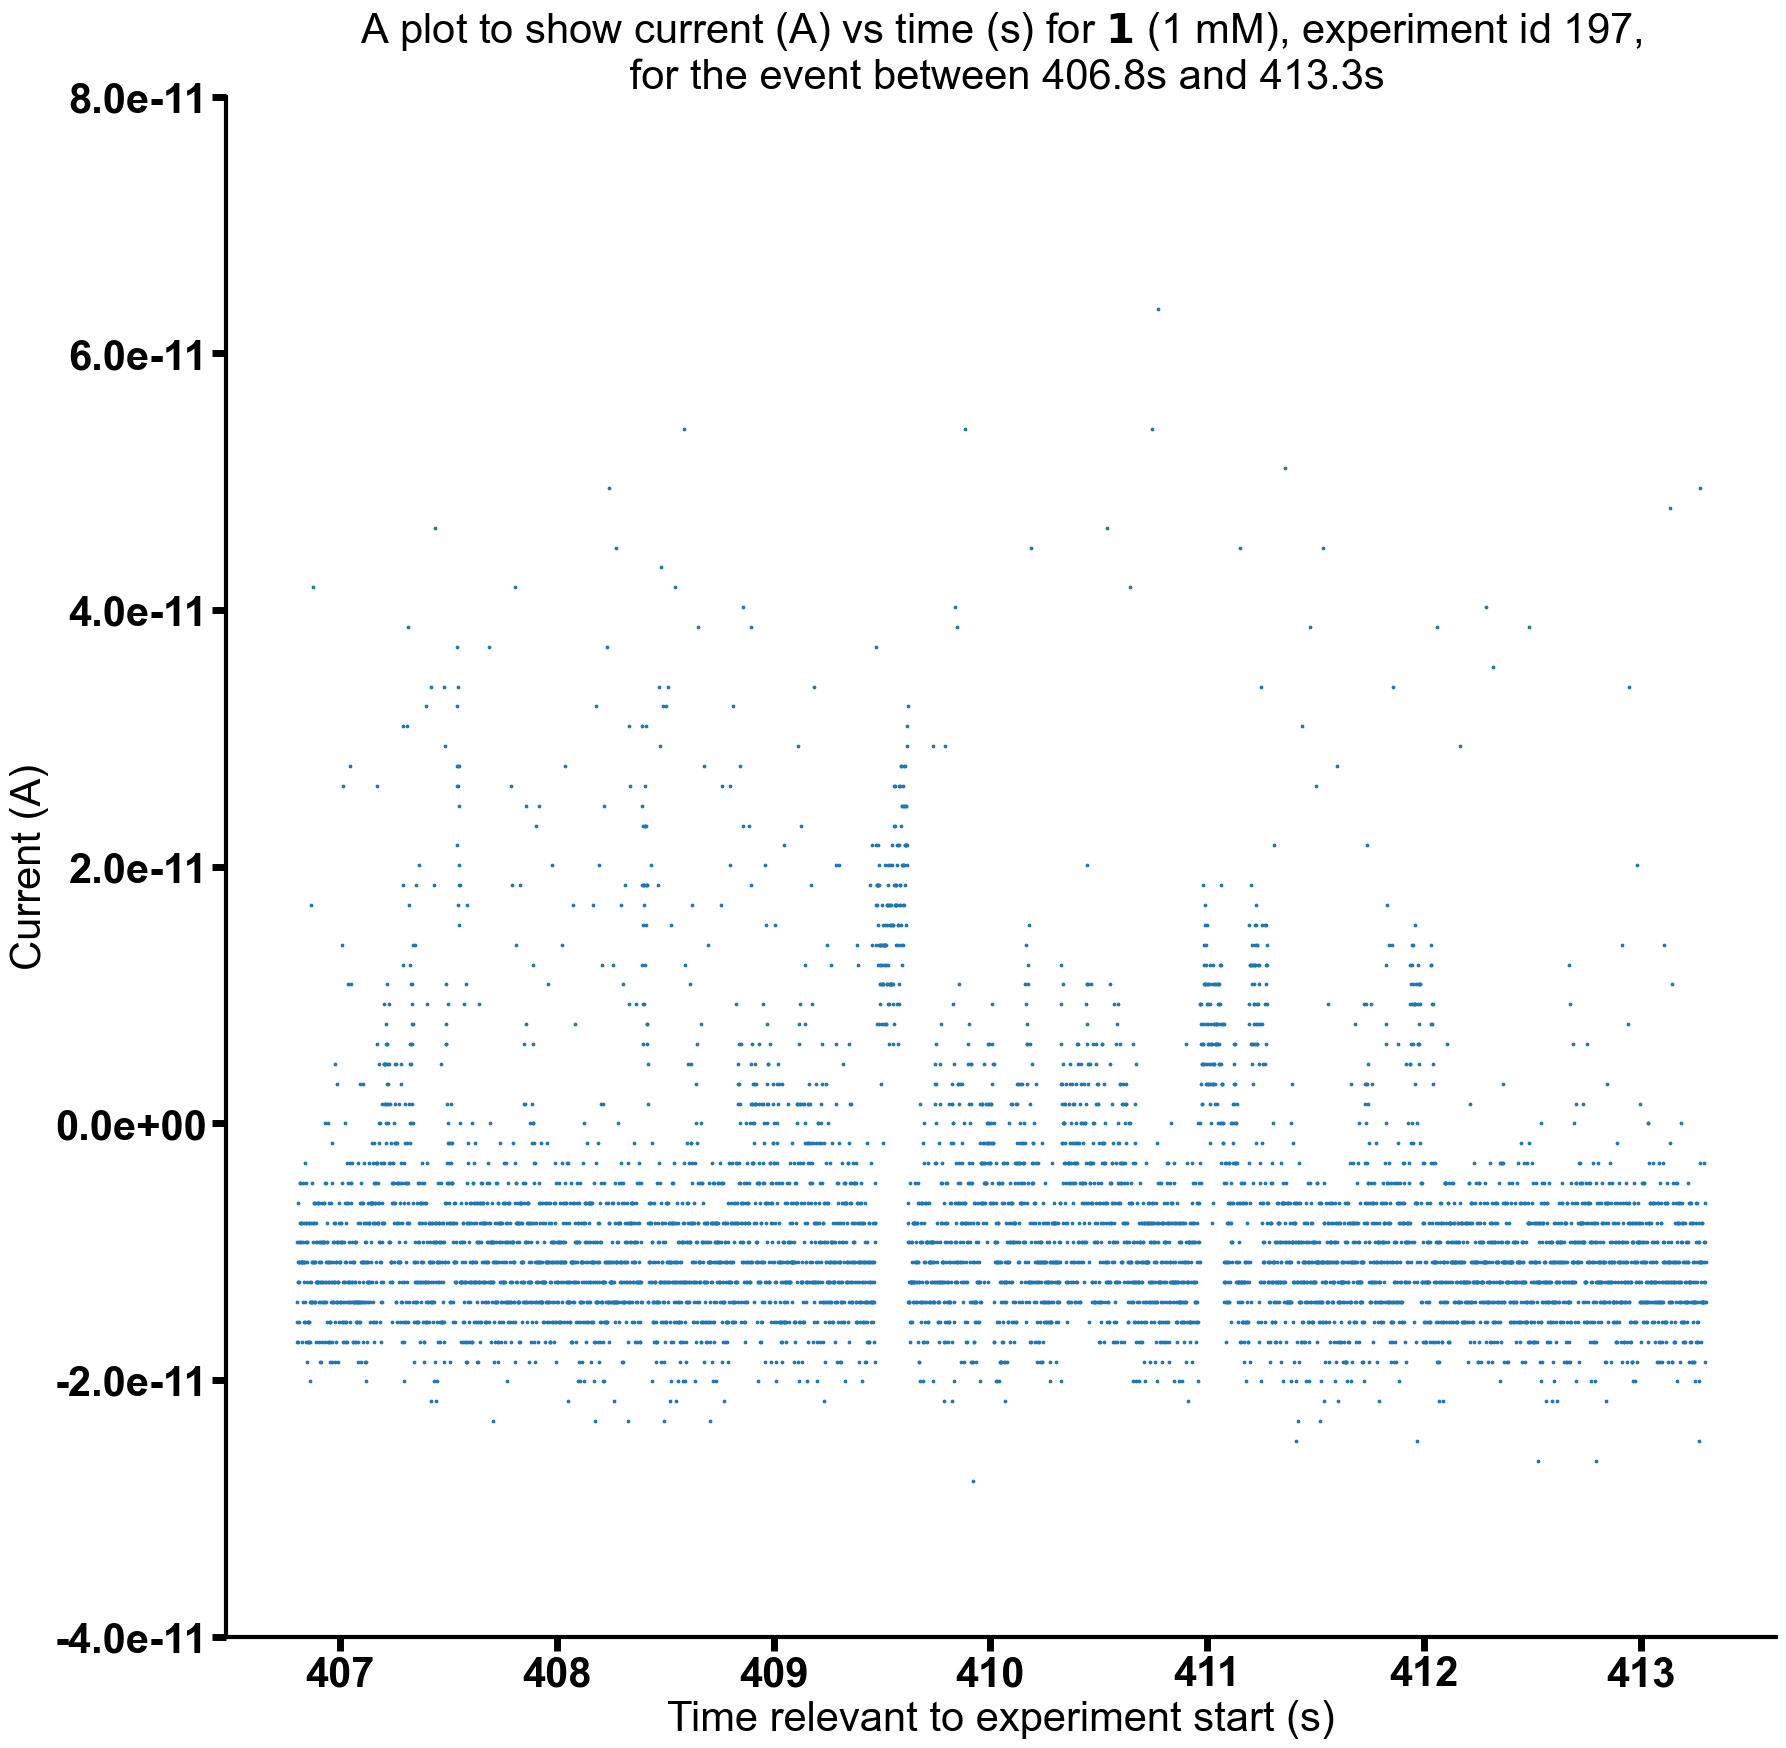

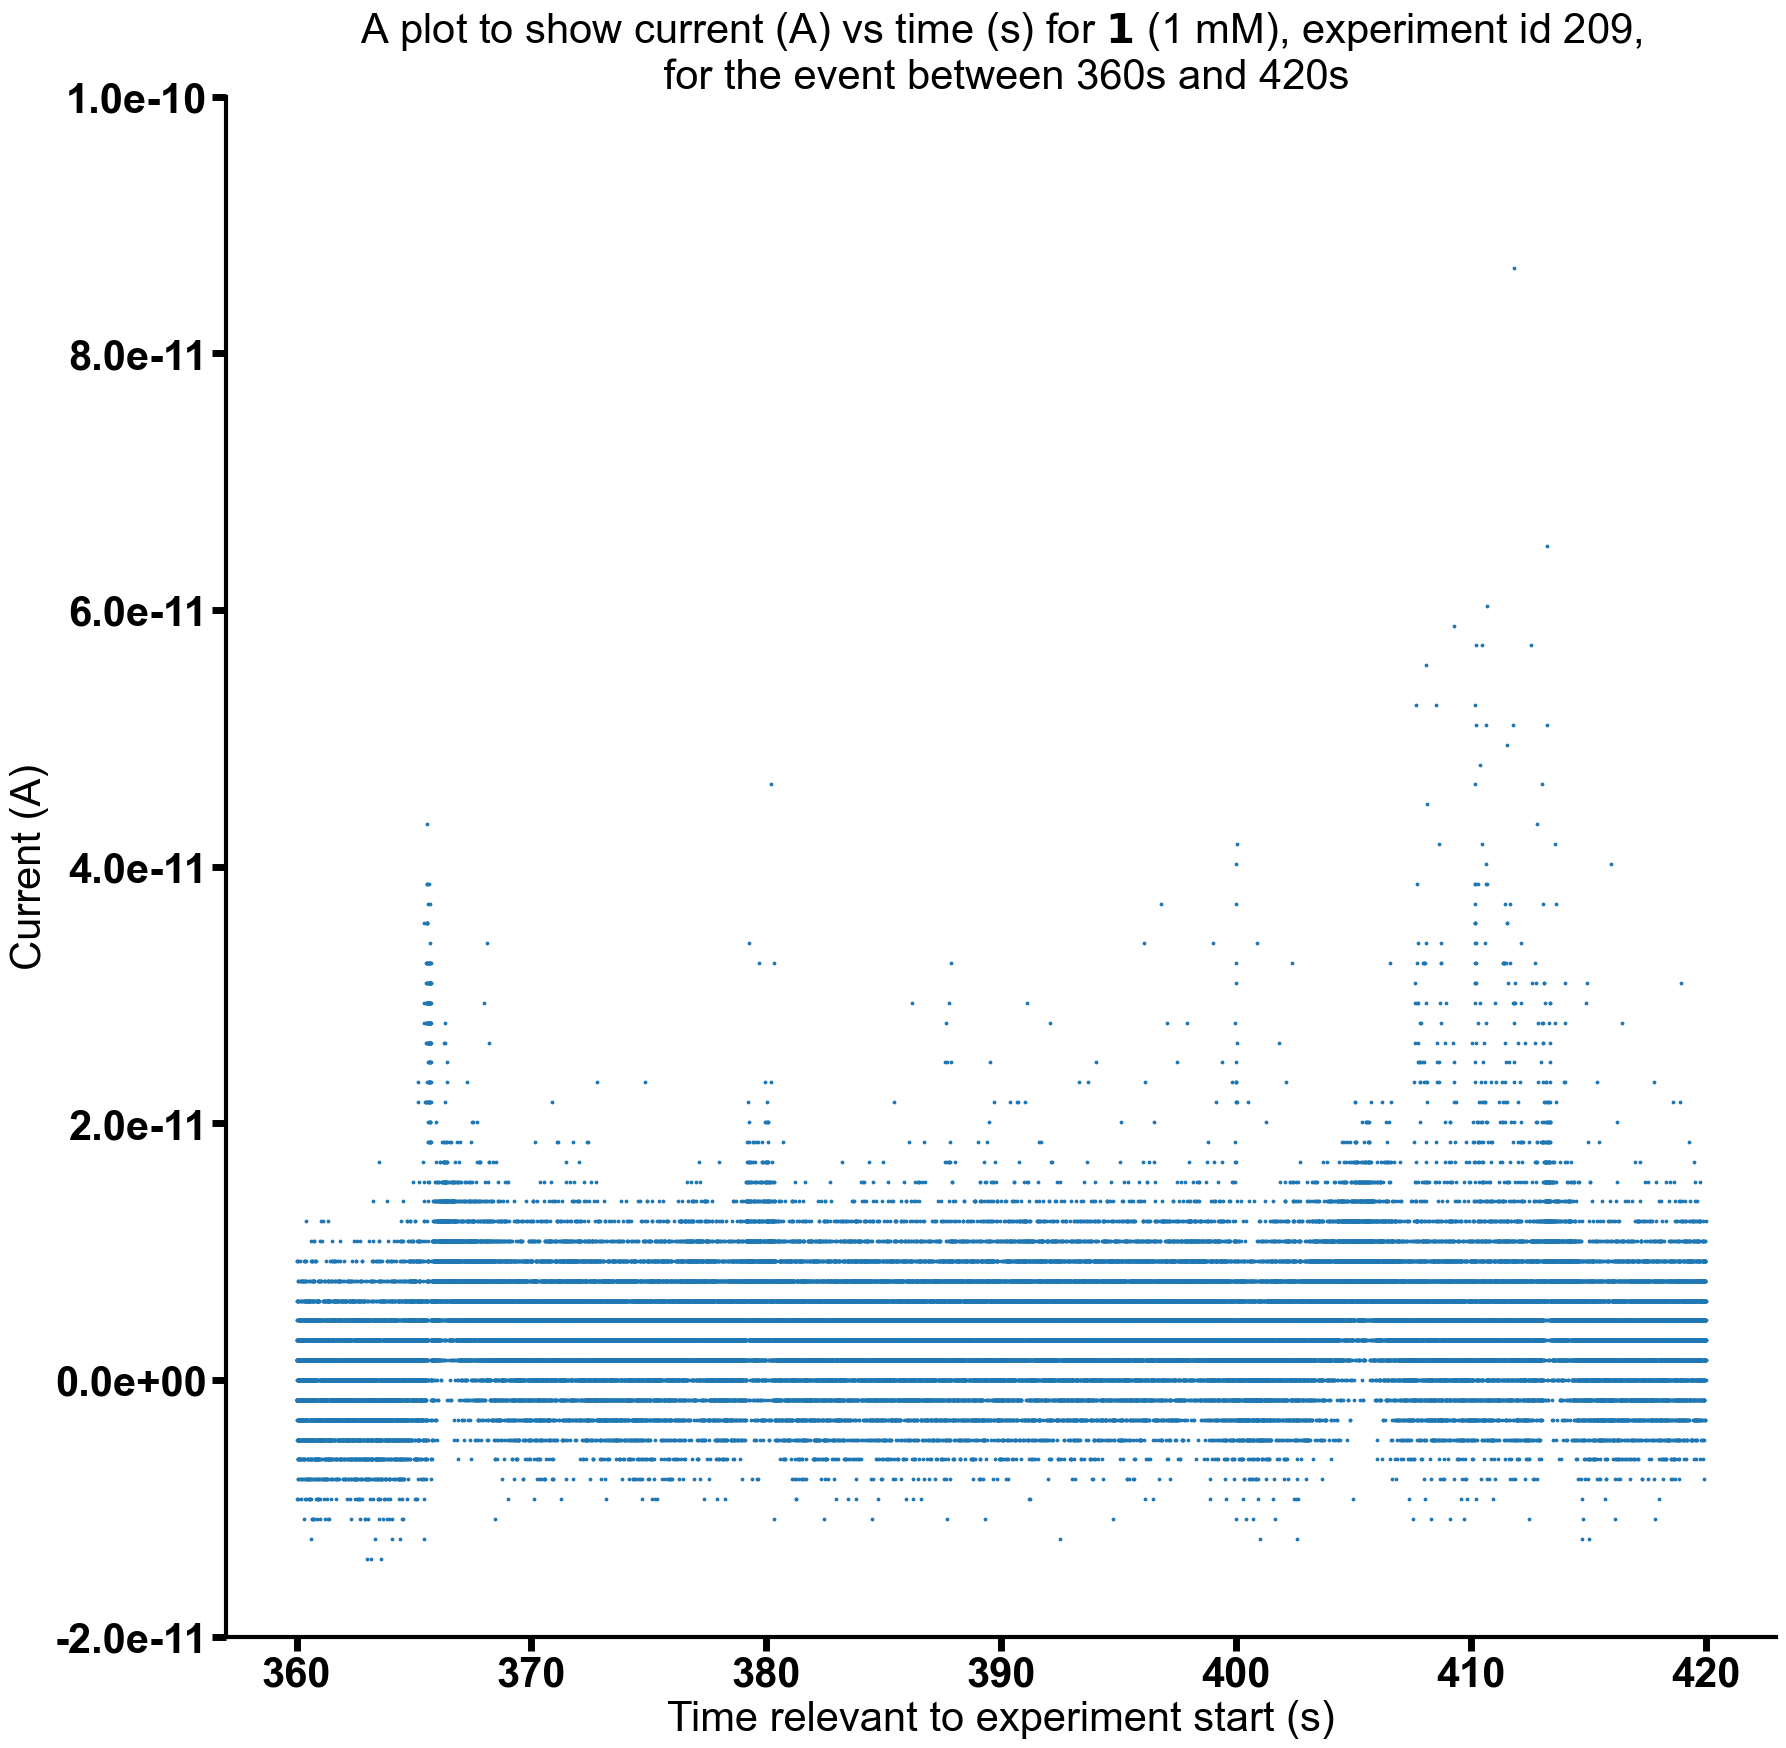

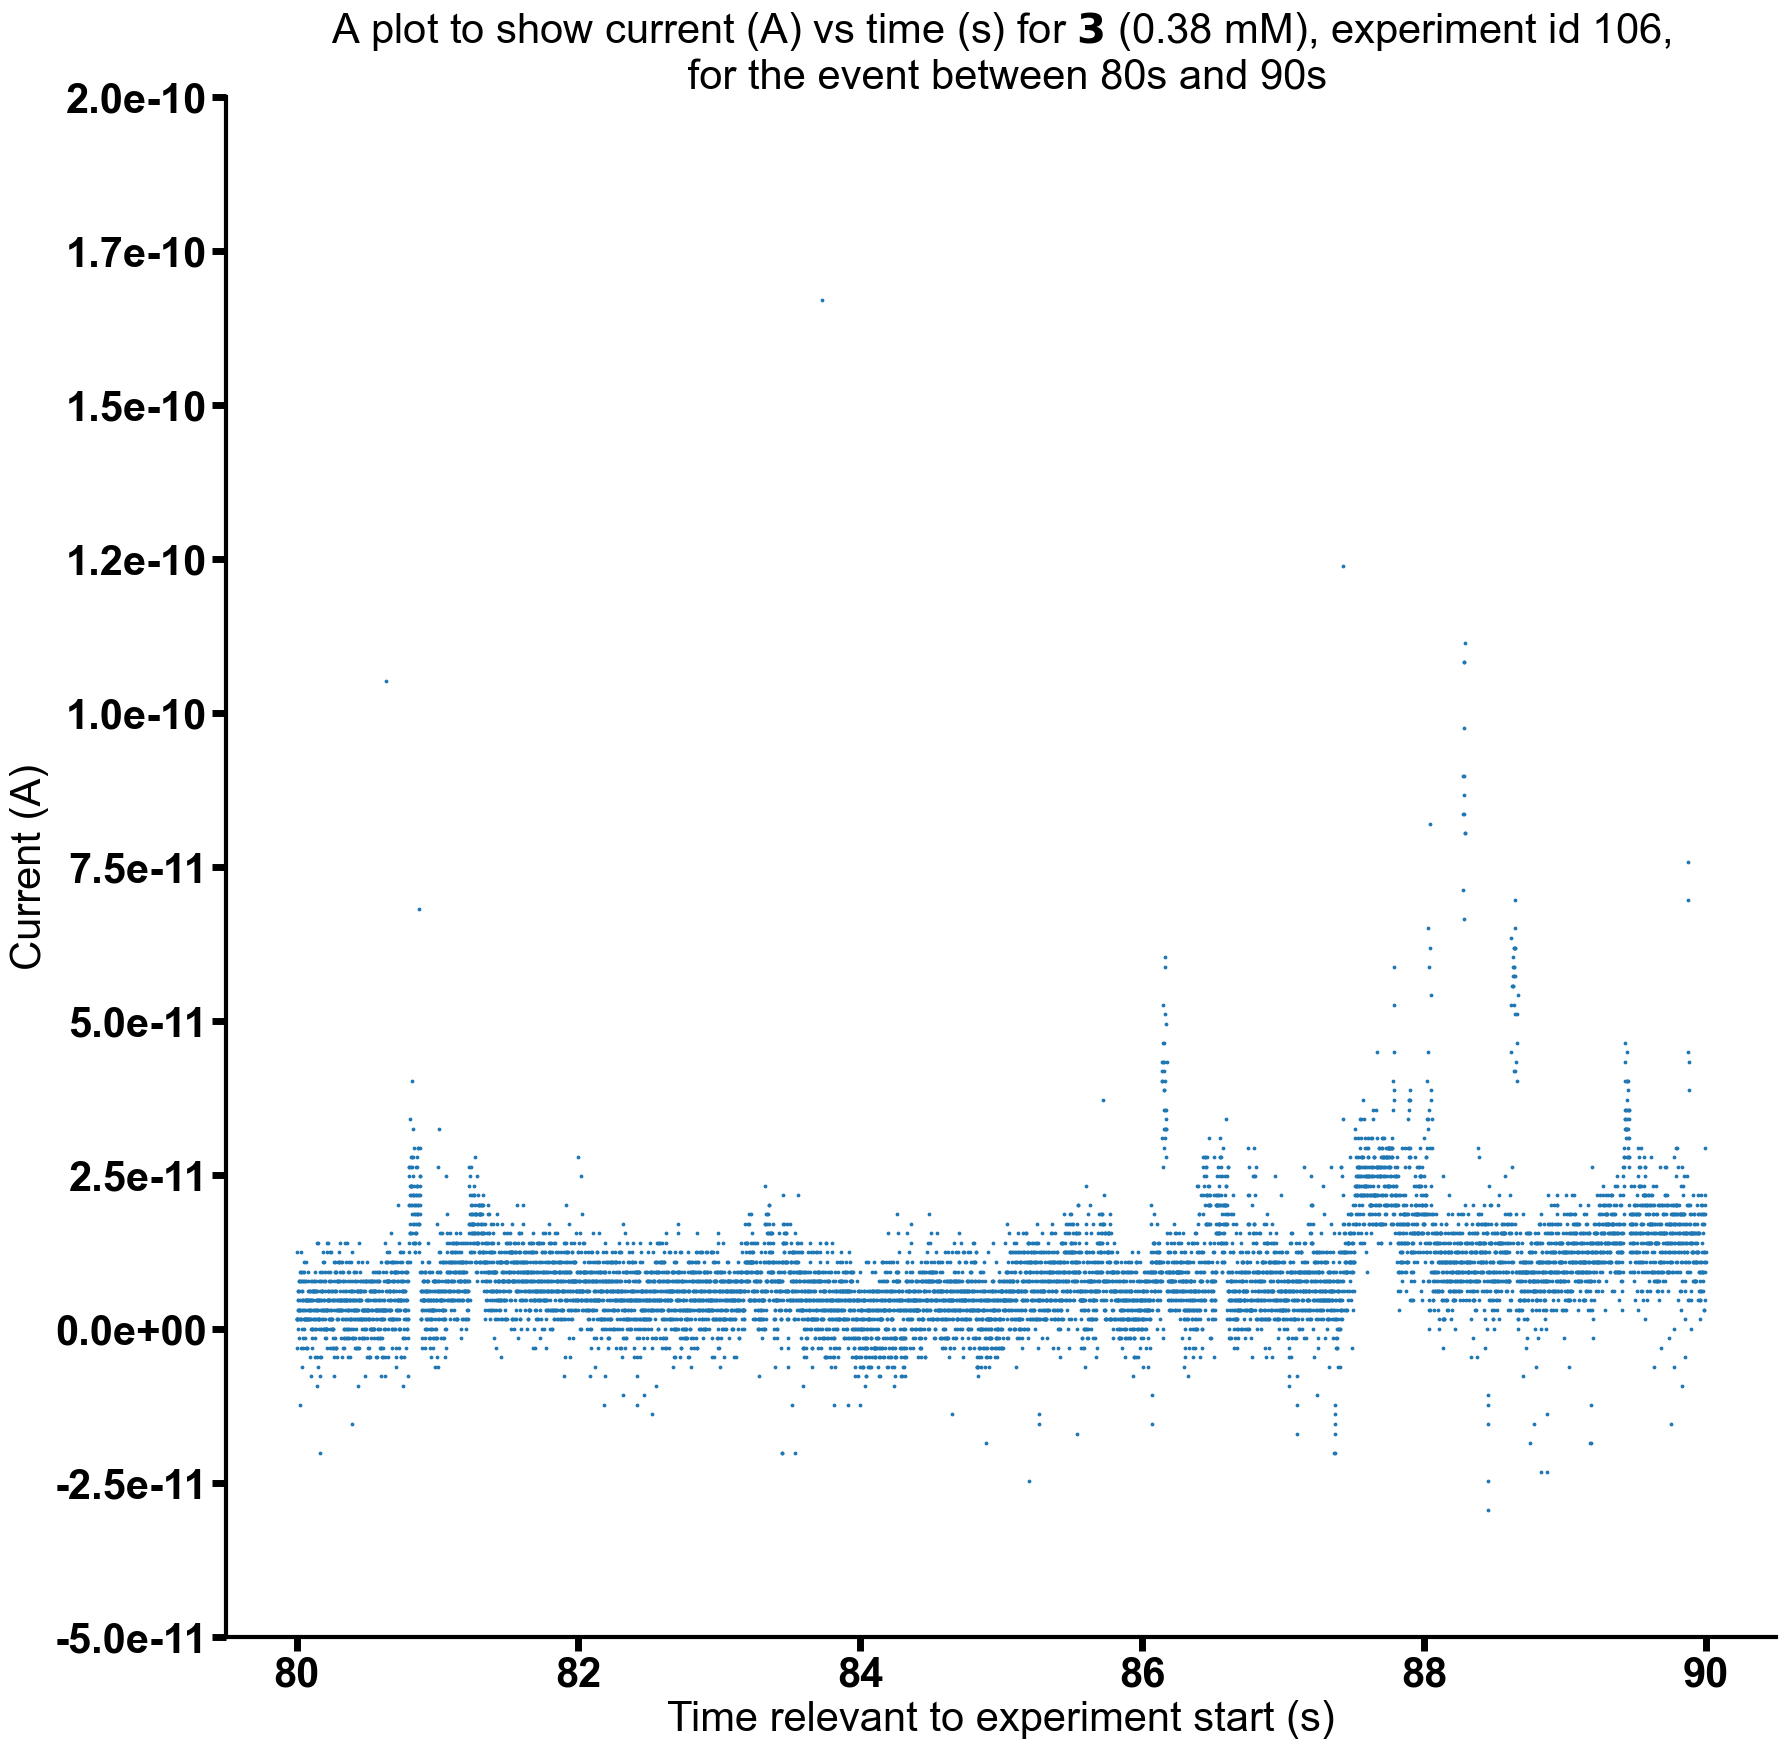

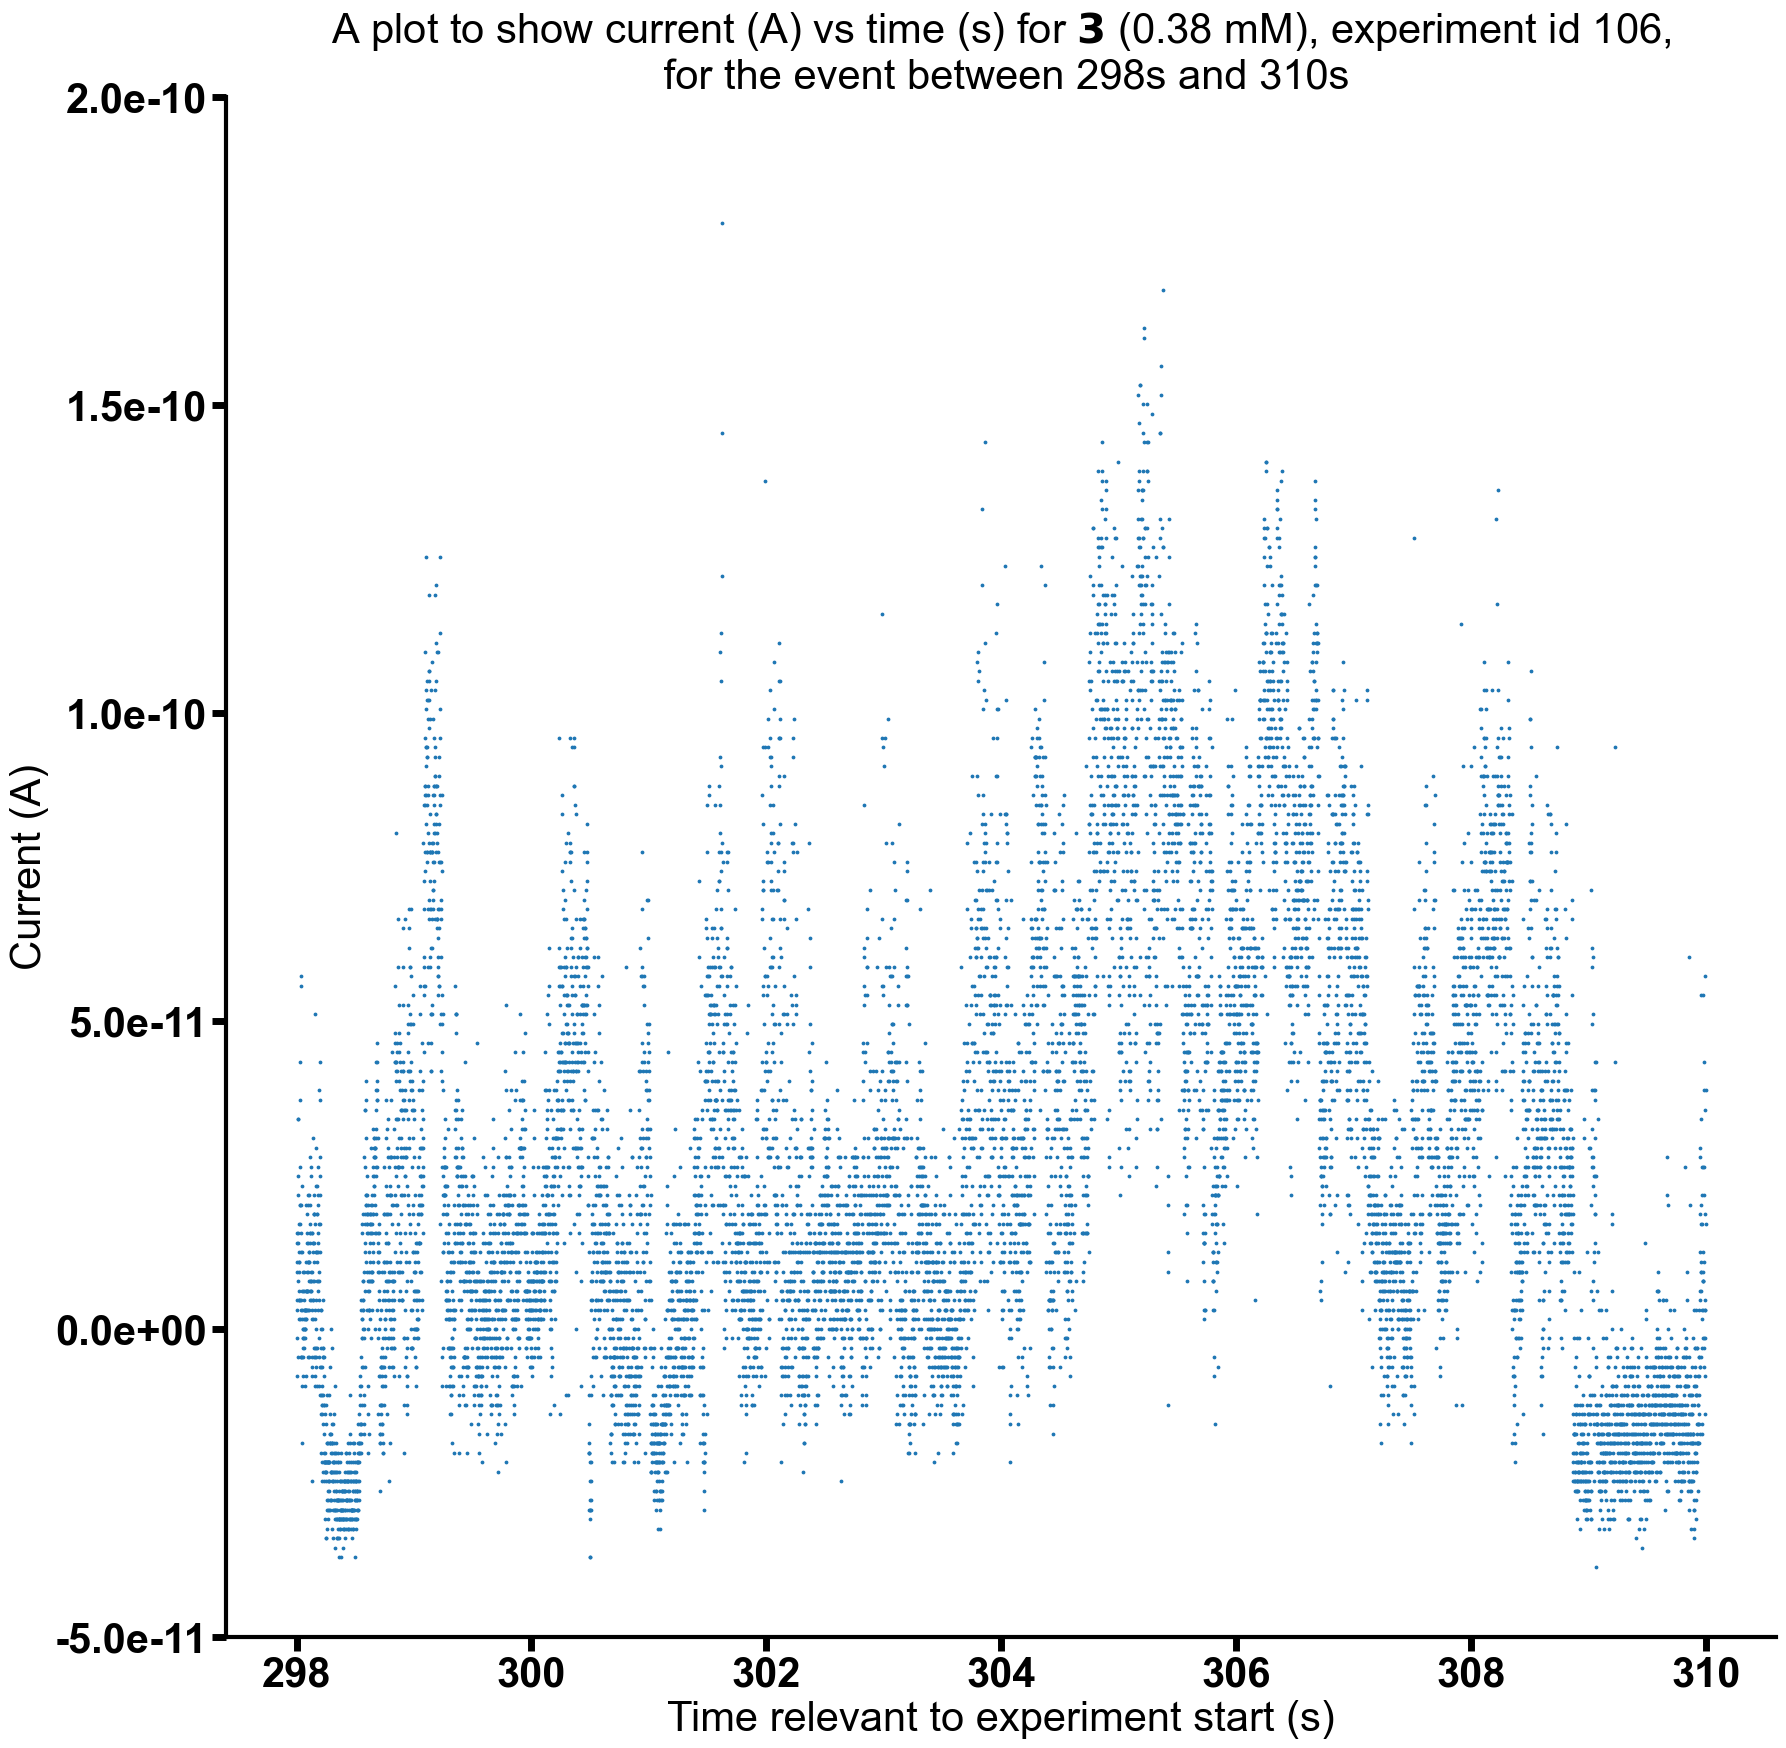

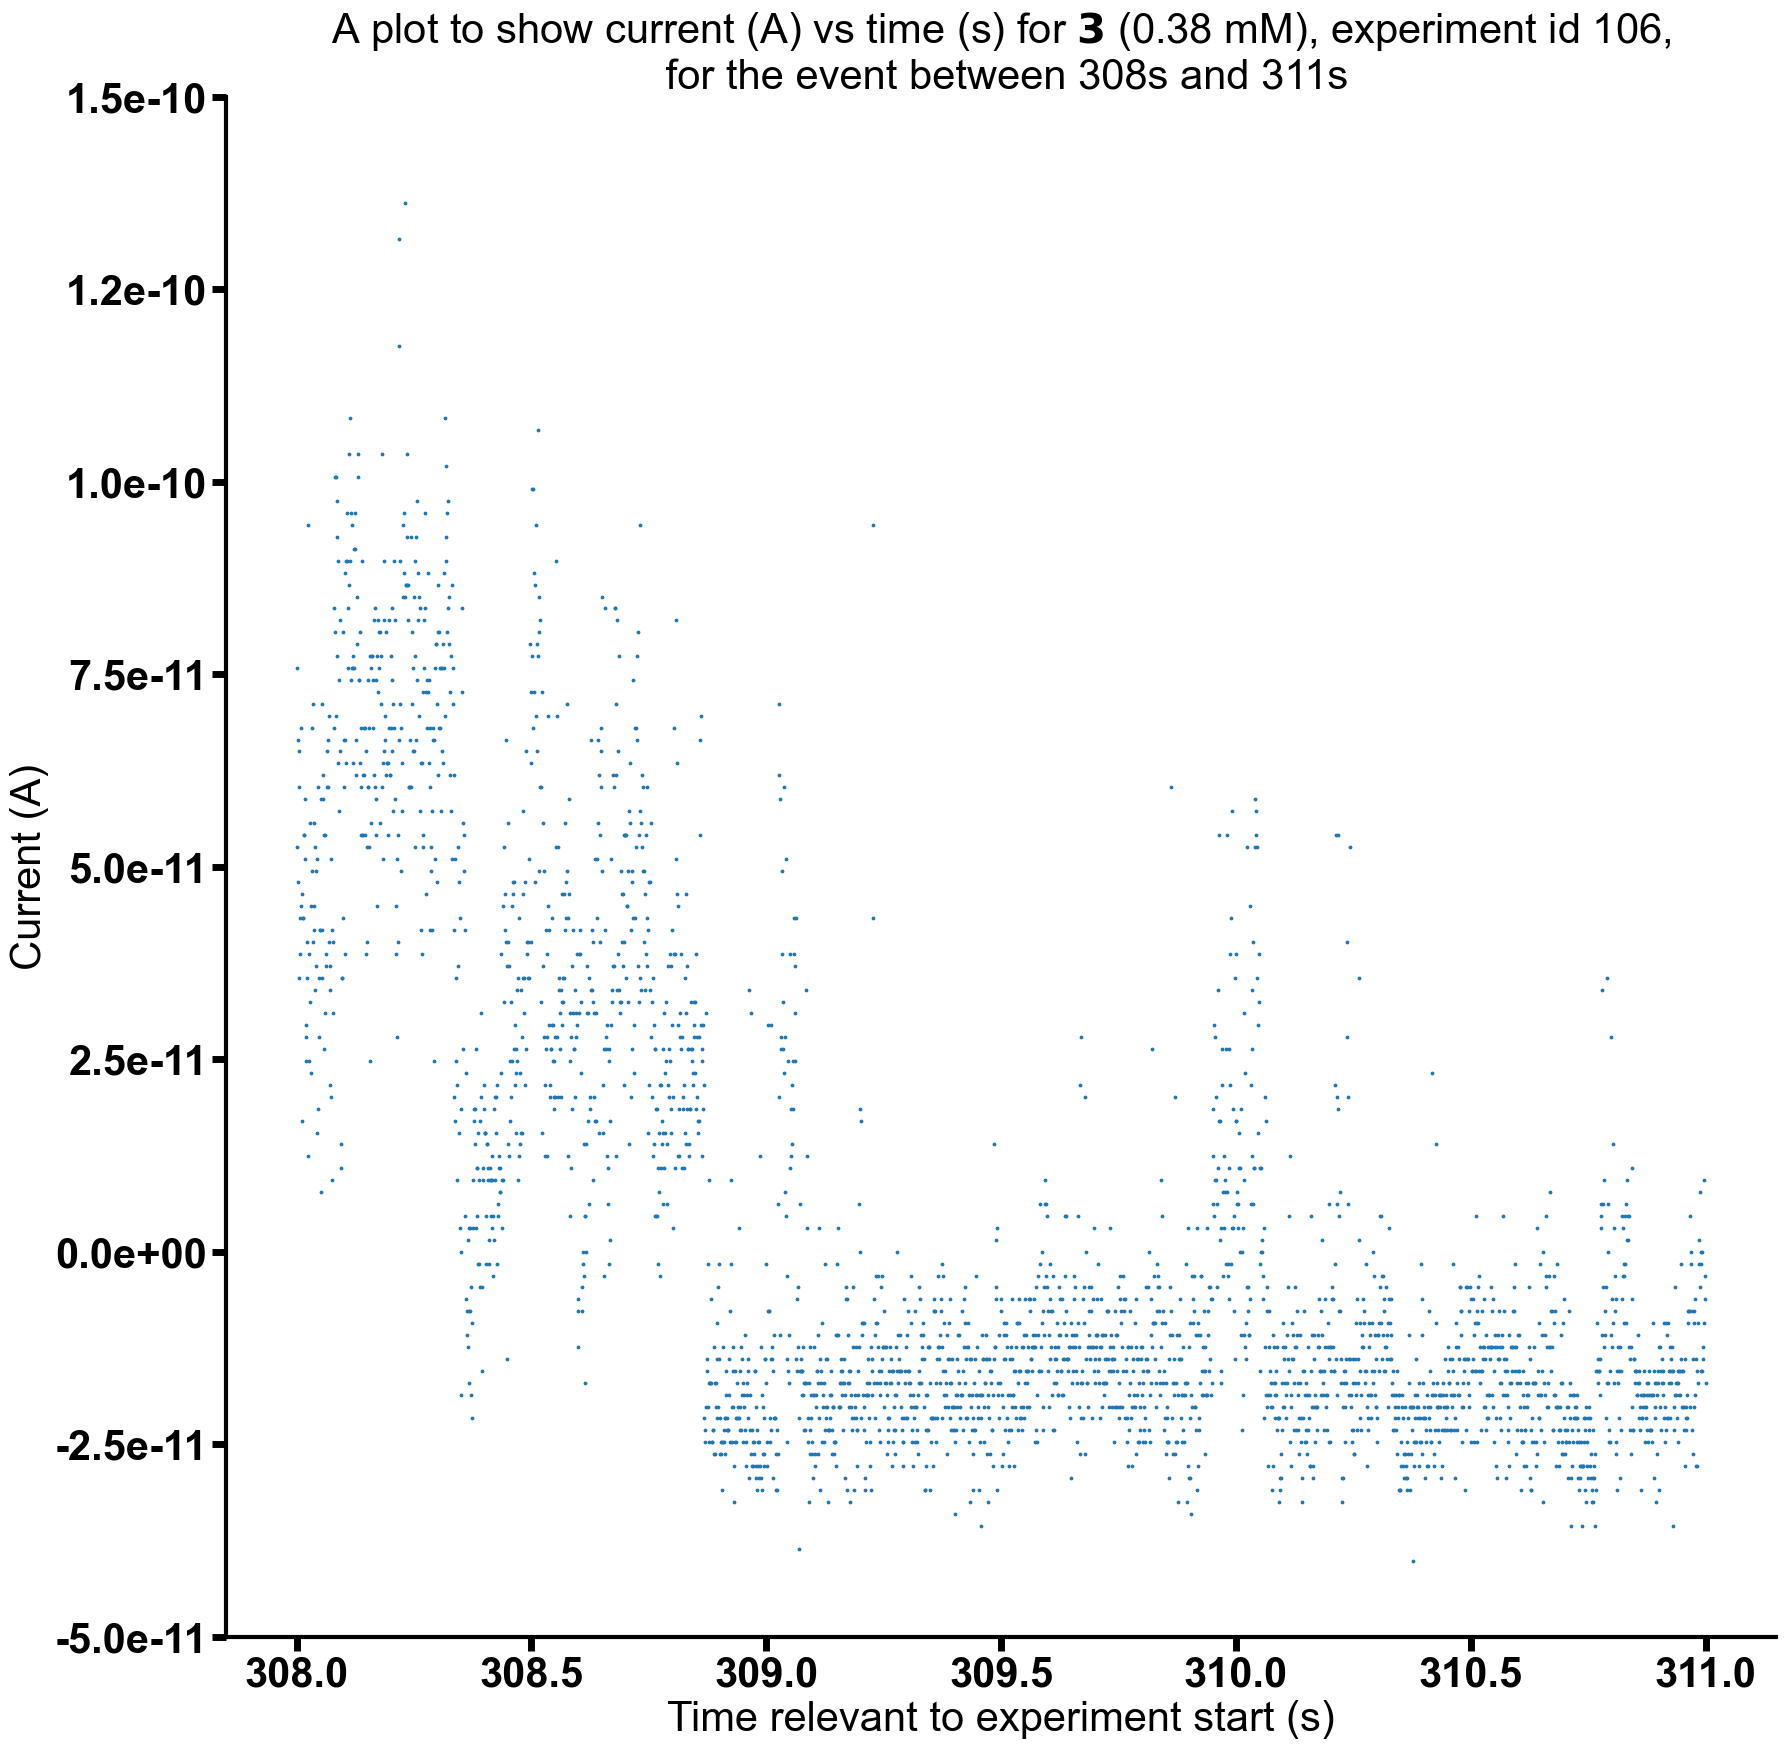

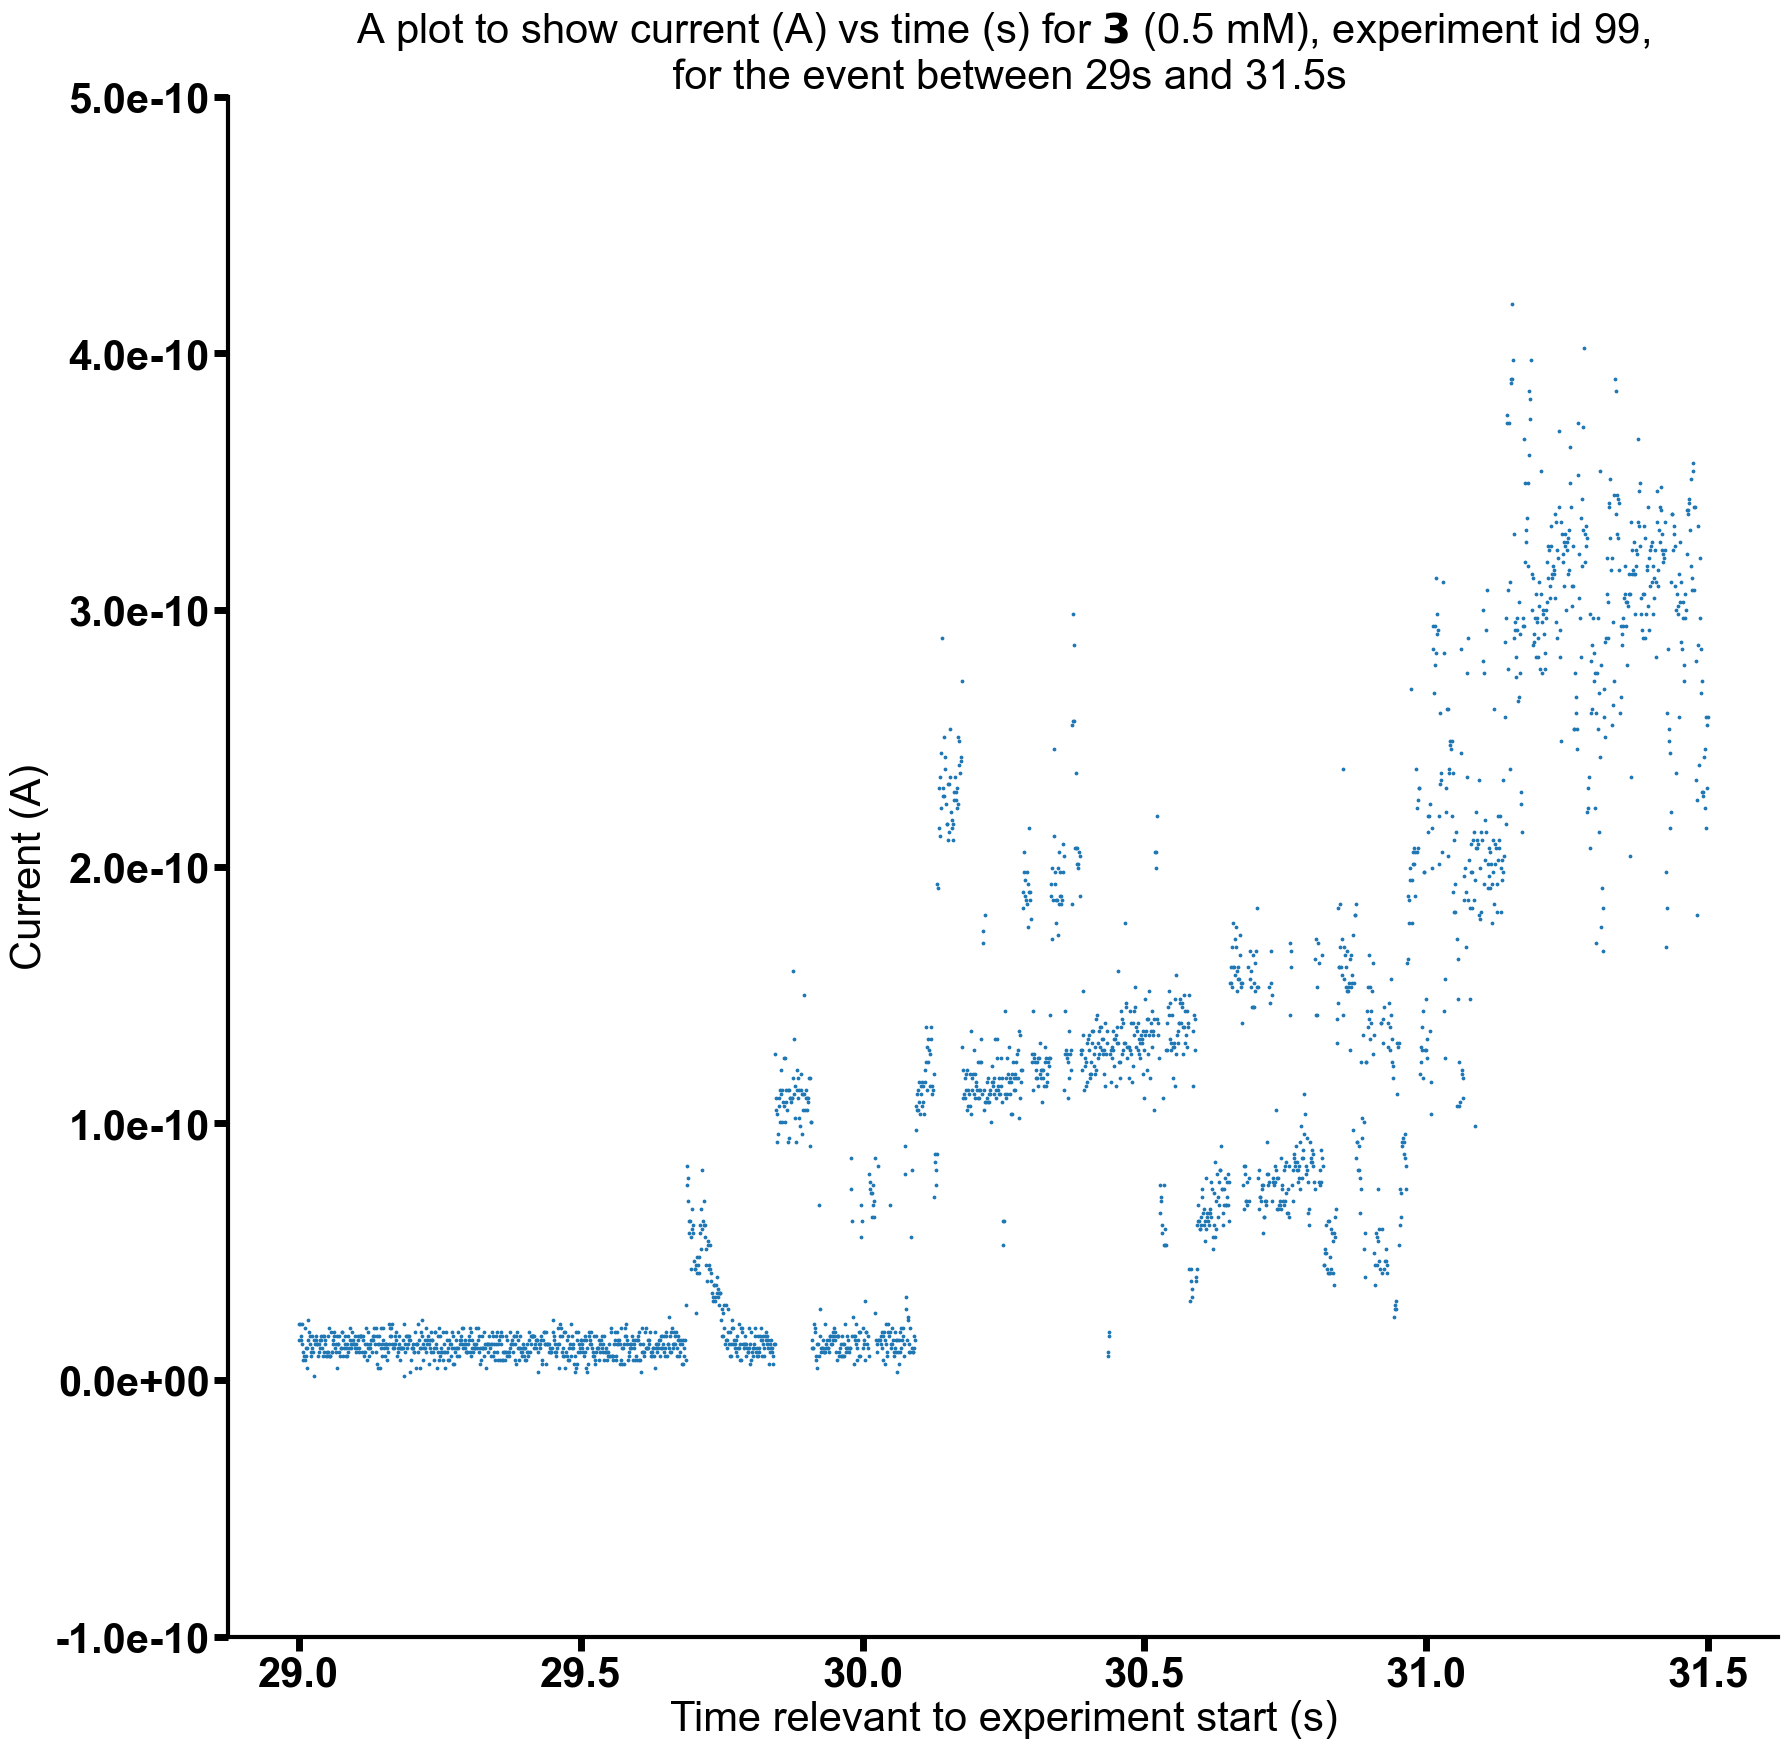

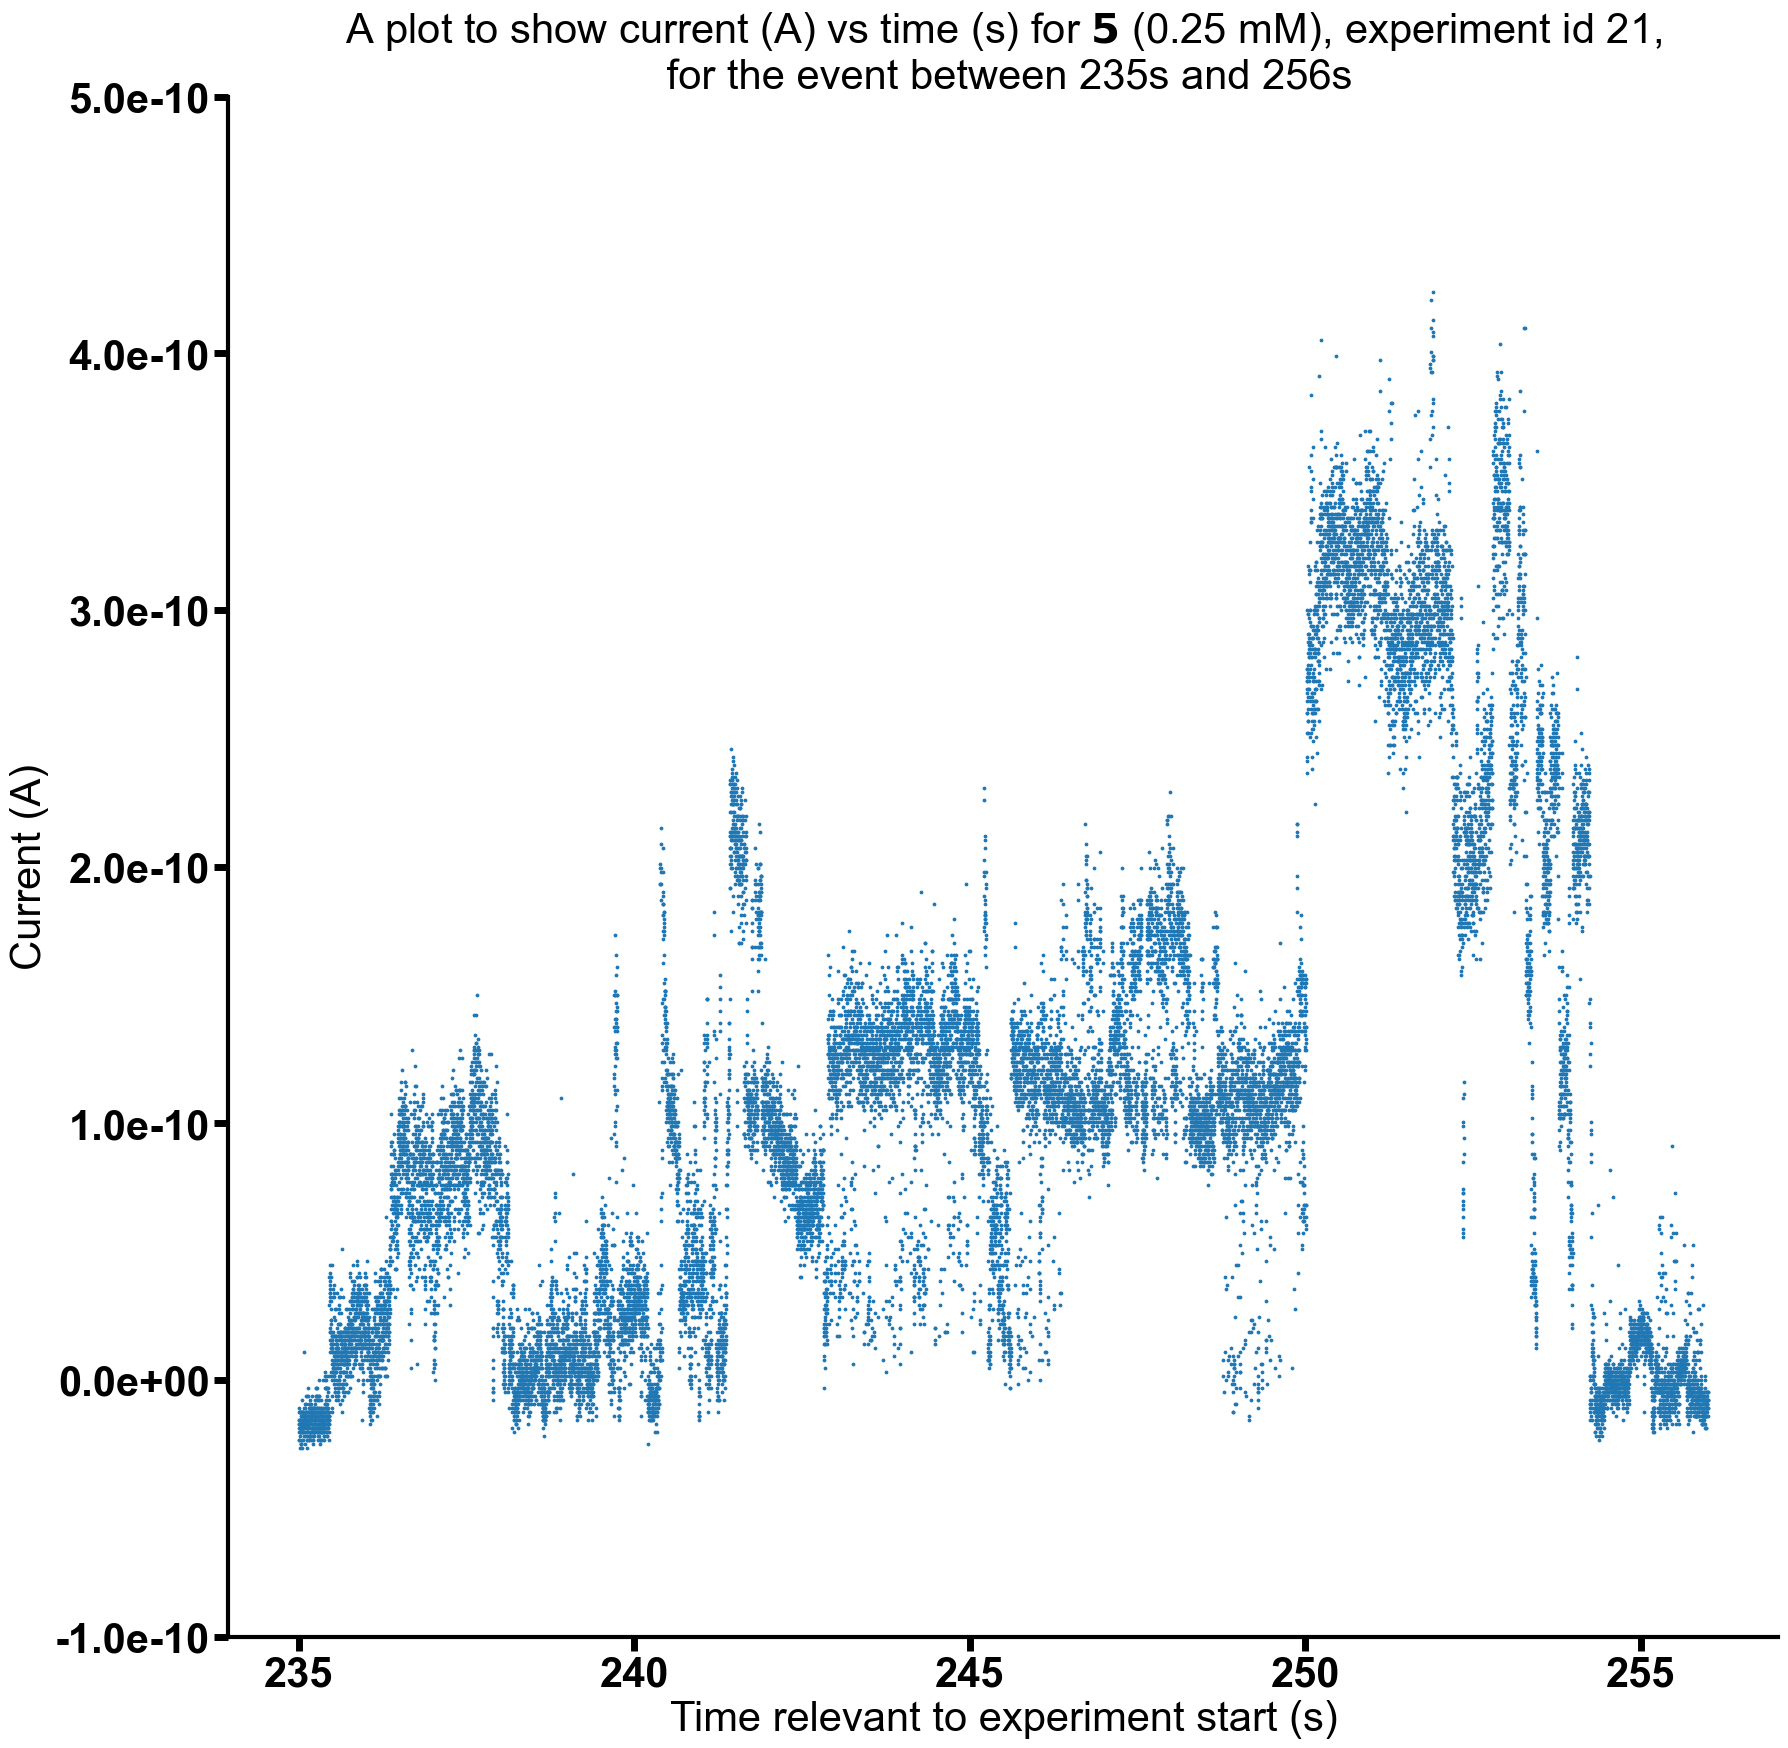

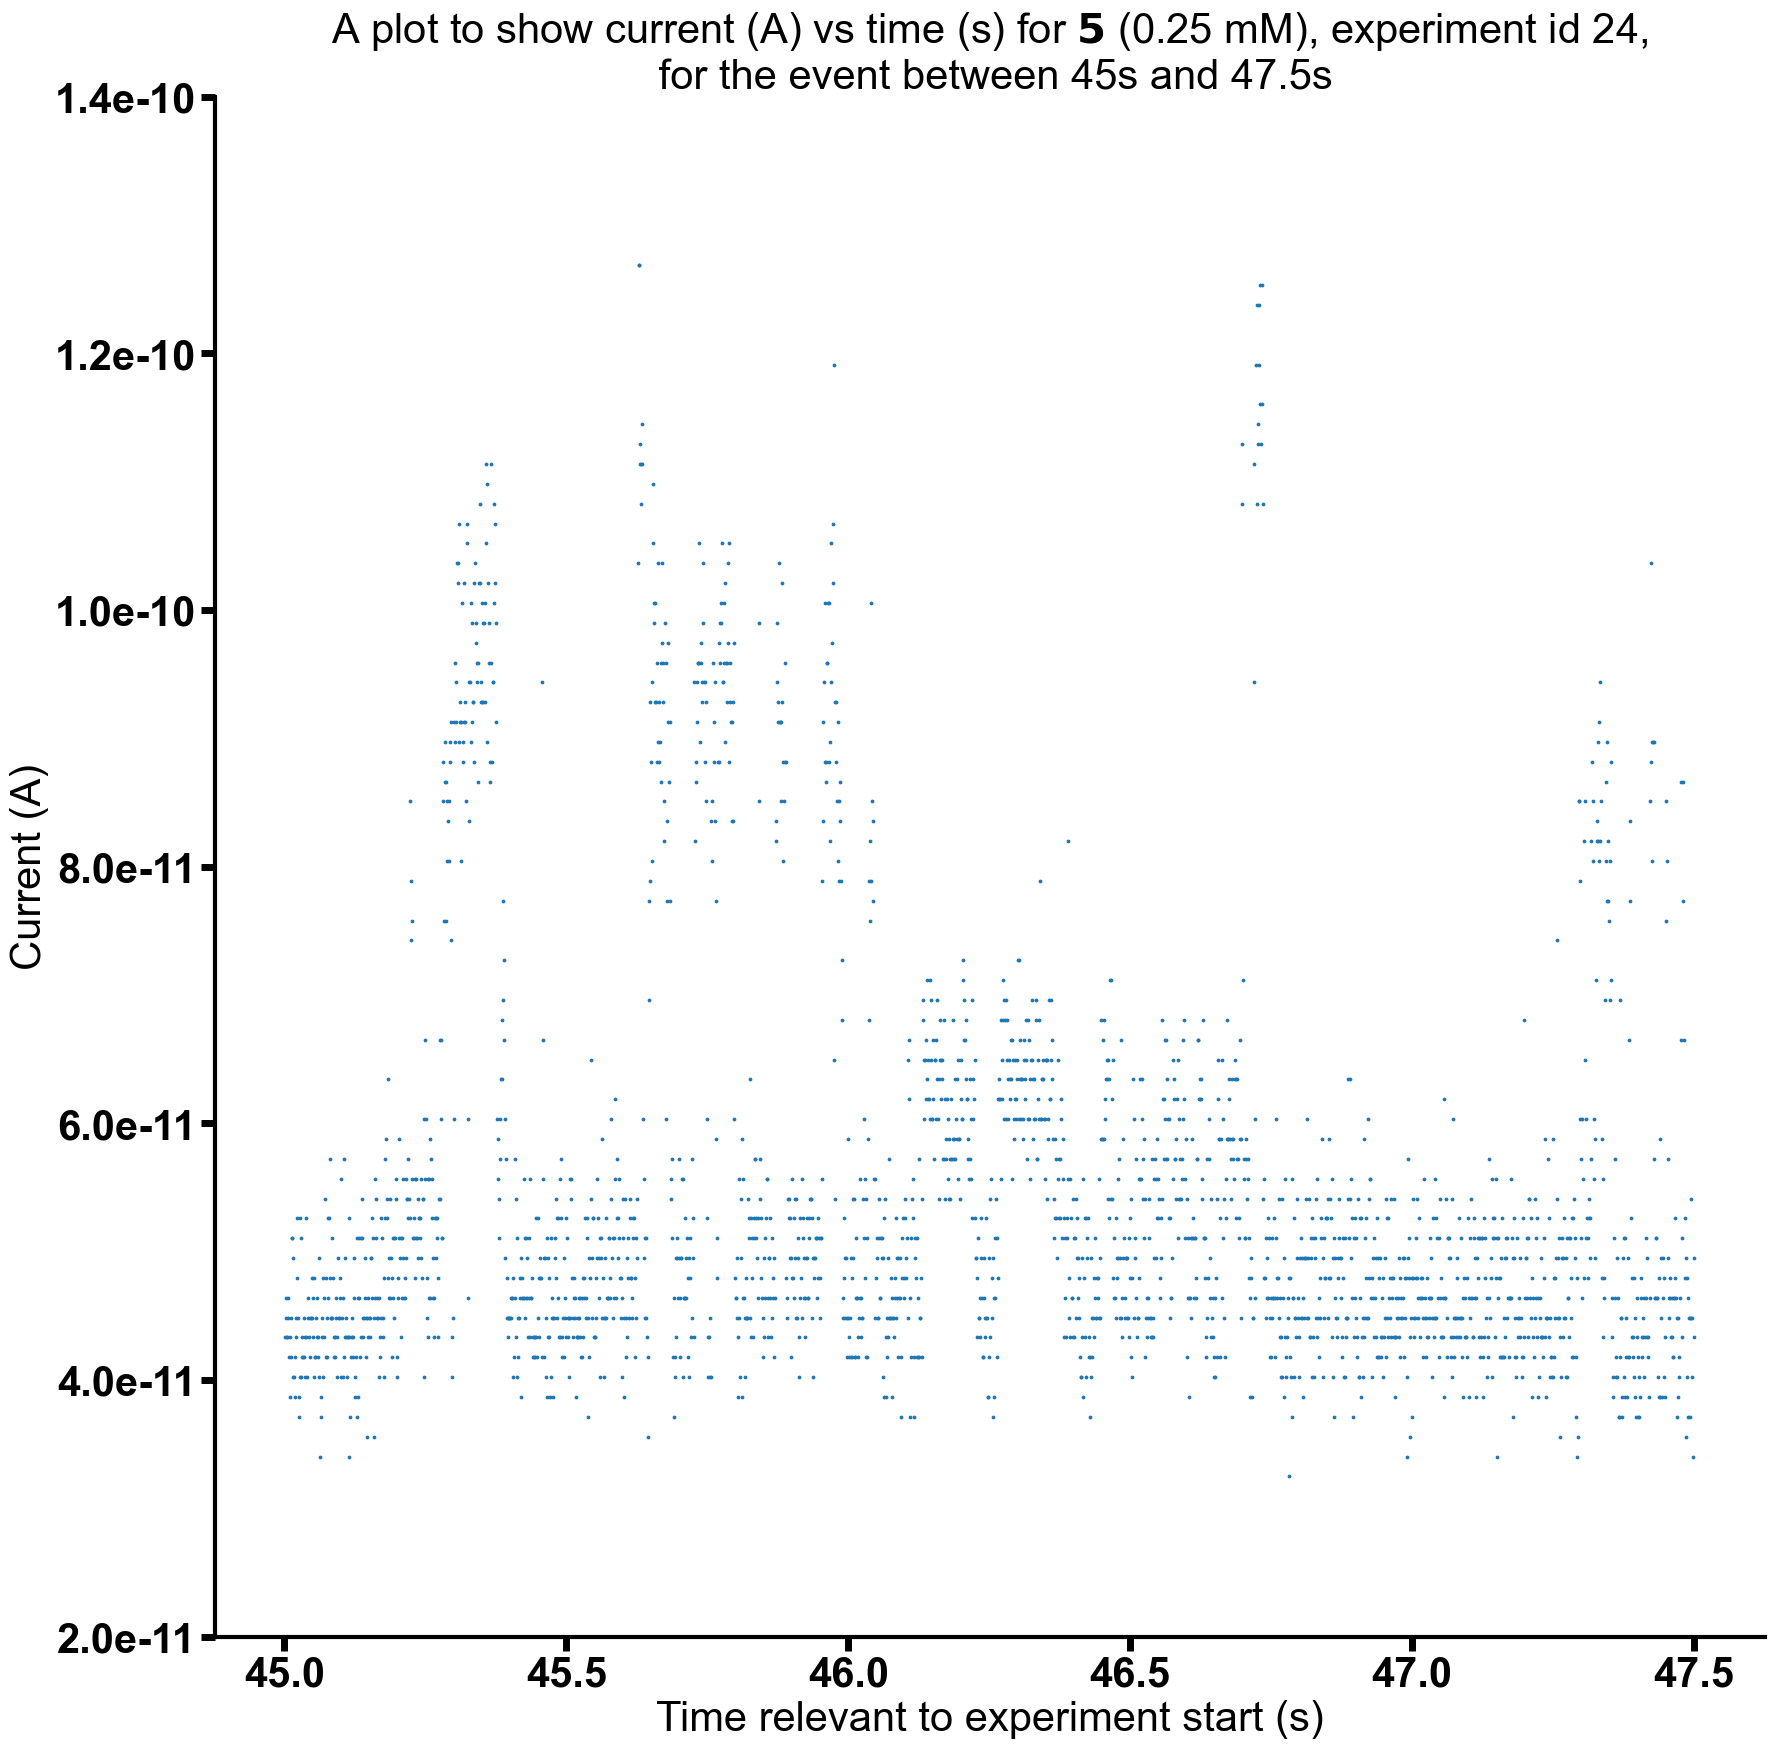

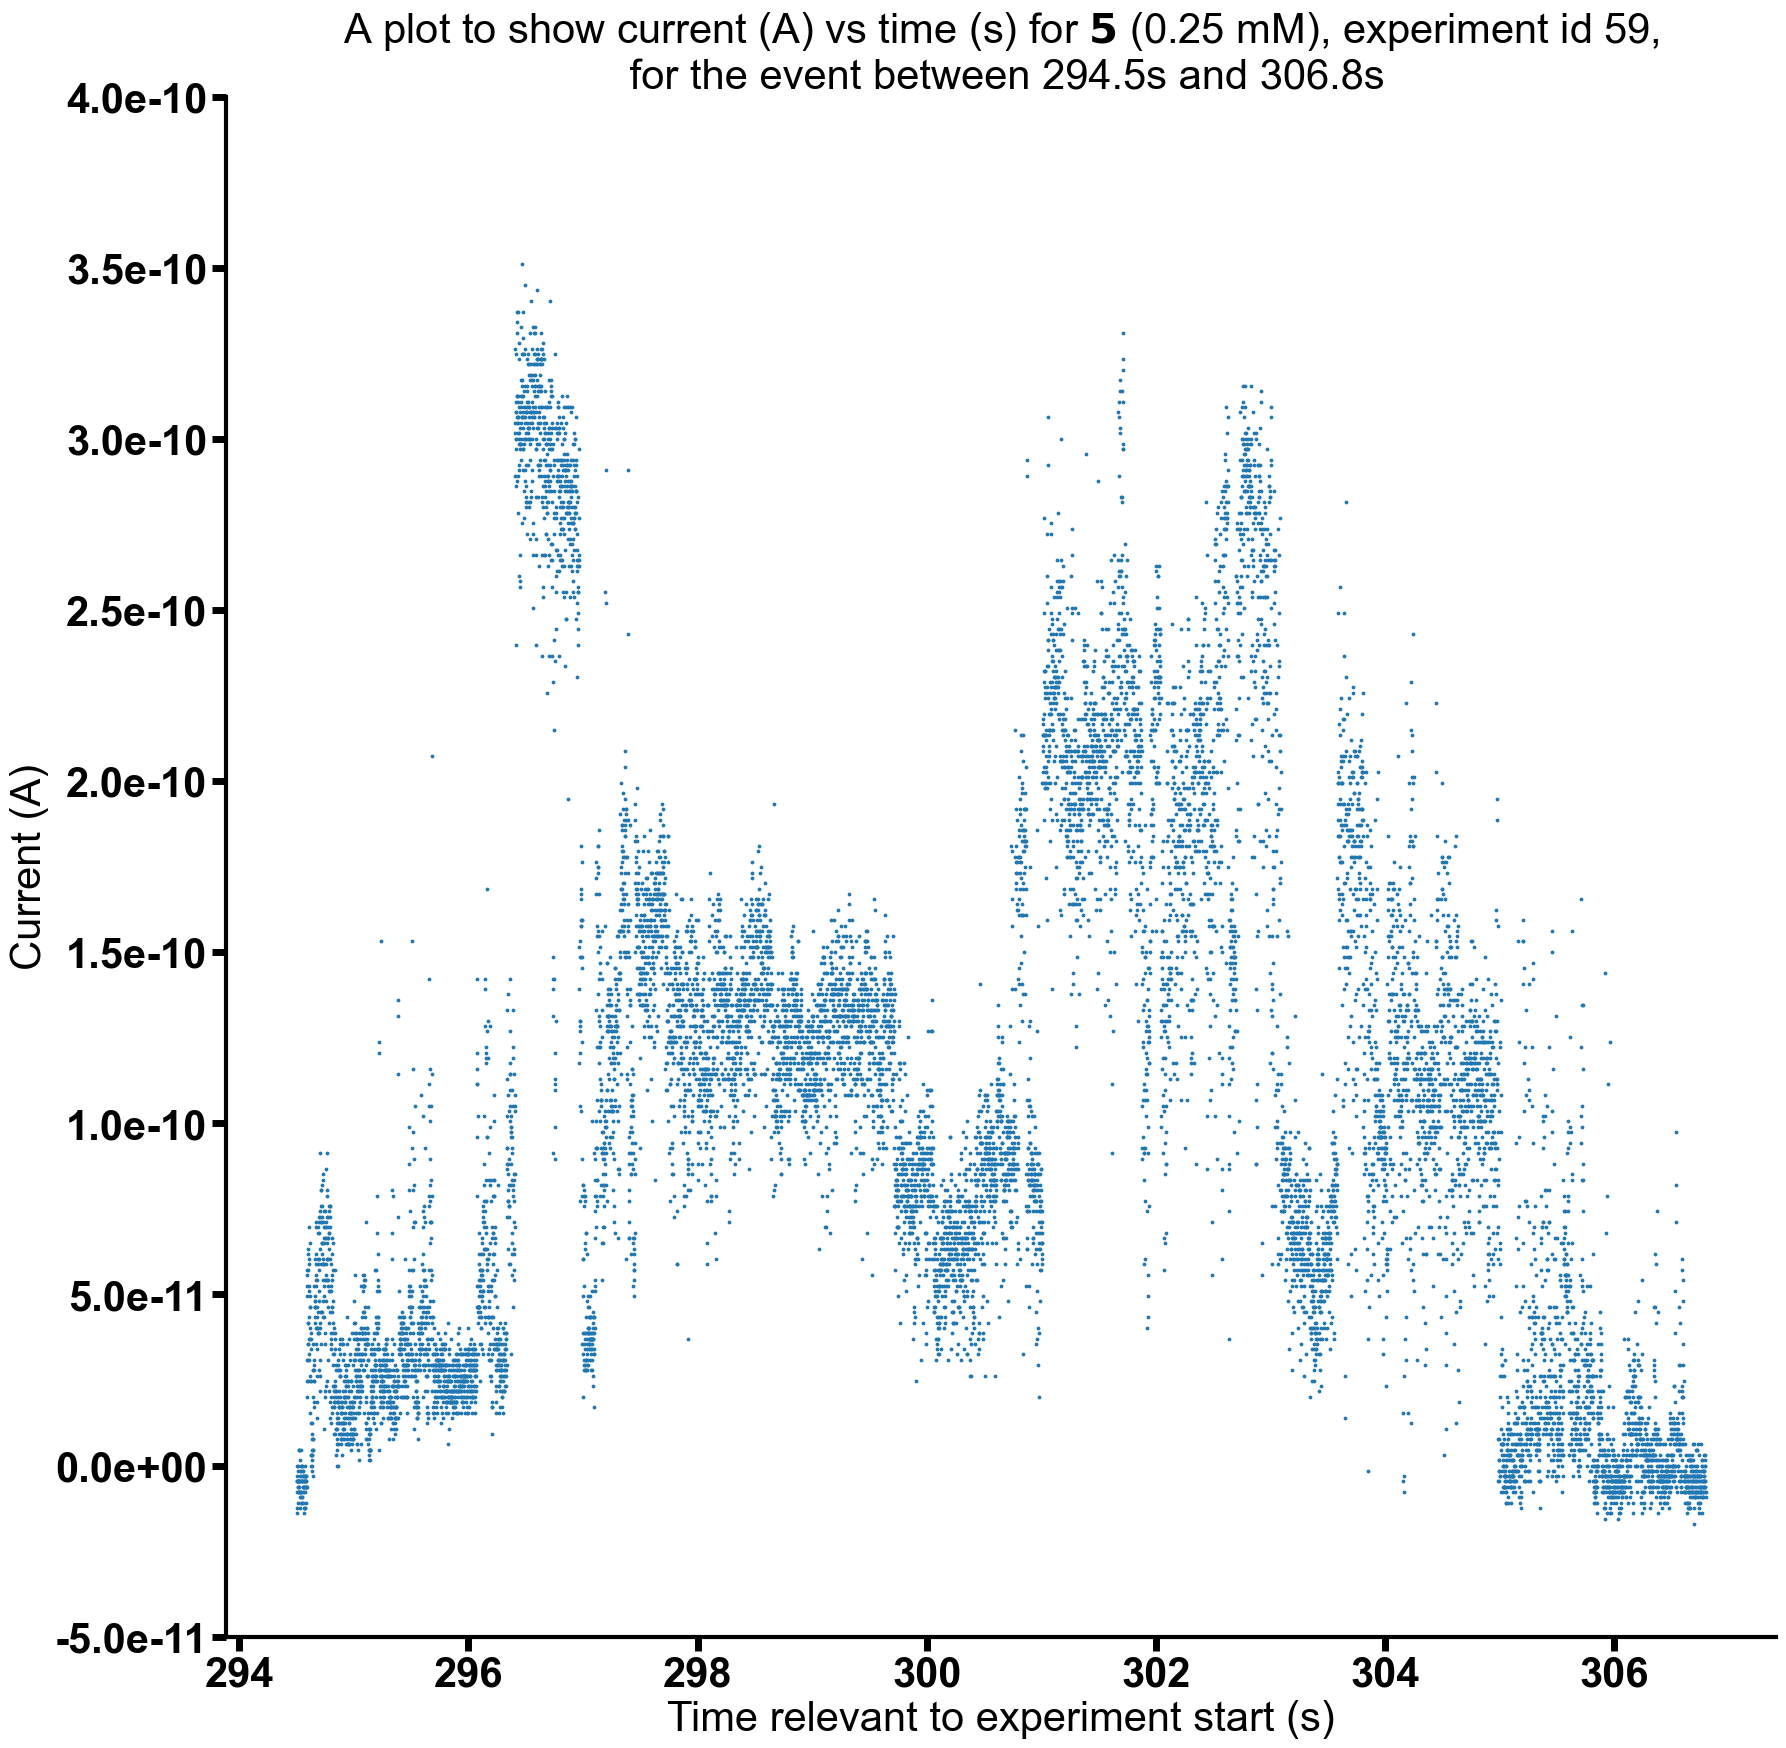

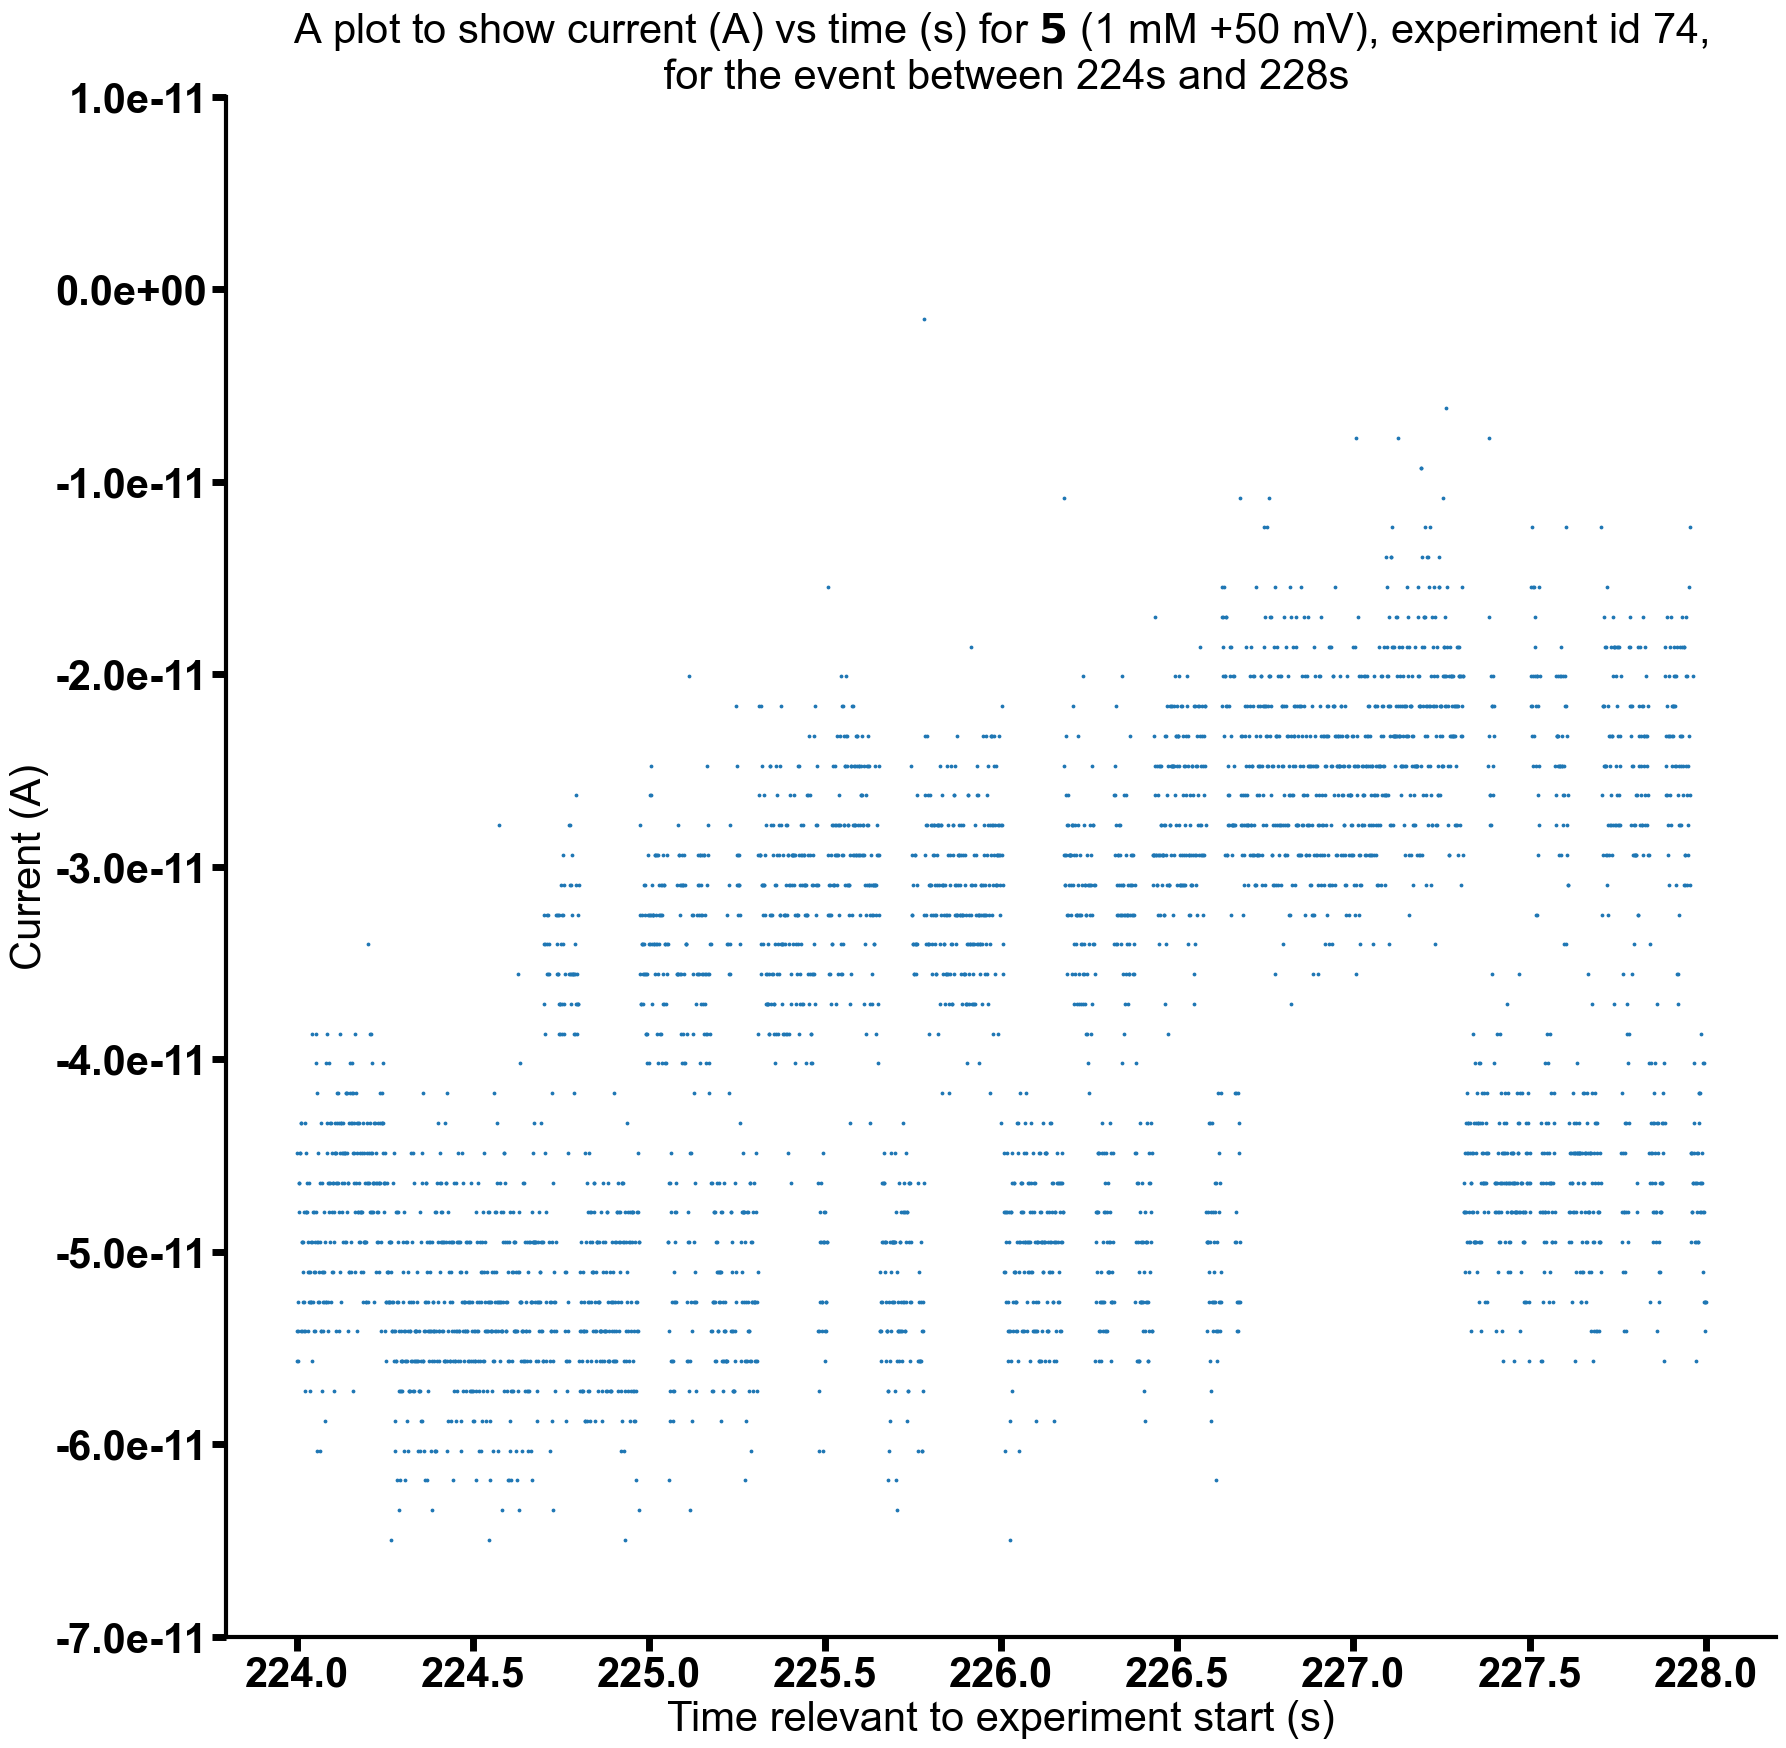

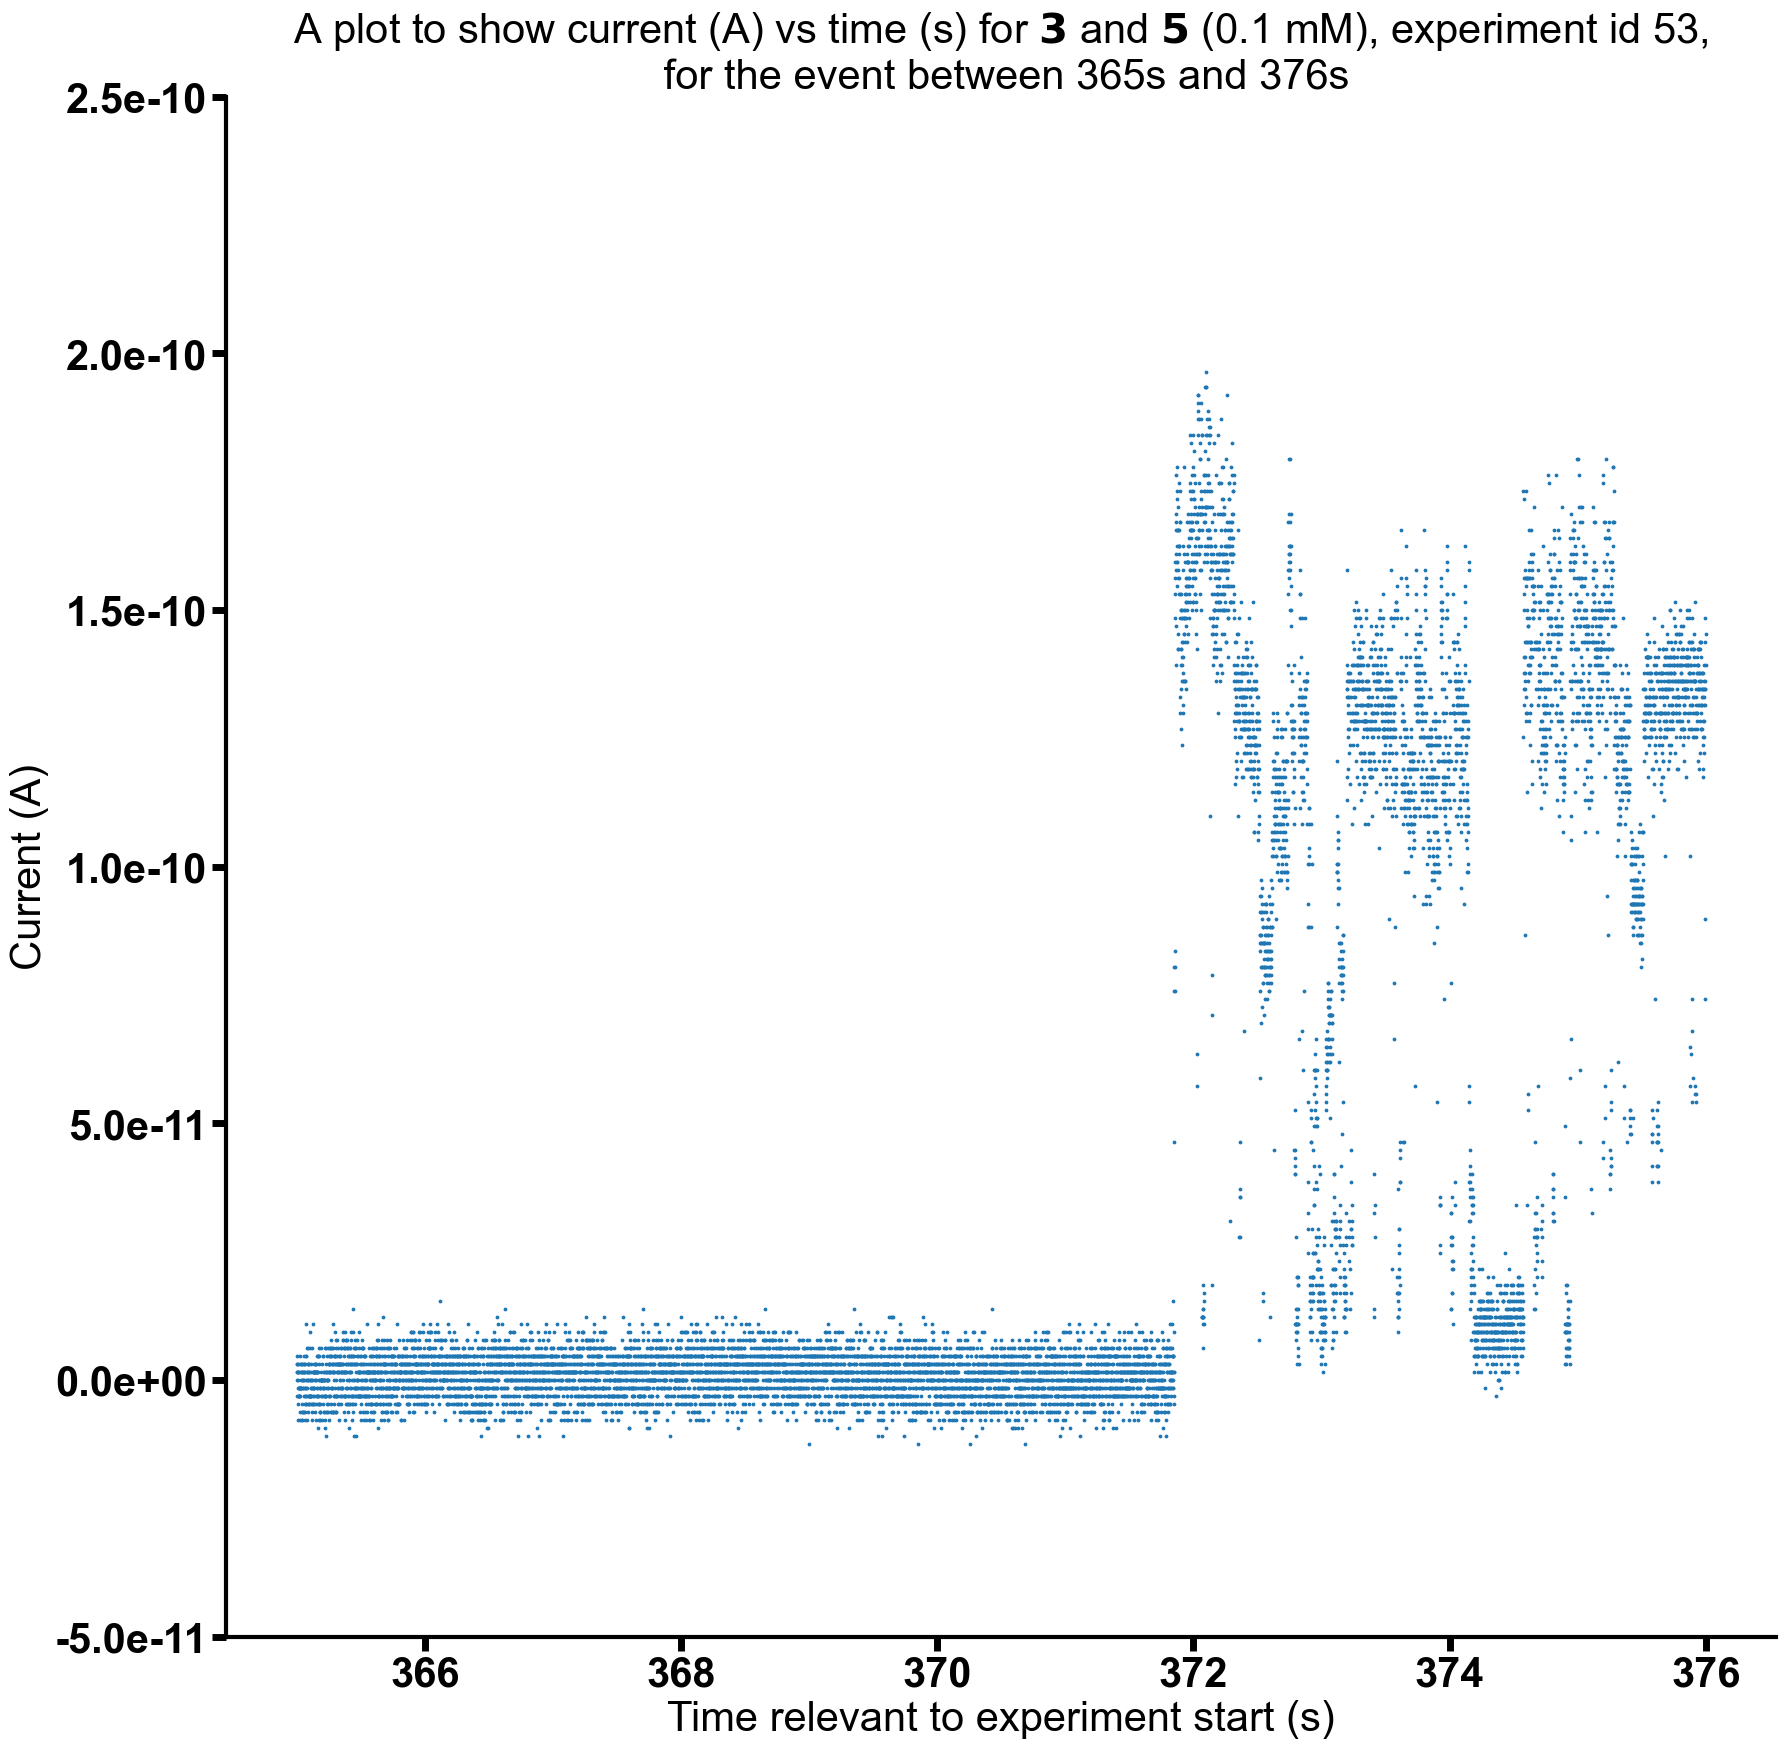

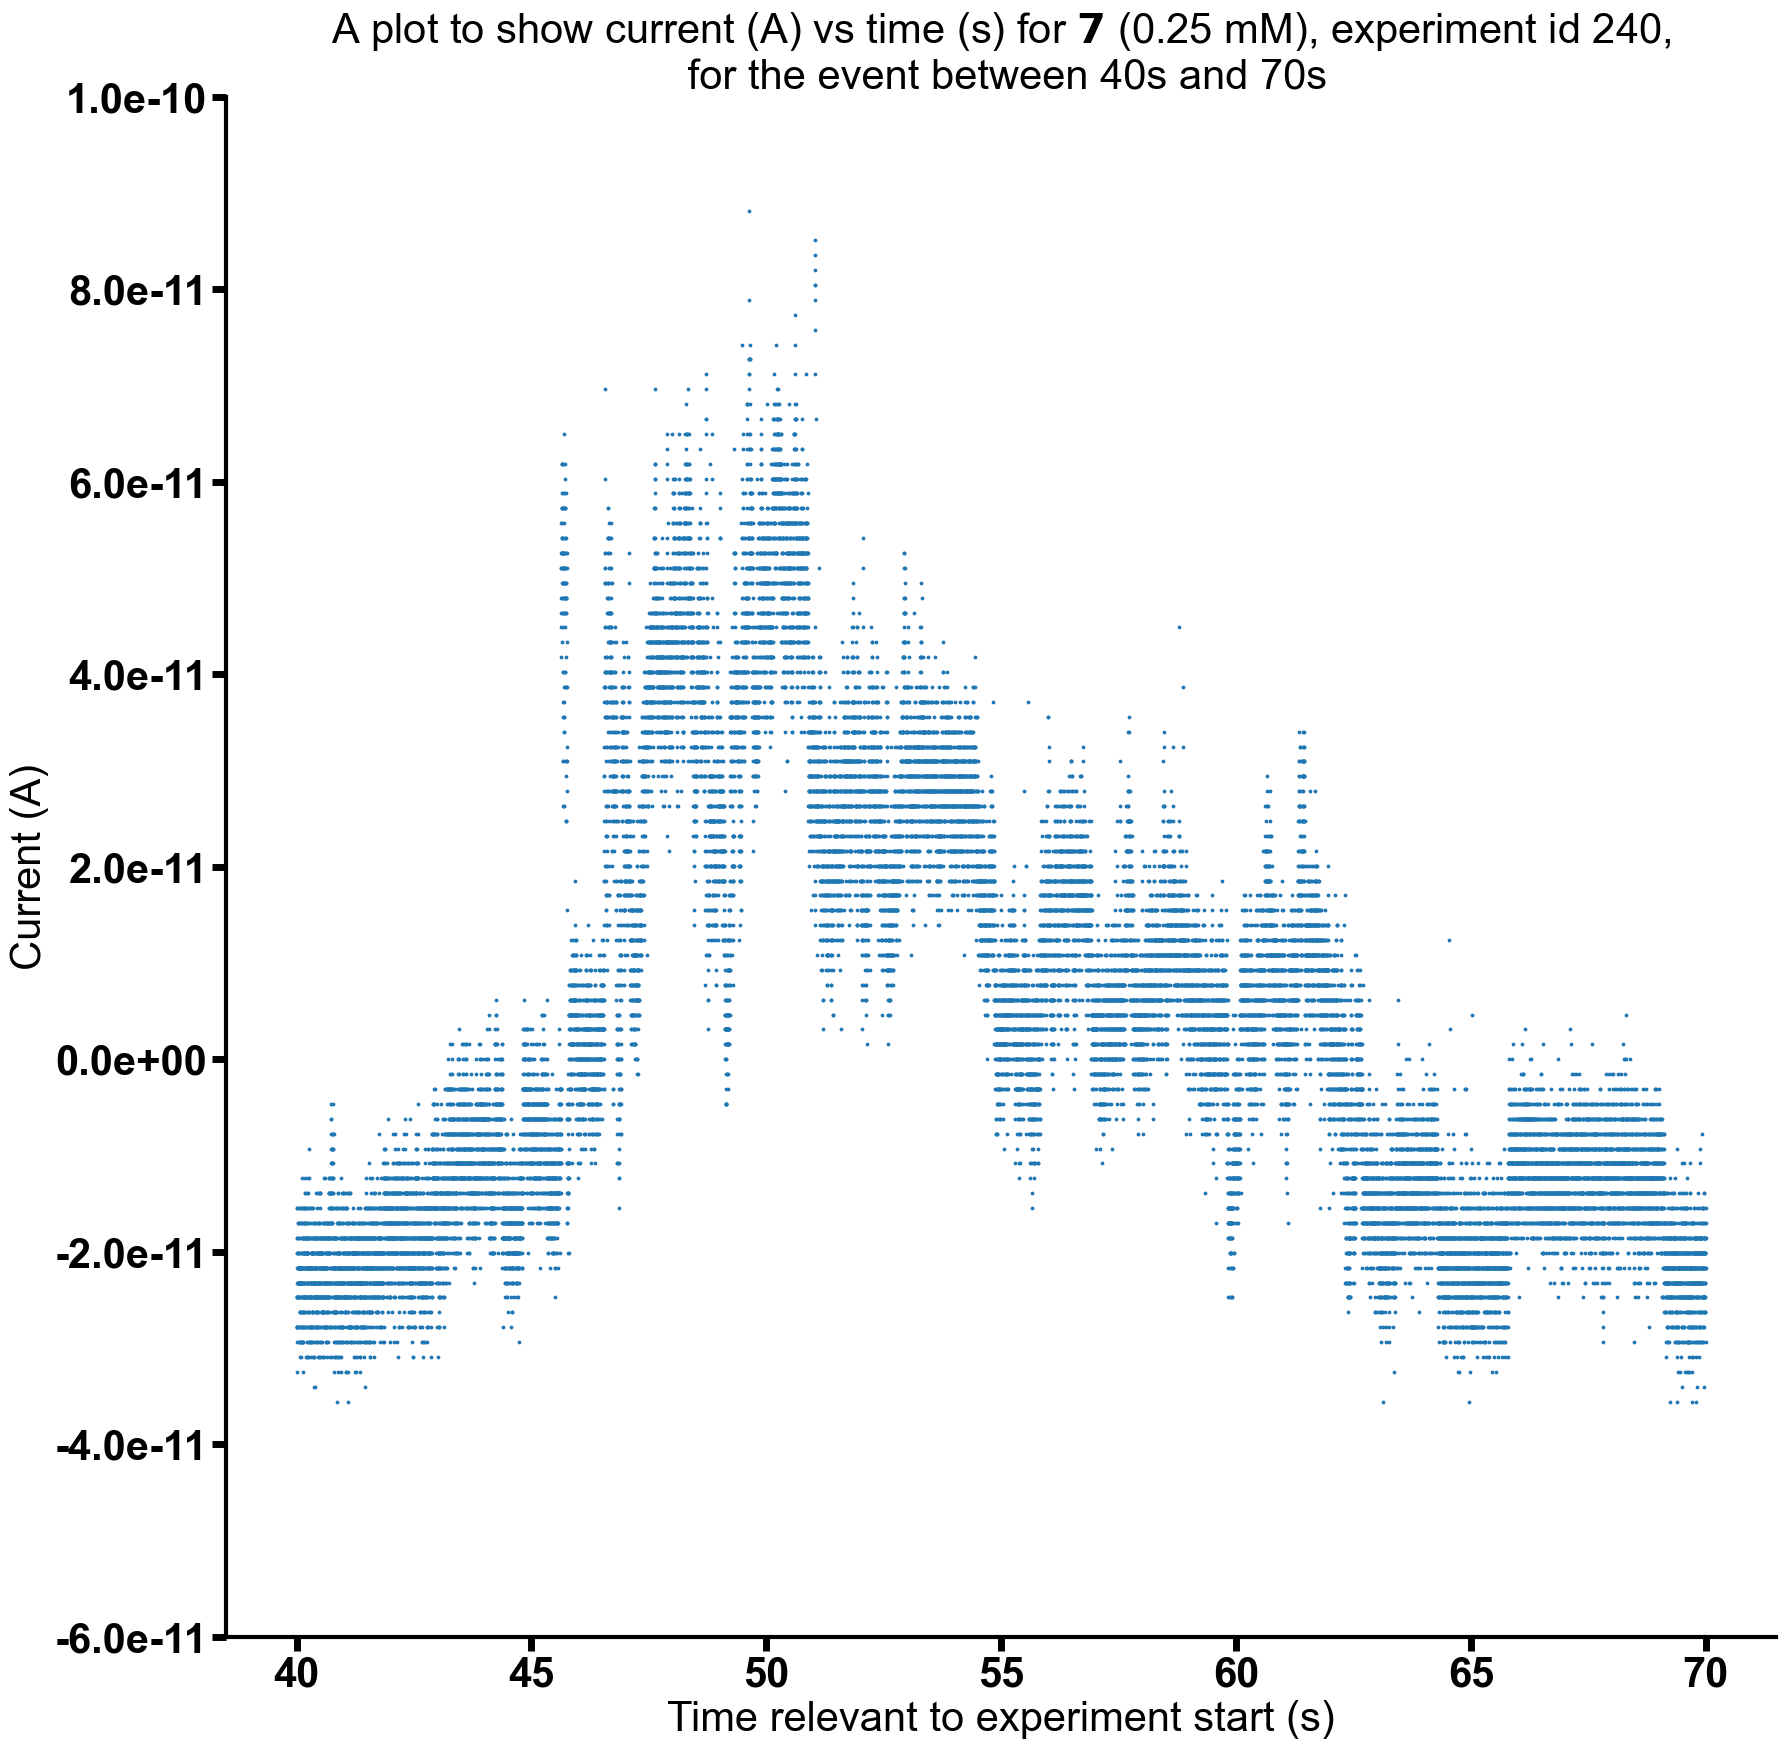

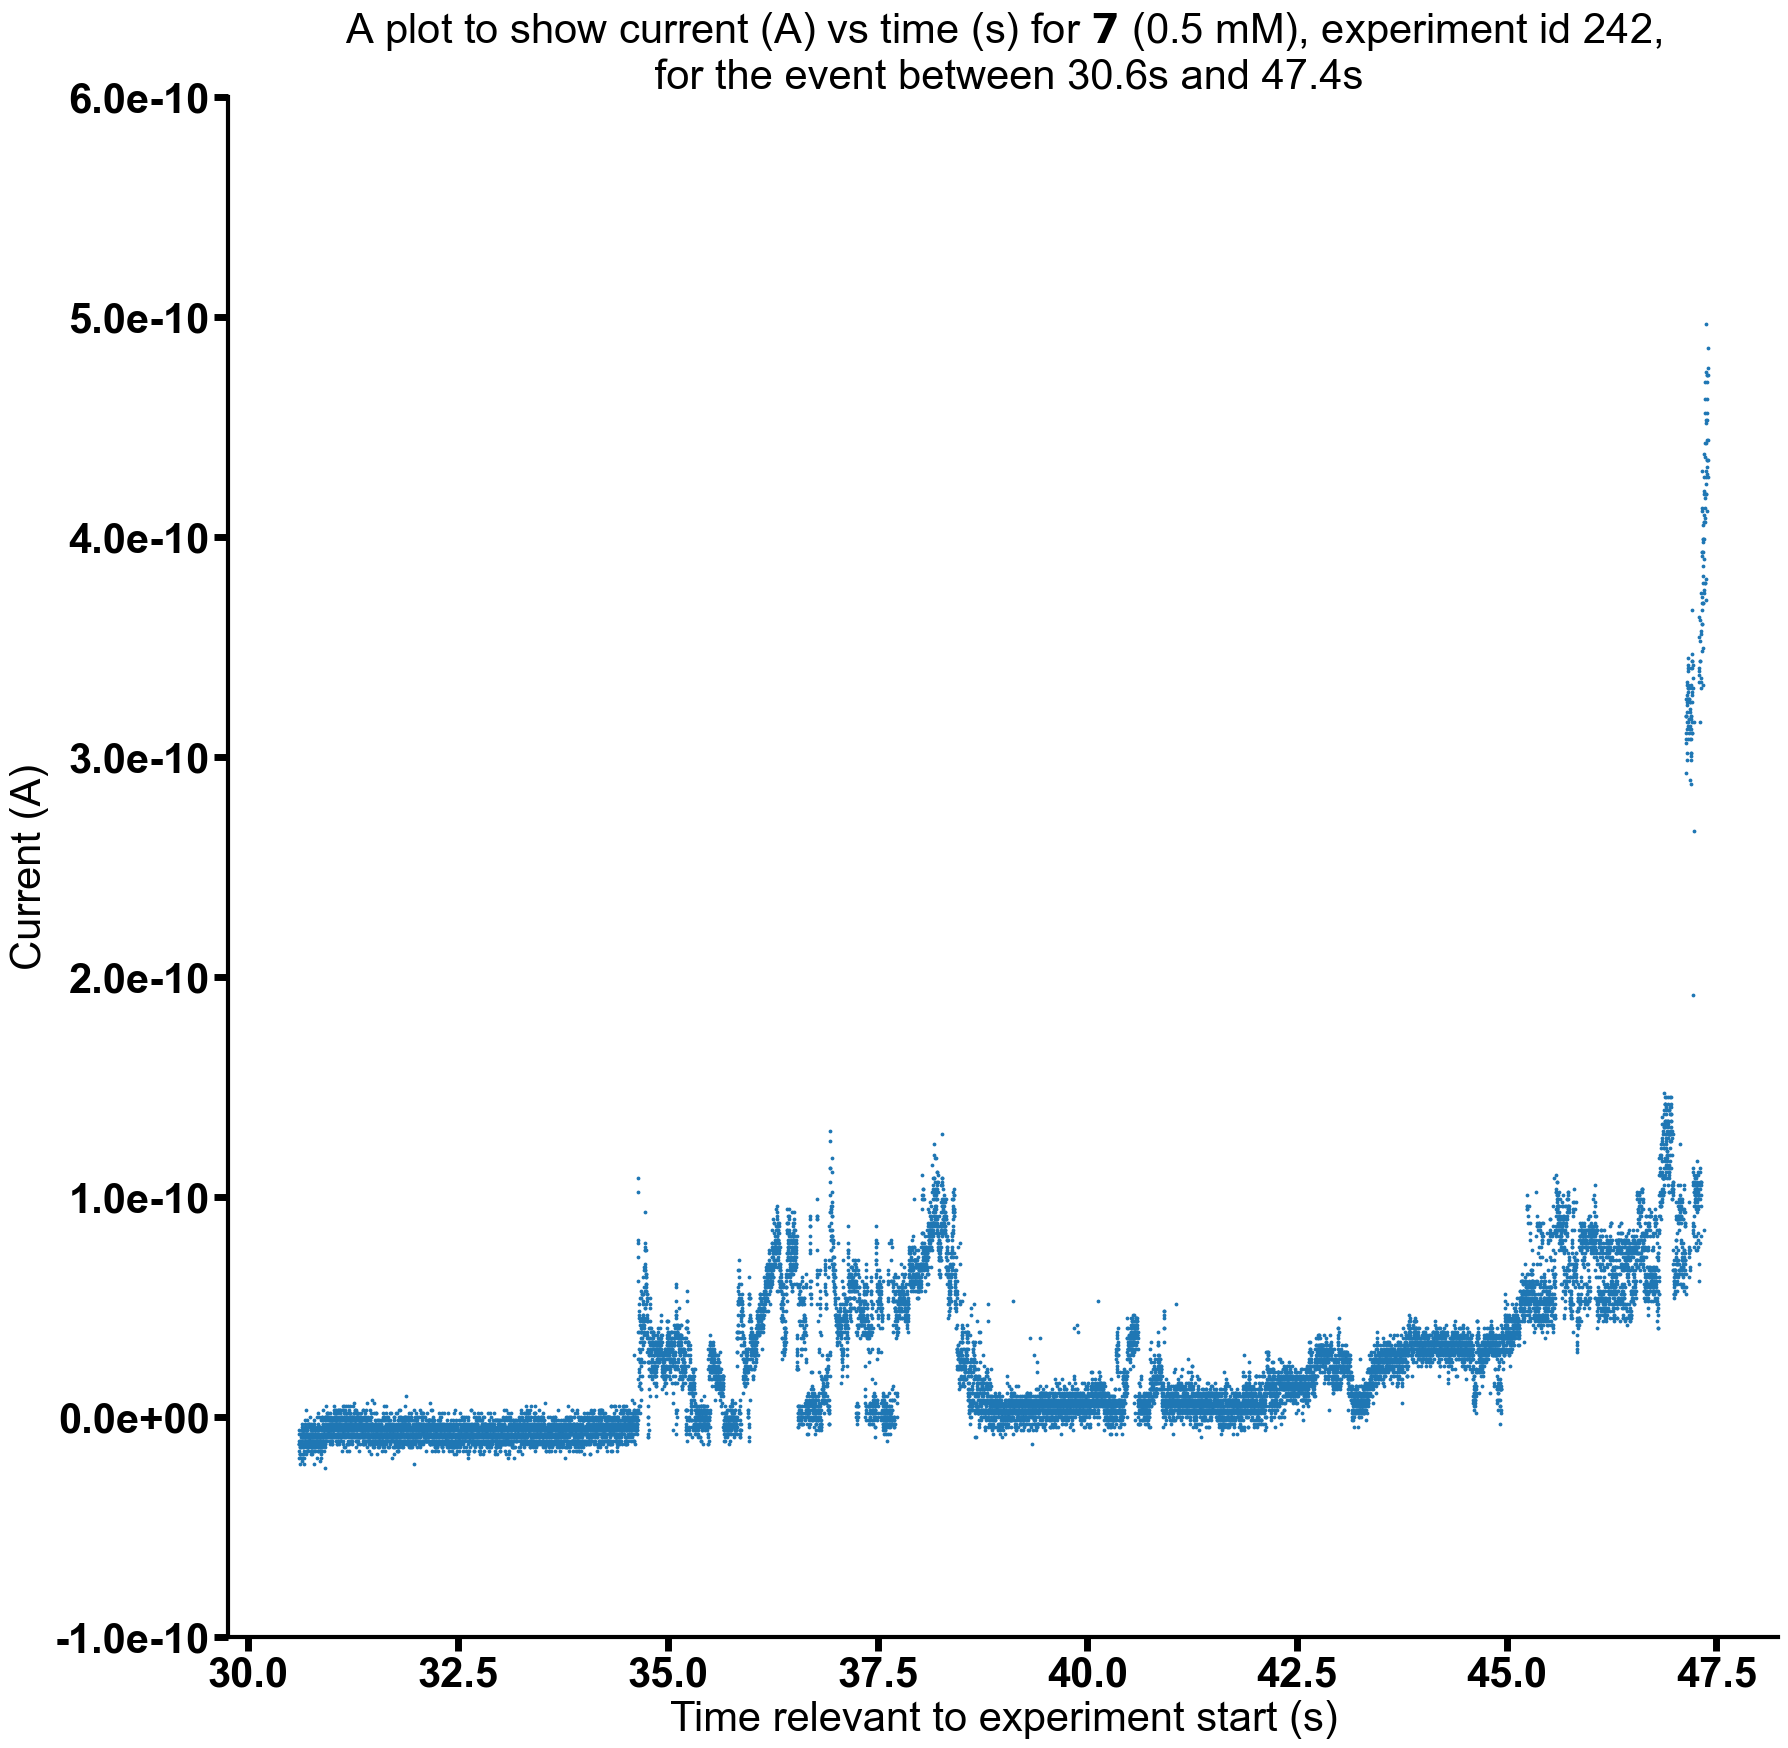

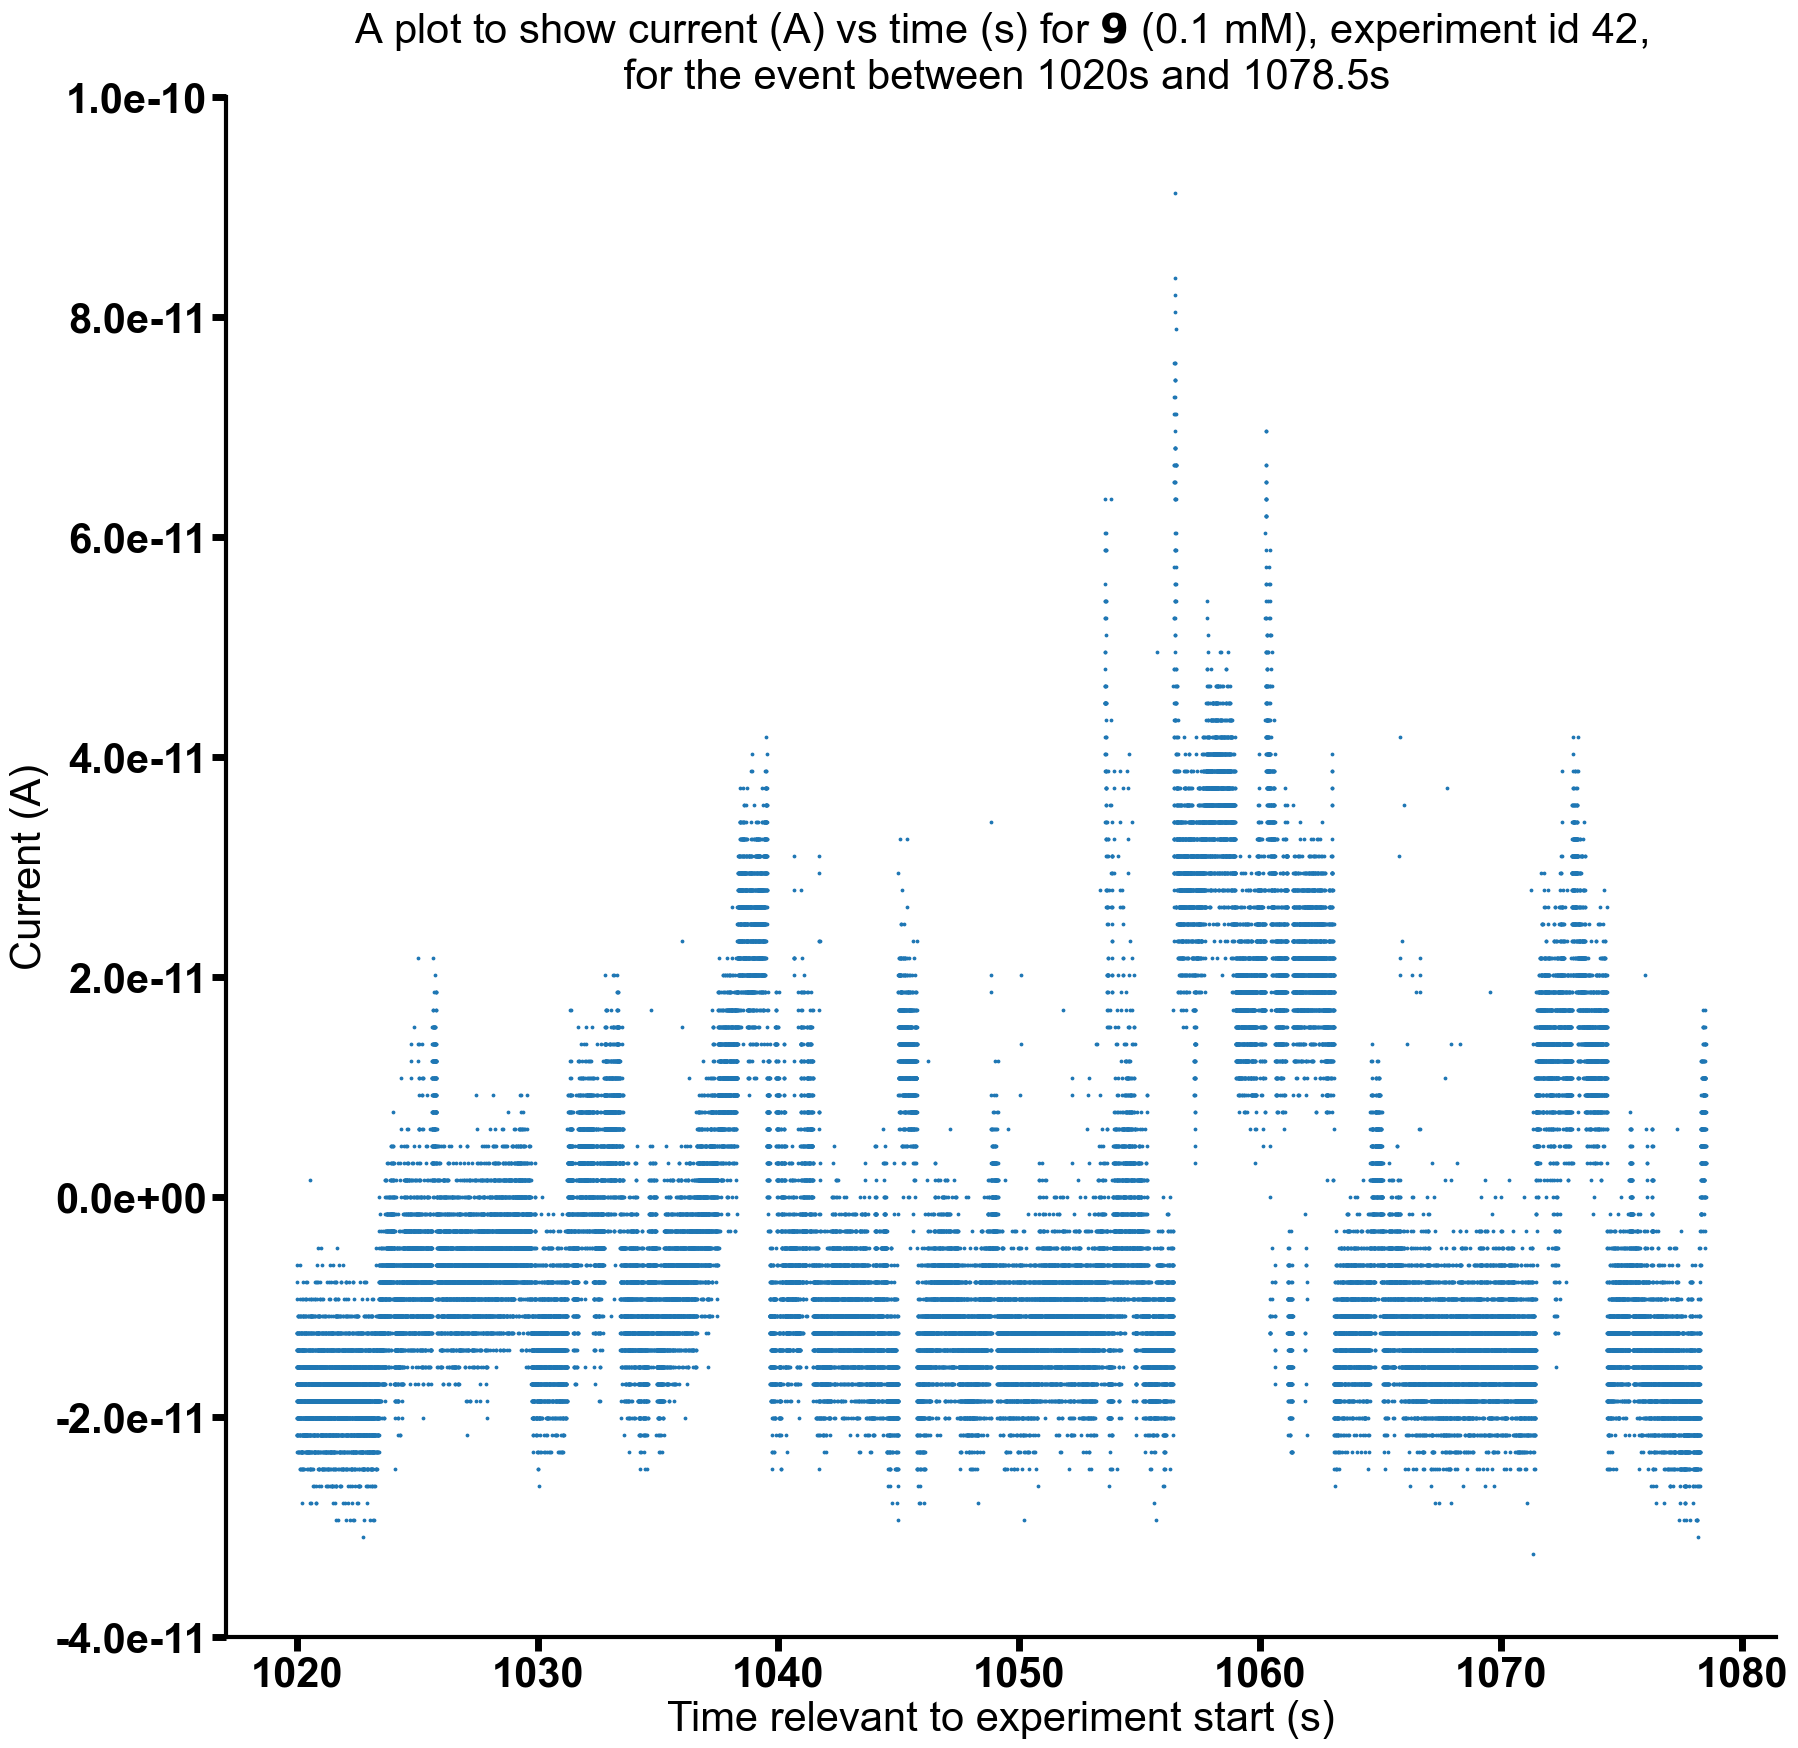

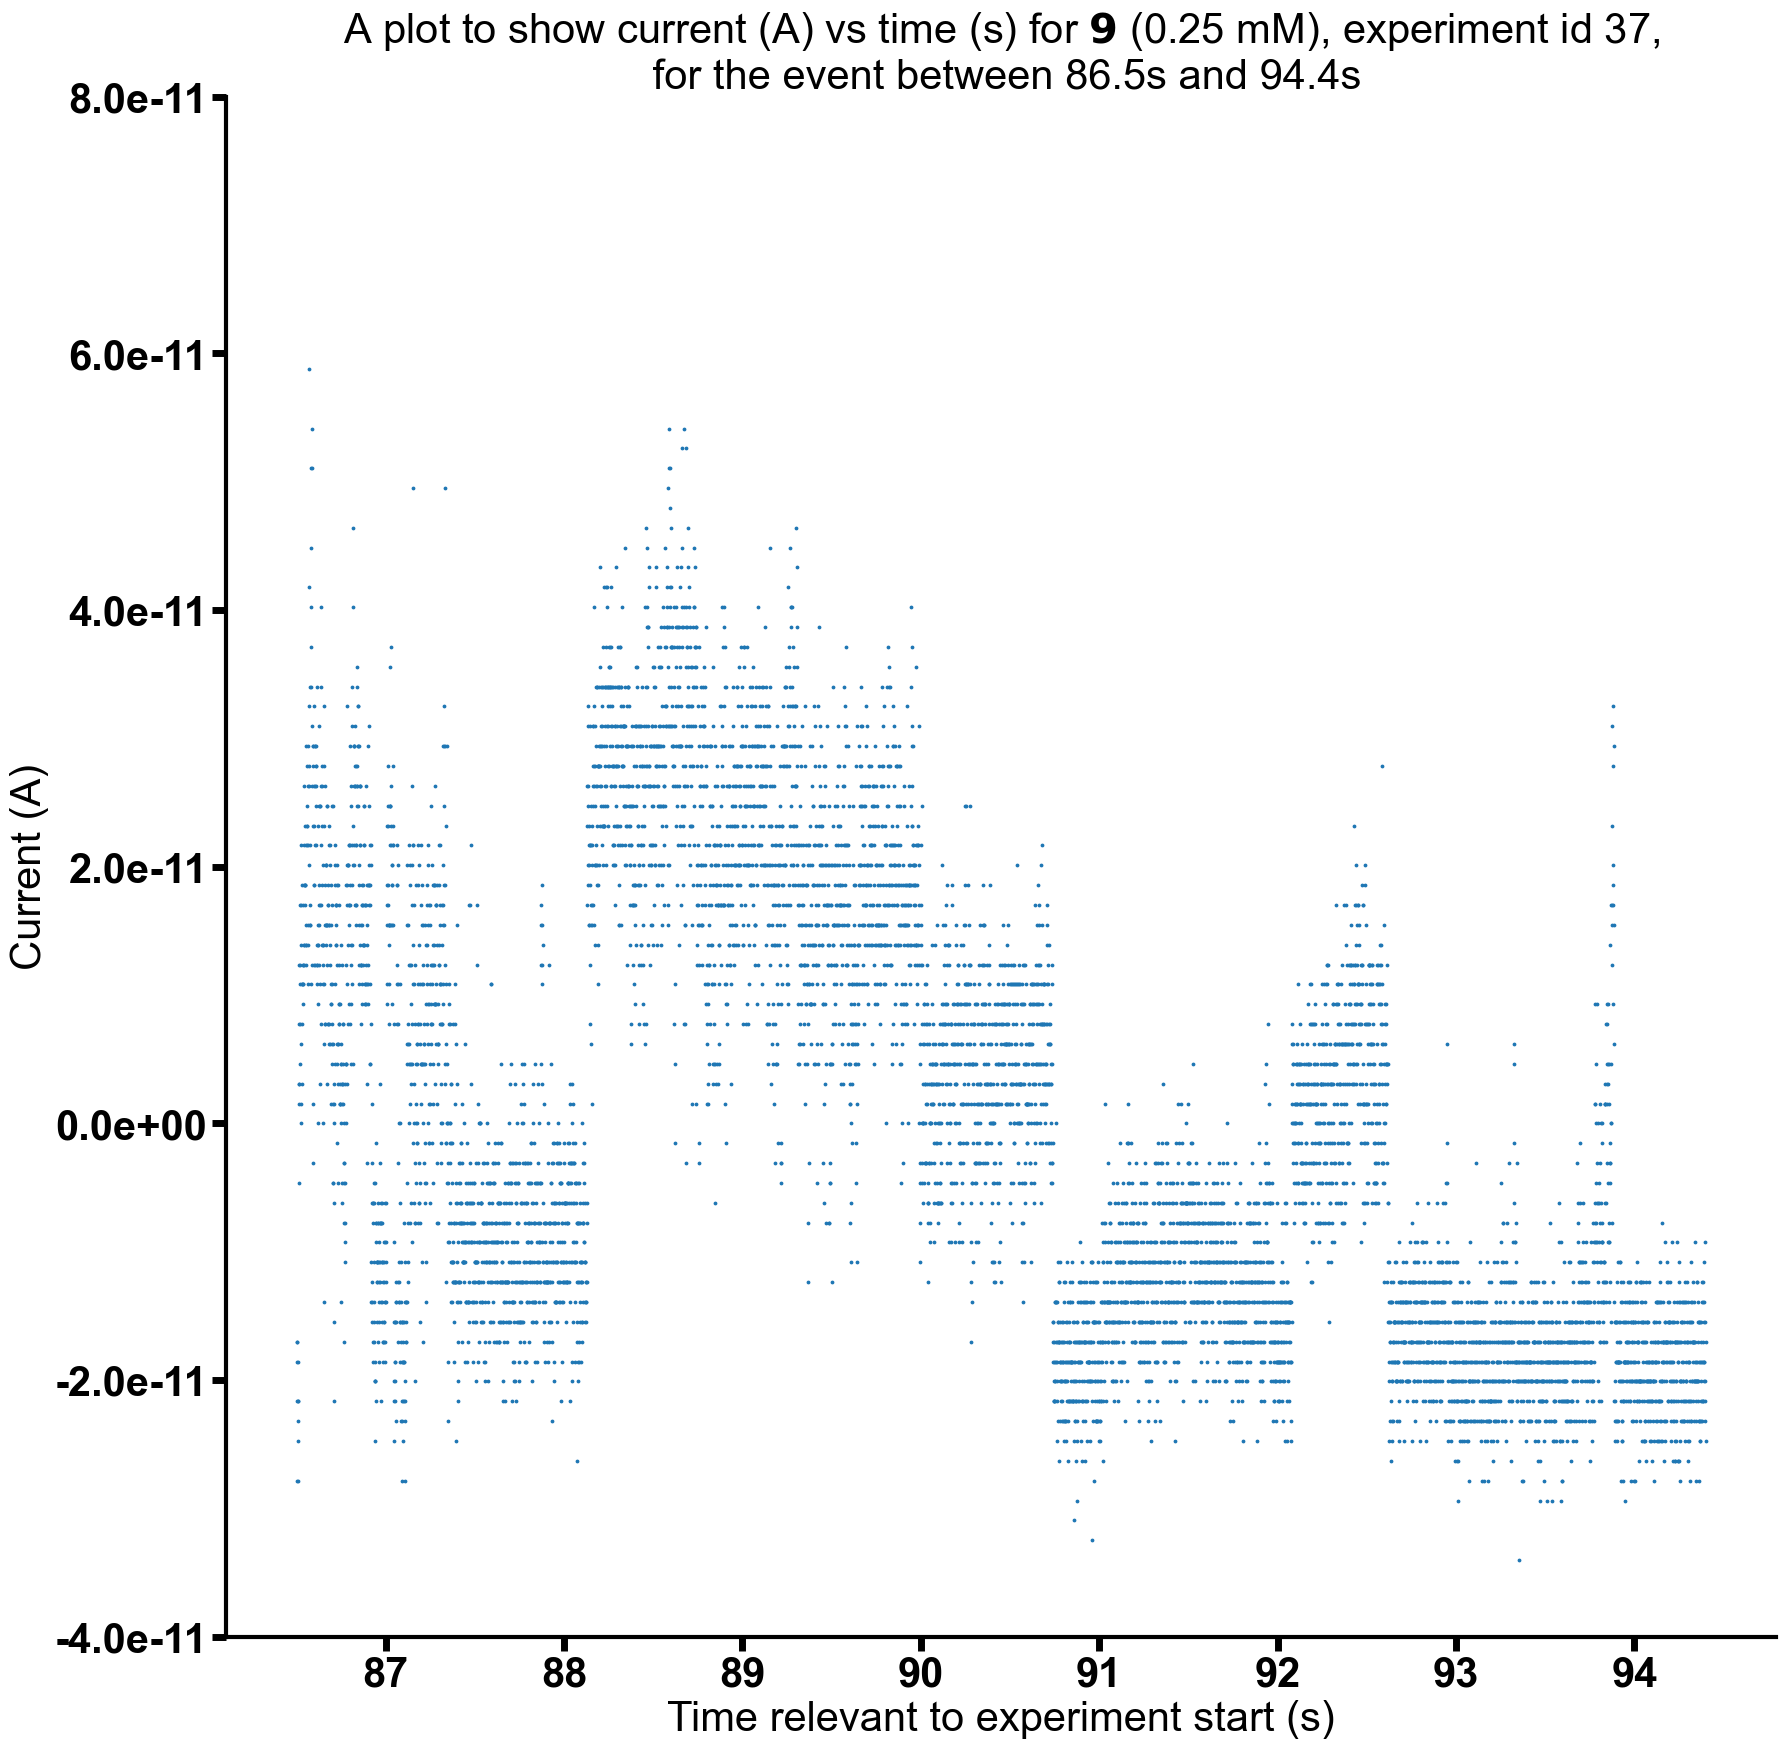

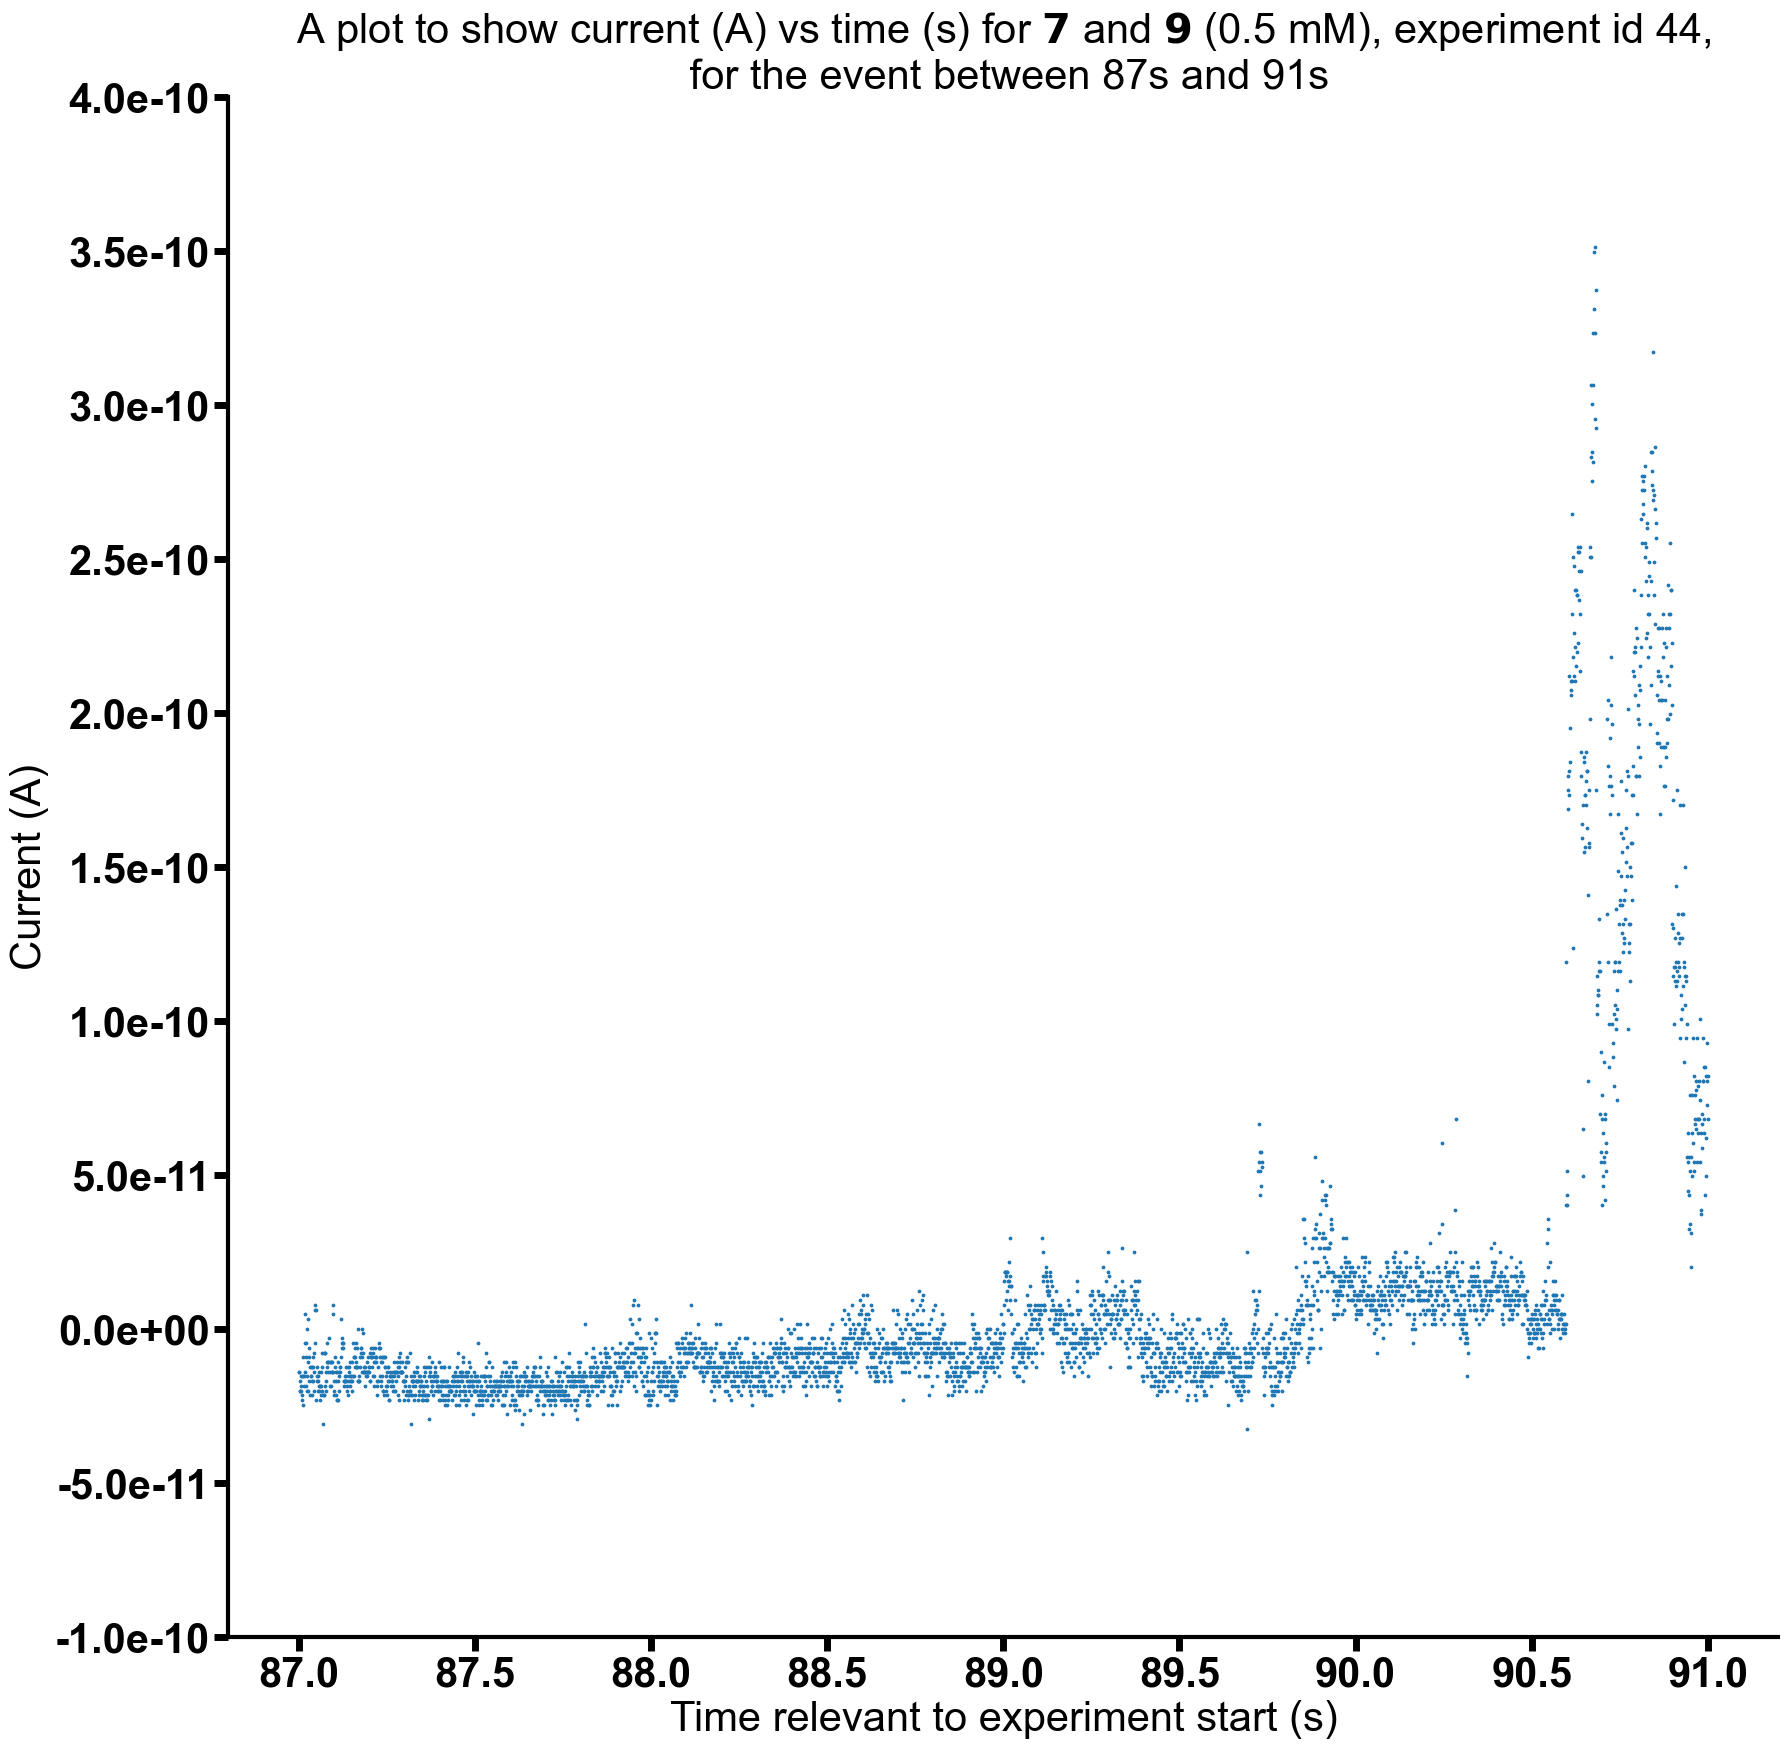

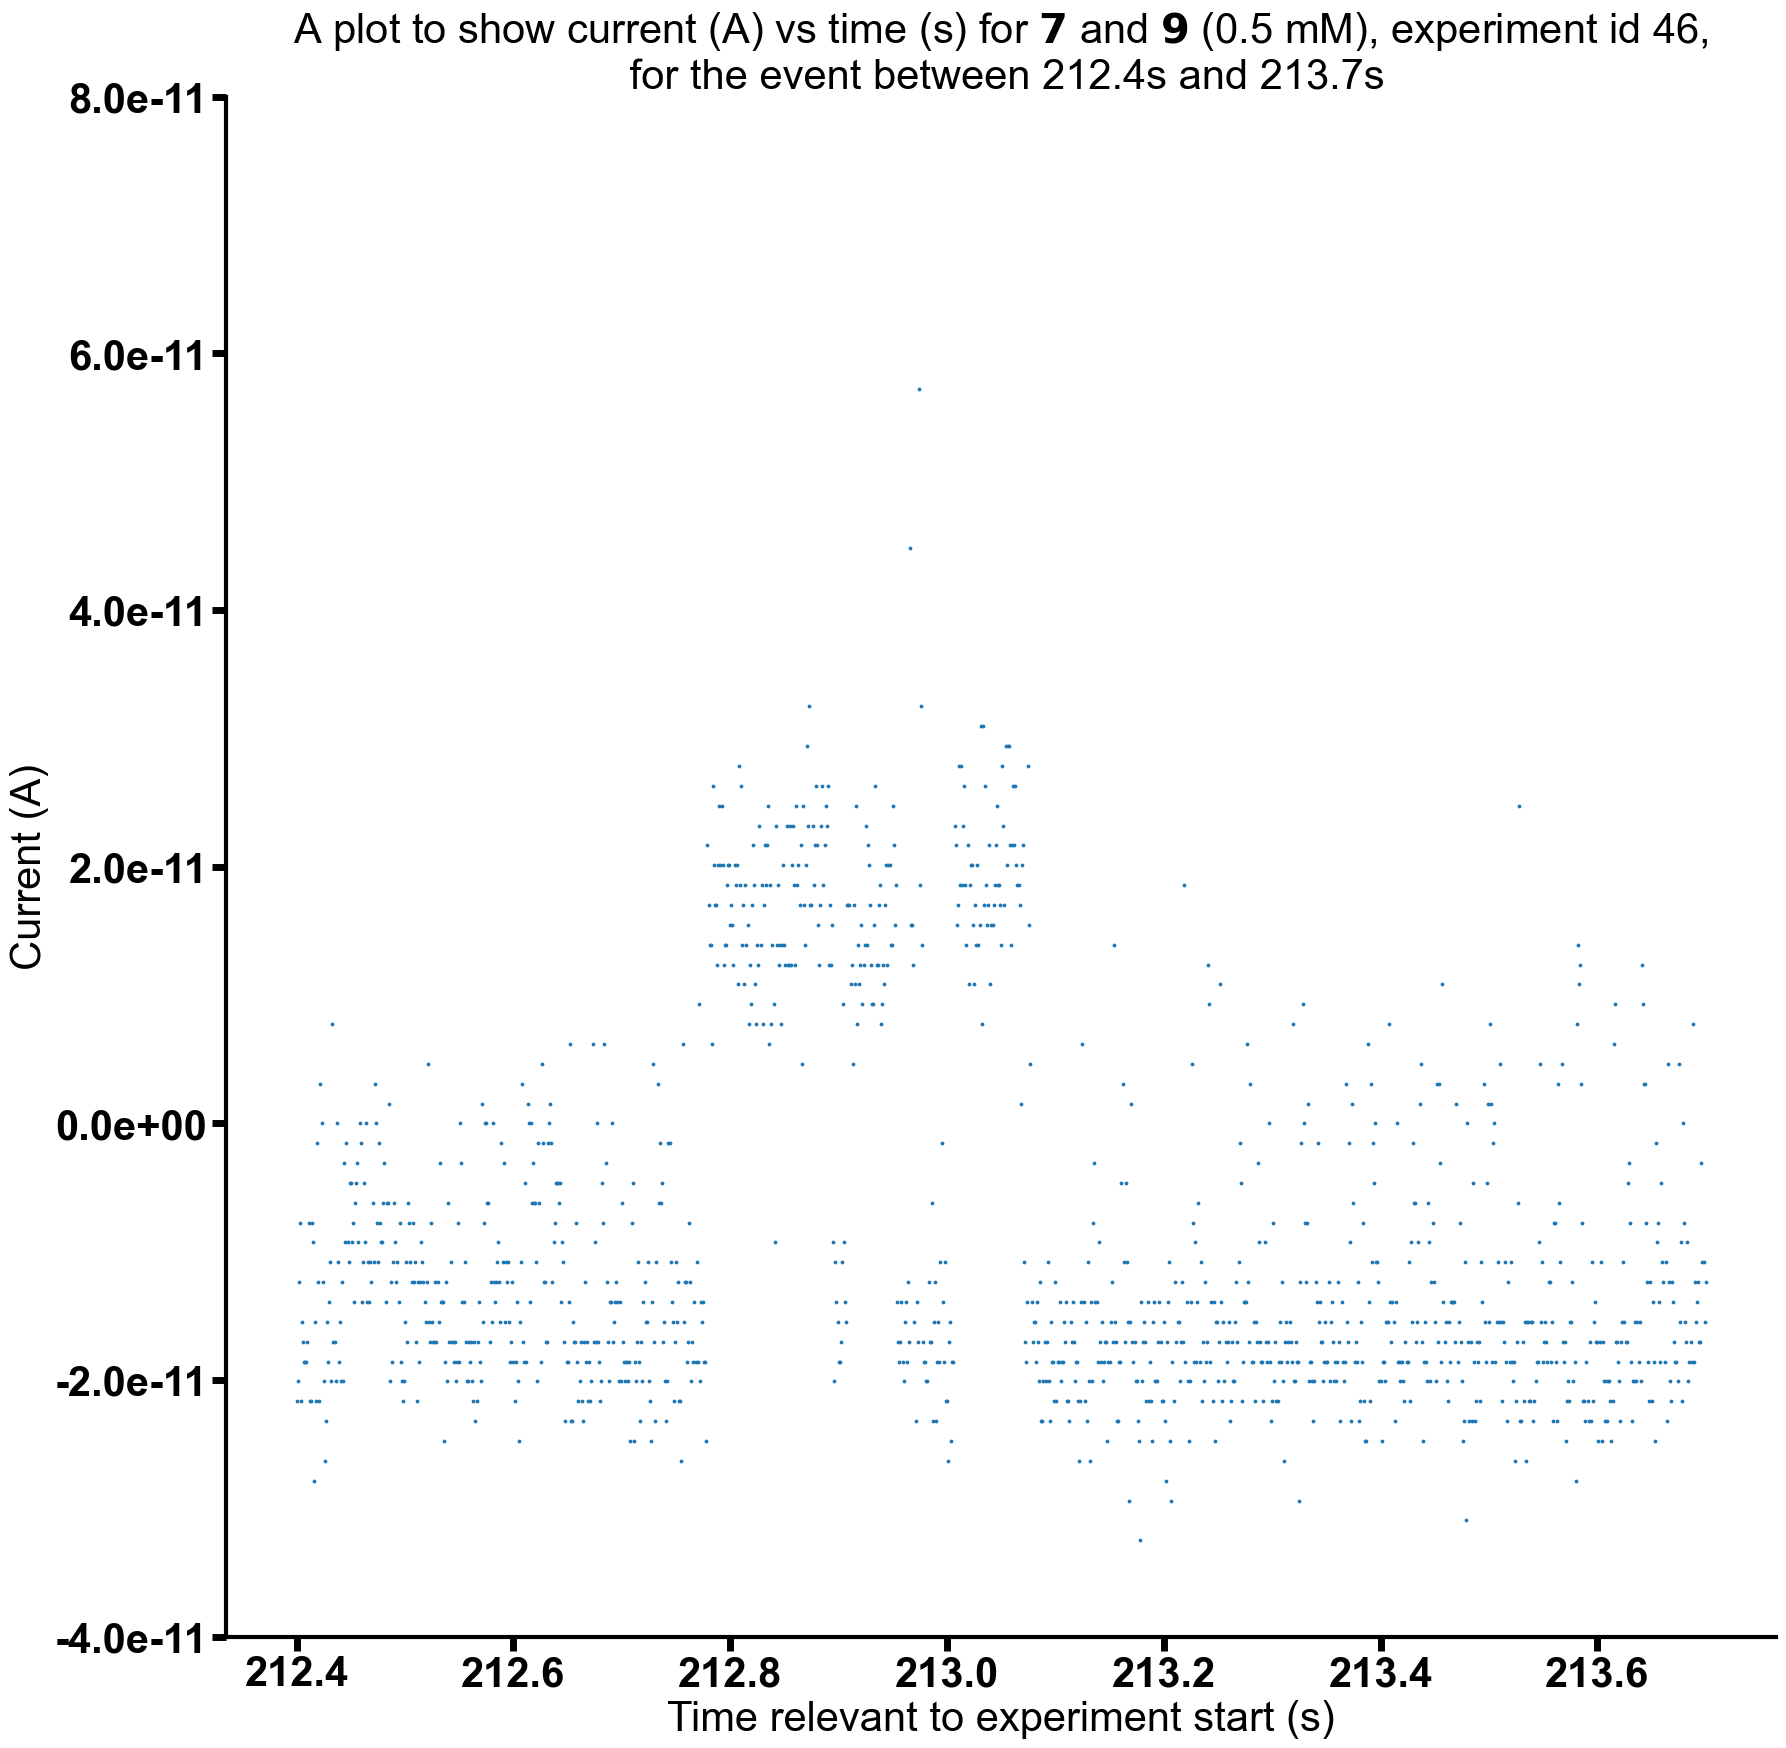

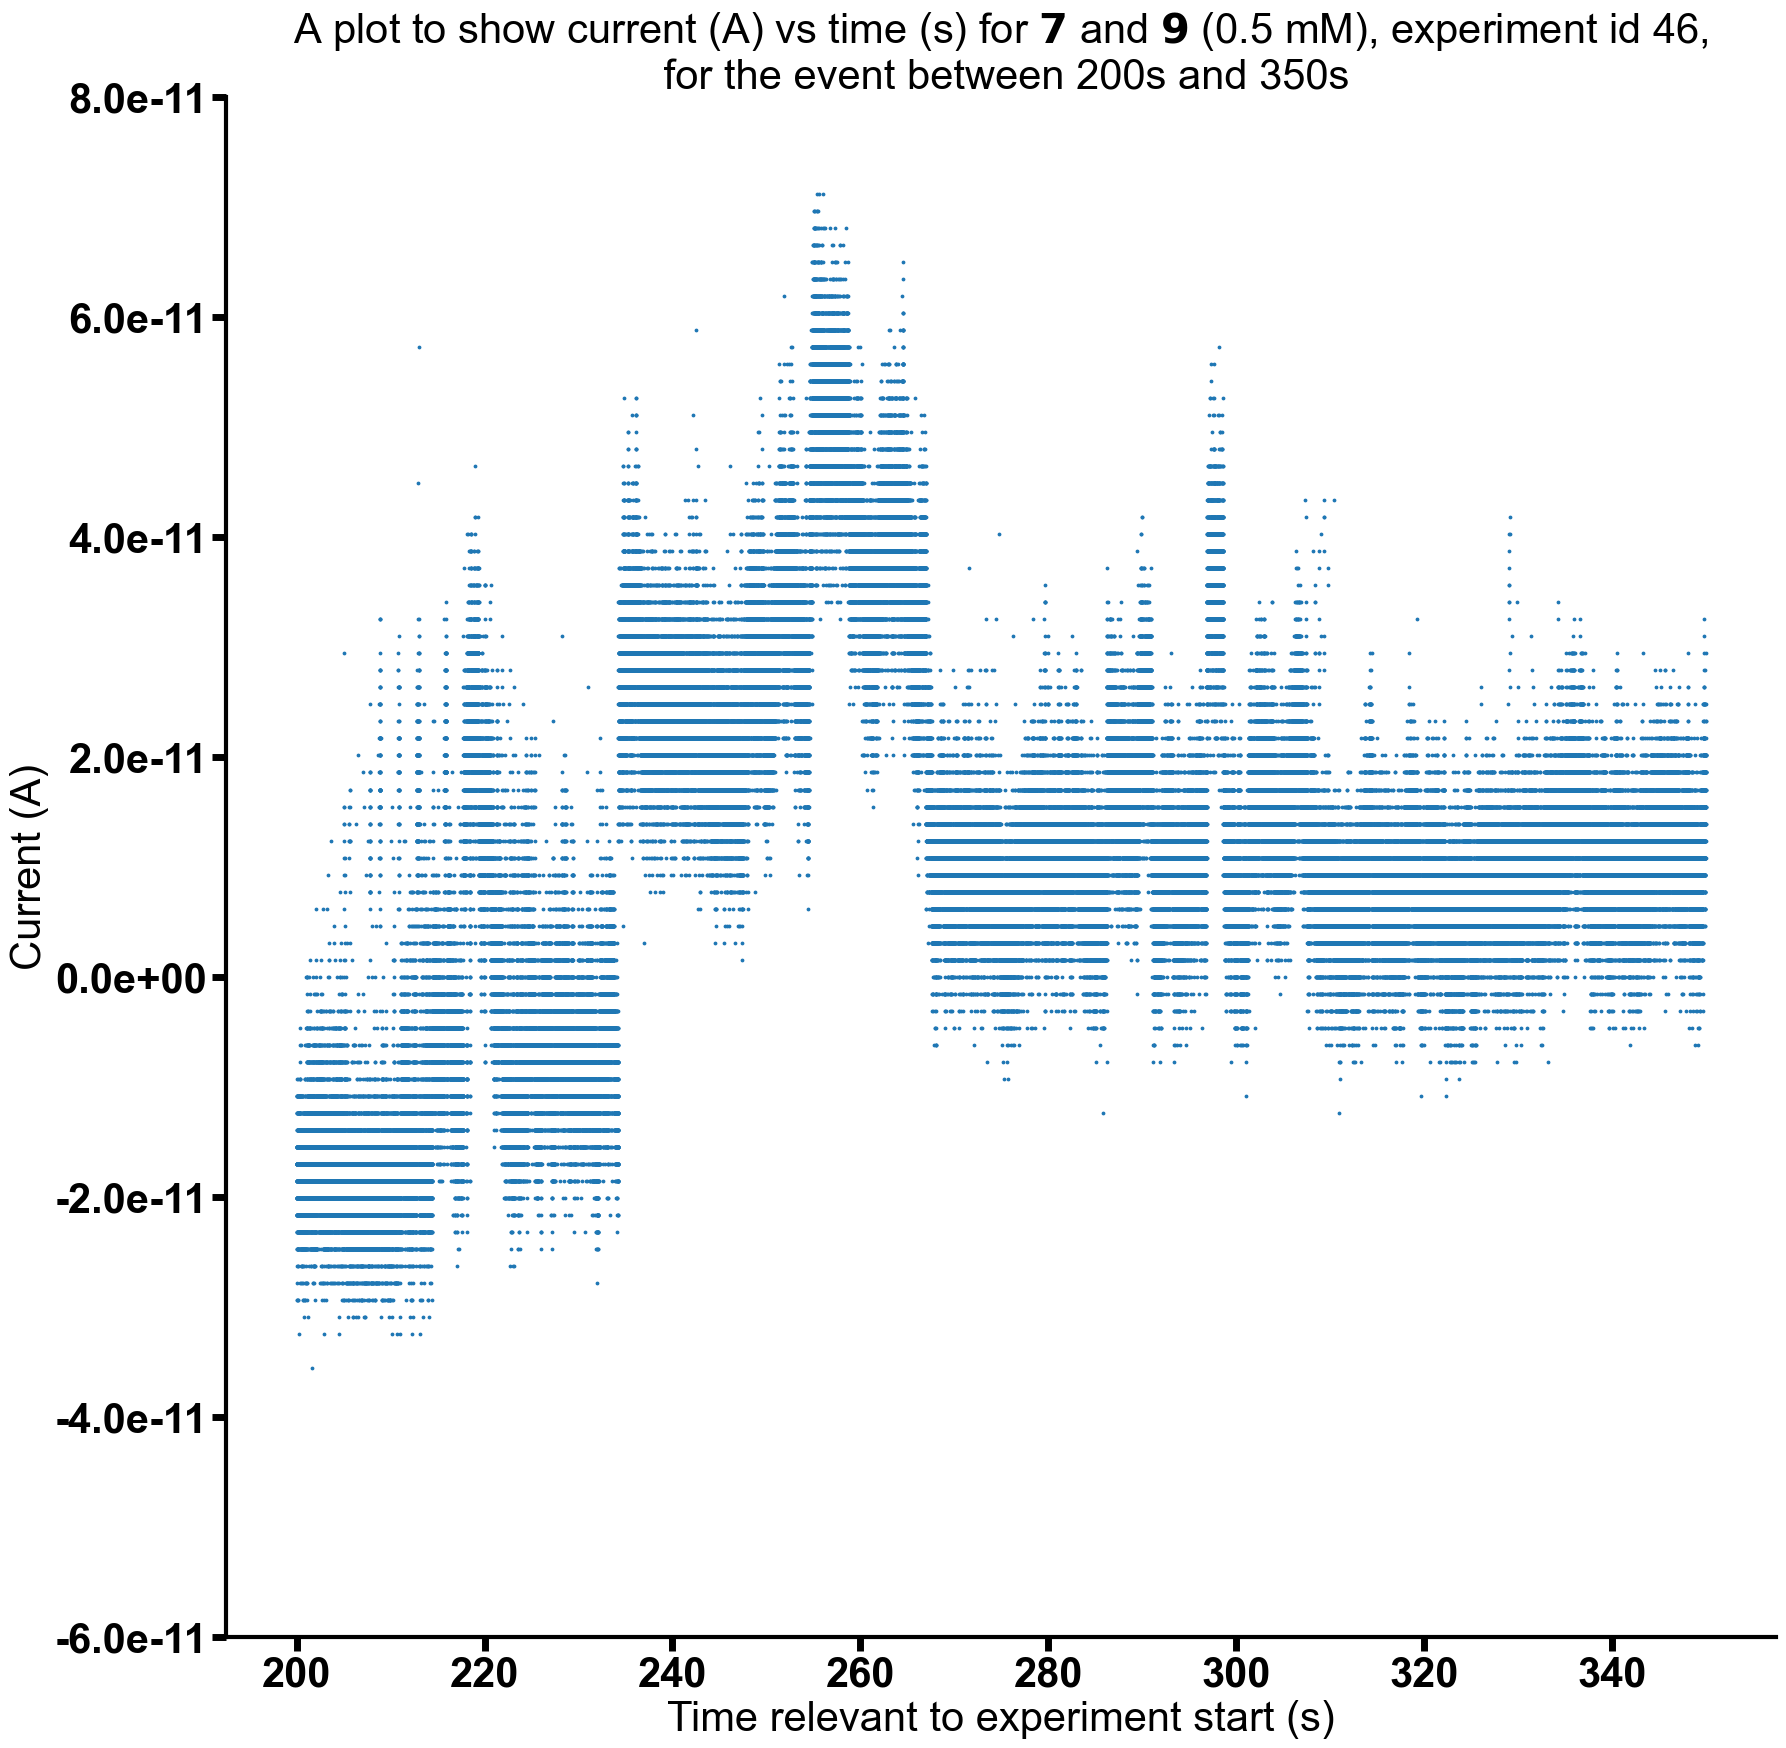

In [12]:
exp59.basic_static_plot_timesearch(294.5, 306.8)

variable current

This section also shows how for loops were used to handle large quanititys of data using the class

In [14]:

def get_file_paths_by_extension(directory, extension):
    file_paths = []
    molecule_ids = []
    exp_ids = []
    conds = []
    
    # Recursively traverse the directory and its subdirectories
    for root, dirs, files in os.walk(directory):
        for file in files:
            molecule_id = root.split(os.sep)[-3]
            exp_id = root.split(os.sep)[-1]
            cond = root.split(os.sep)[-2]
           
            if file.endswith(extension):
                file_paths.append(os.path.join(root, file))
                molecule_ids.append(molecule_id)
                exp_ids.append(exp_id)
                conds.append(cond)
    
    return file_paths, molecule_ids, exp_ids, conds

file_paths, molecule_ids, exp_ids, conds = get_file_paths_by_extension(r'$base_dir$\carboxylate_patch_clamp_data - General\data_processing_second_run\processed_data_variable_current','csv')


# Check if all lists have the same length
if len(file_paths) == len(molecule_ids) == len(exp_ids) == len(conds):
    print("All lists have the same length.", len(file_paths))
else:
    print("Lists have different lengths.")

All lists have the same length. 14


mol_5_cond_1_mM_+100_mV_75
75
here


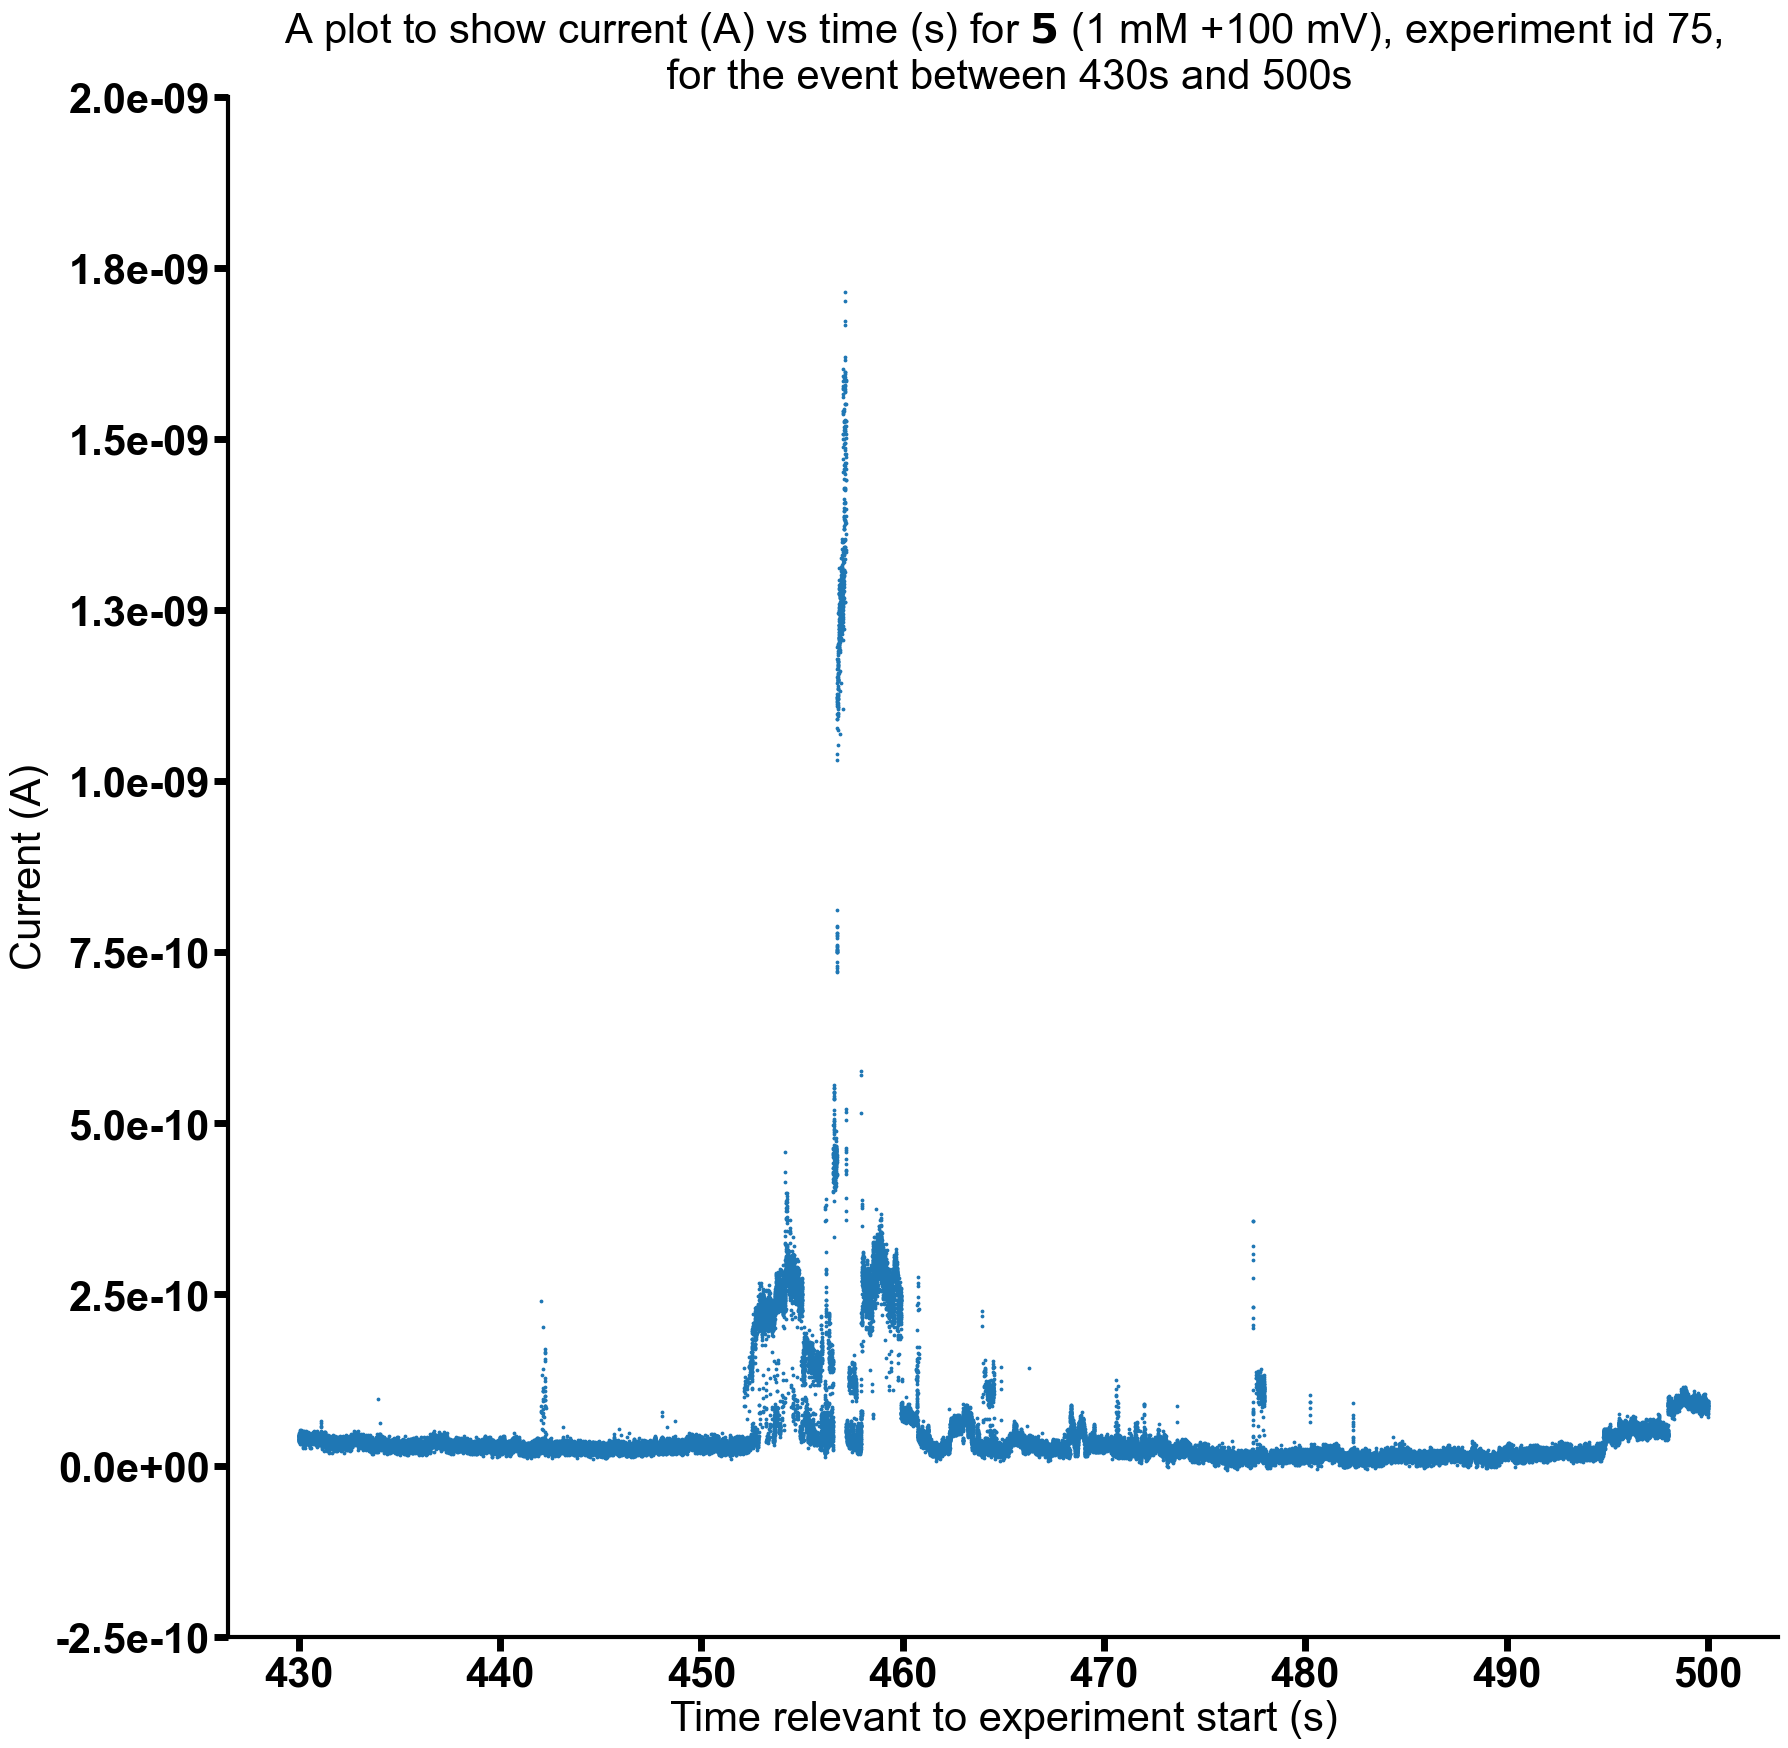

mol_5_cond_1_mM_+100_mV_76
76
mol_5_cond_1_mM_+100_mV_77
77
mol_5_cond_1_mM_+100_mV_86
86
mol_5_cond_1_mM_+50_mV_72
72
mol_5_cond_1_mM_+50_mV_73
73


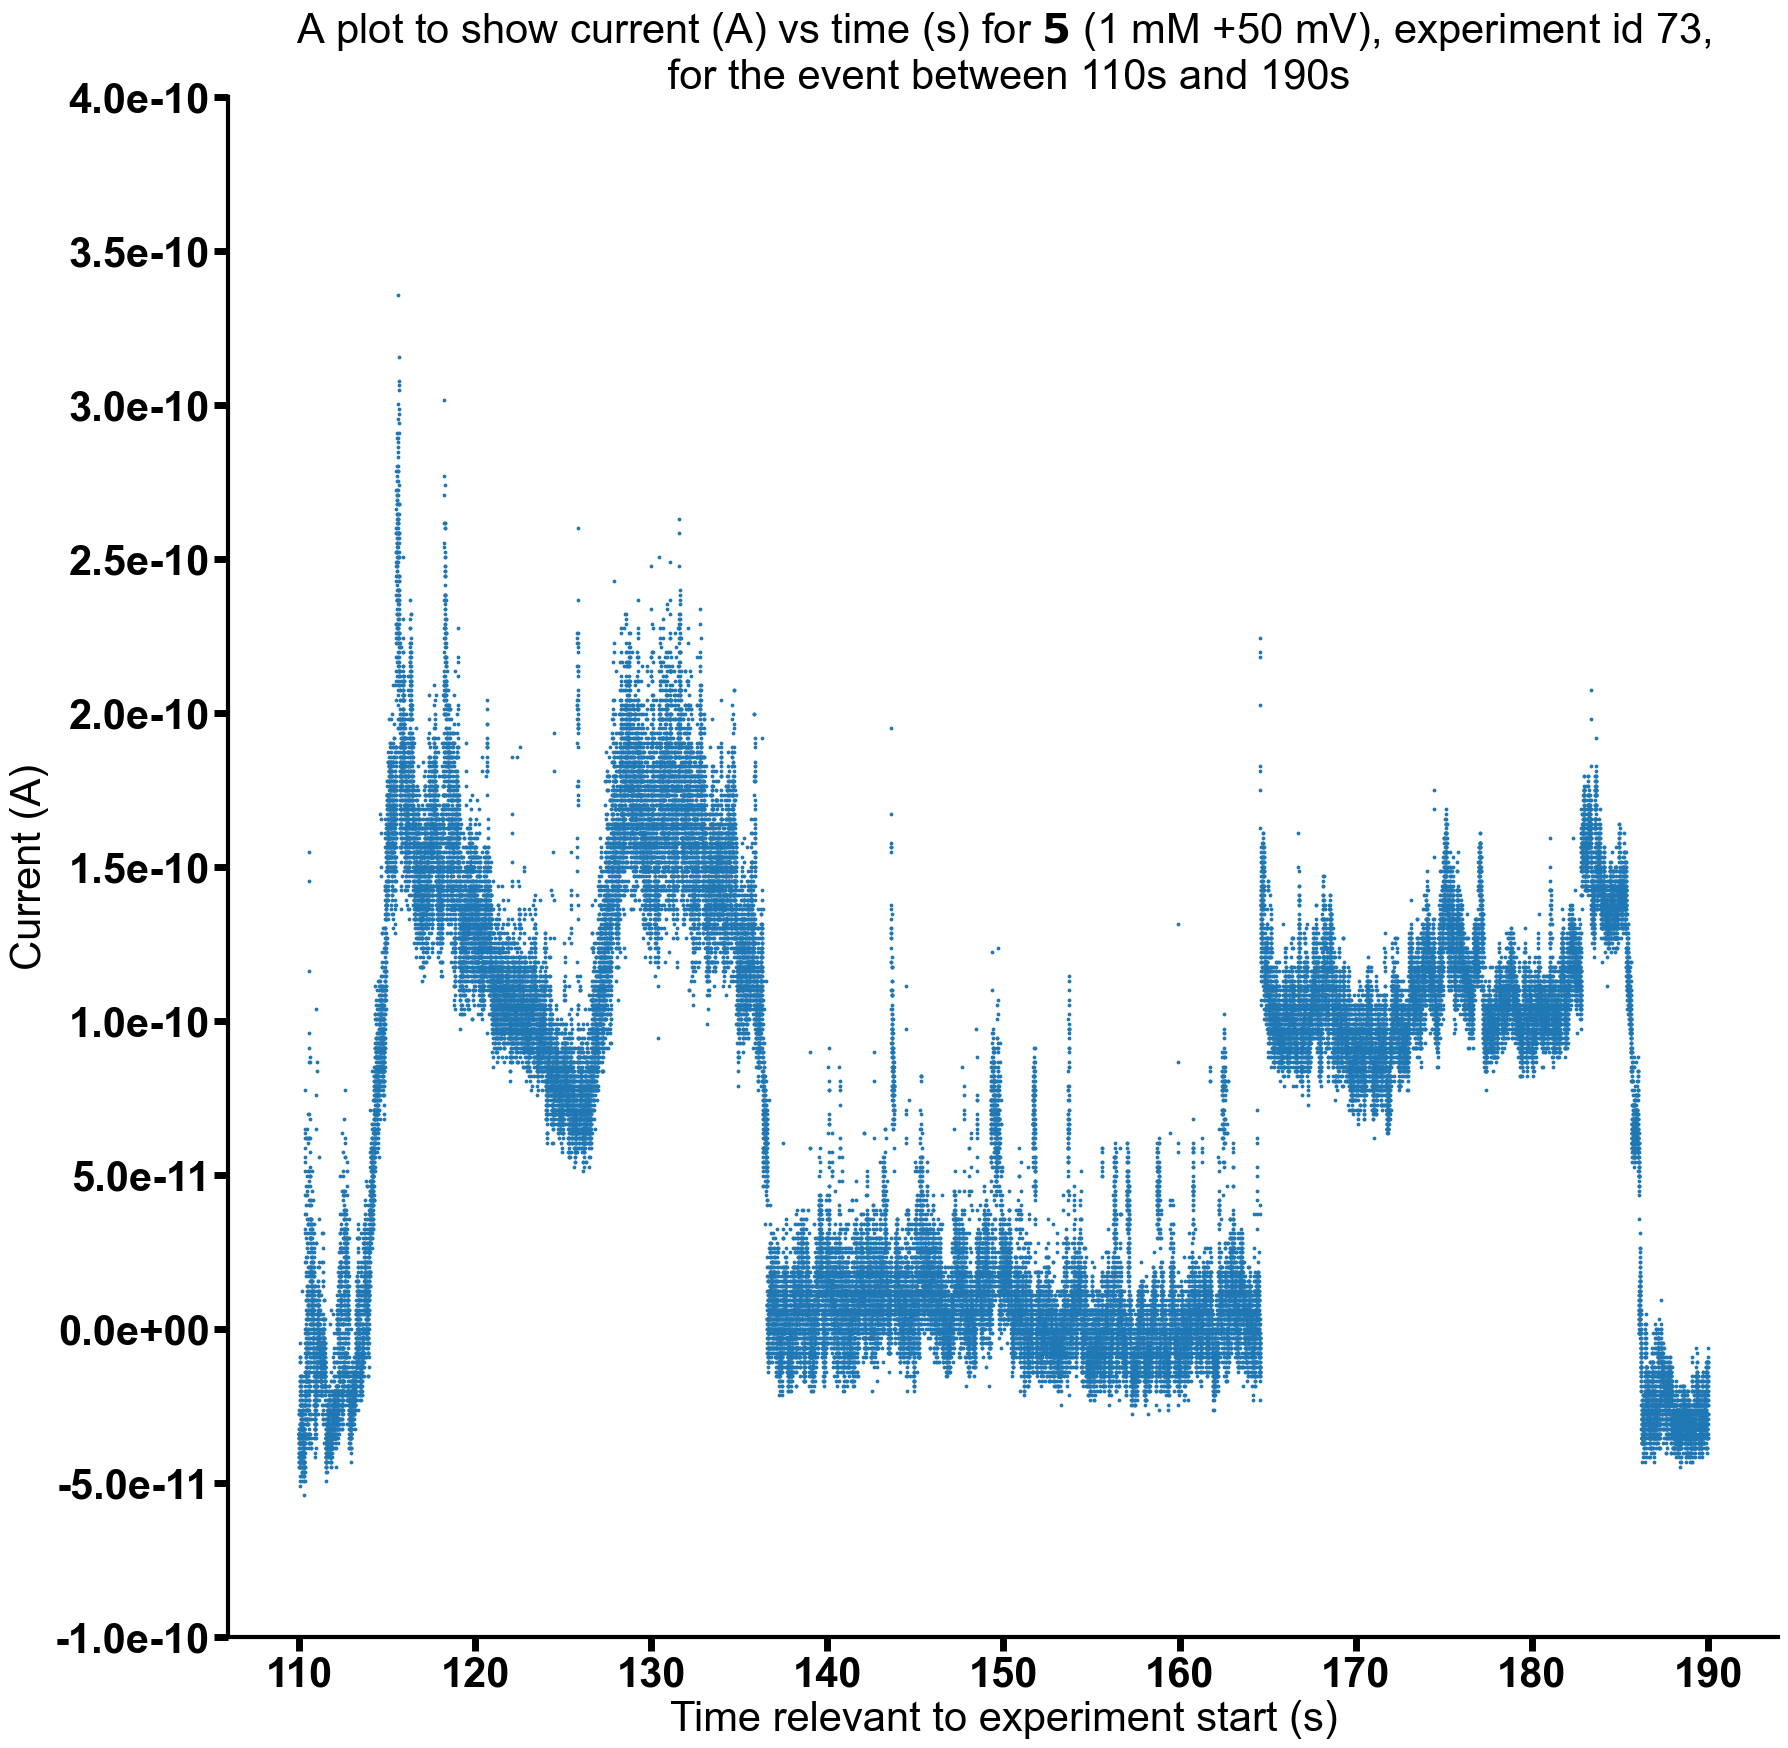

mol_5_cond_1_mM_+50_mV_74
74
mol_5_cond_1_mM_-100_mV_81
81


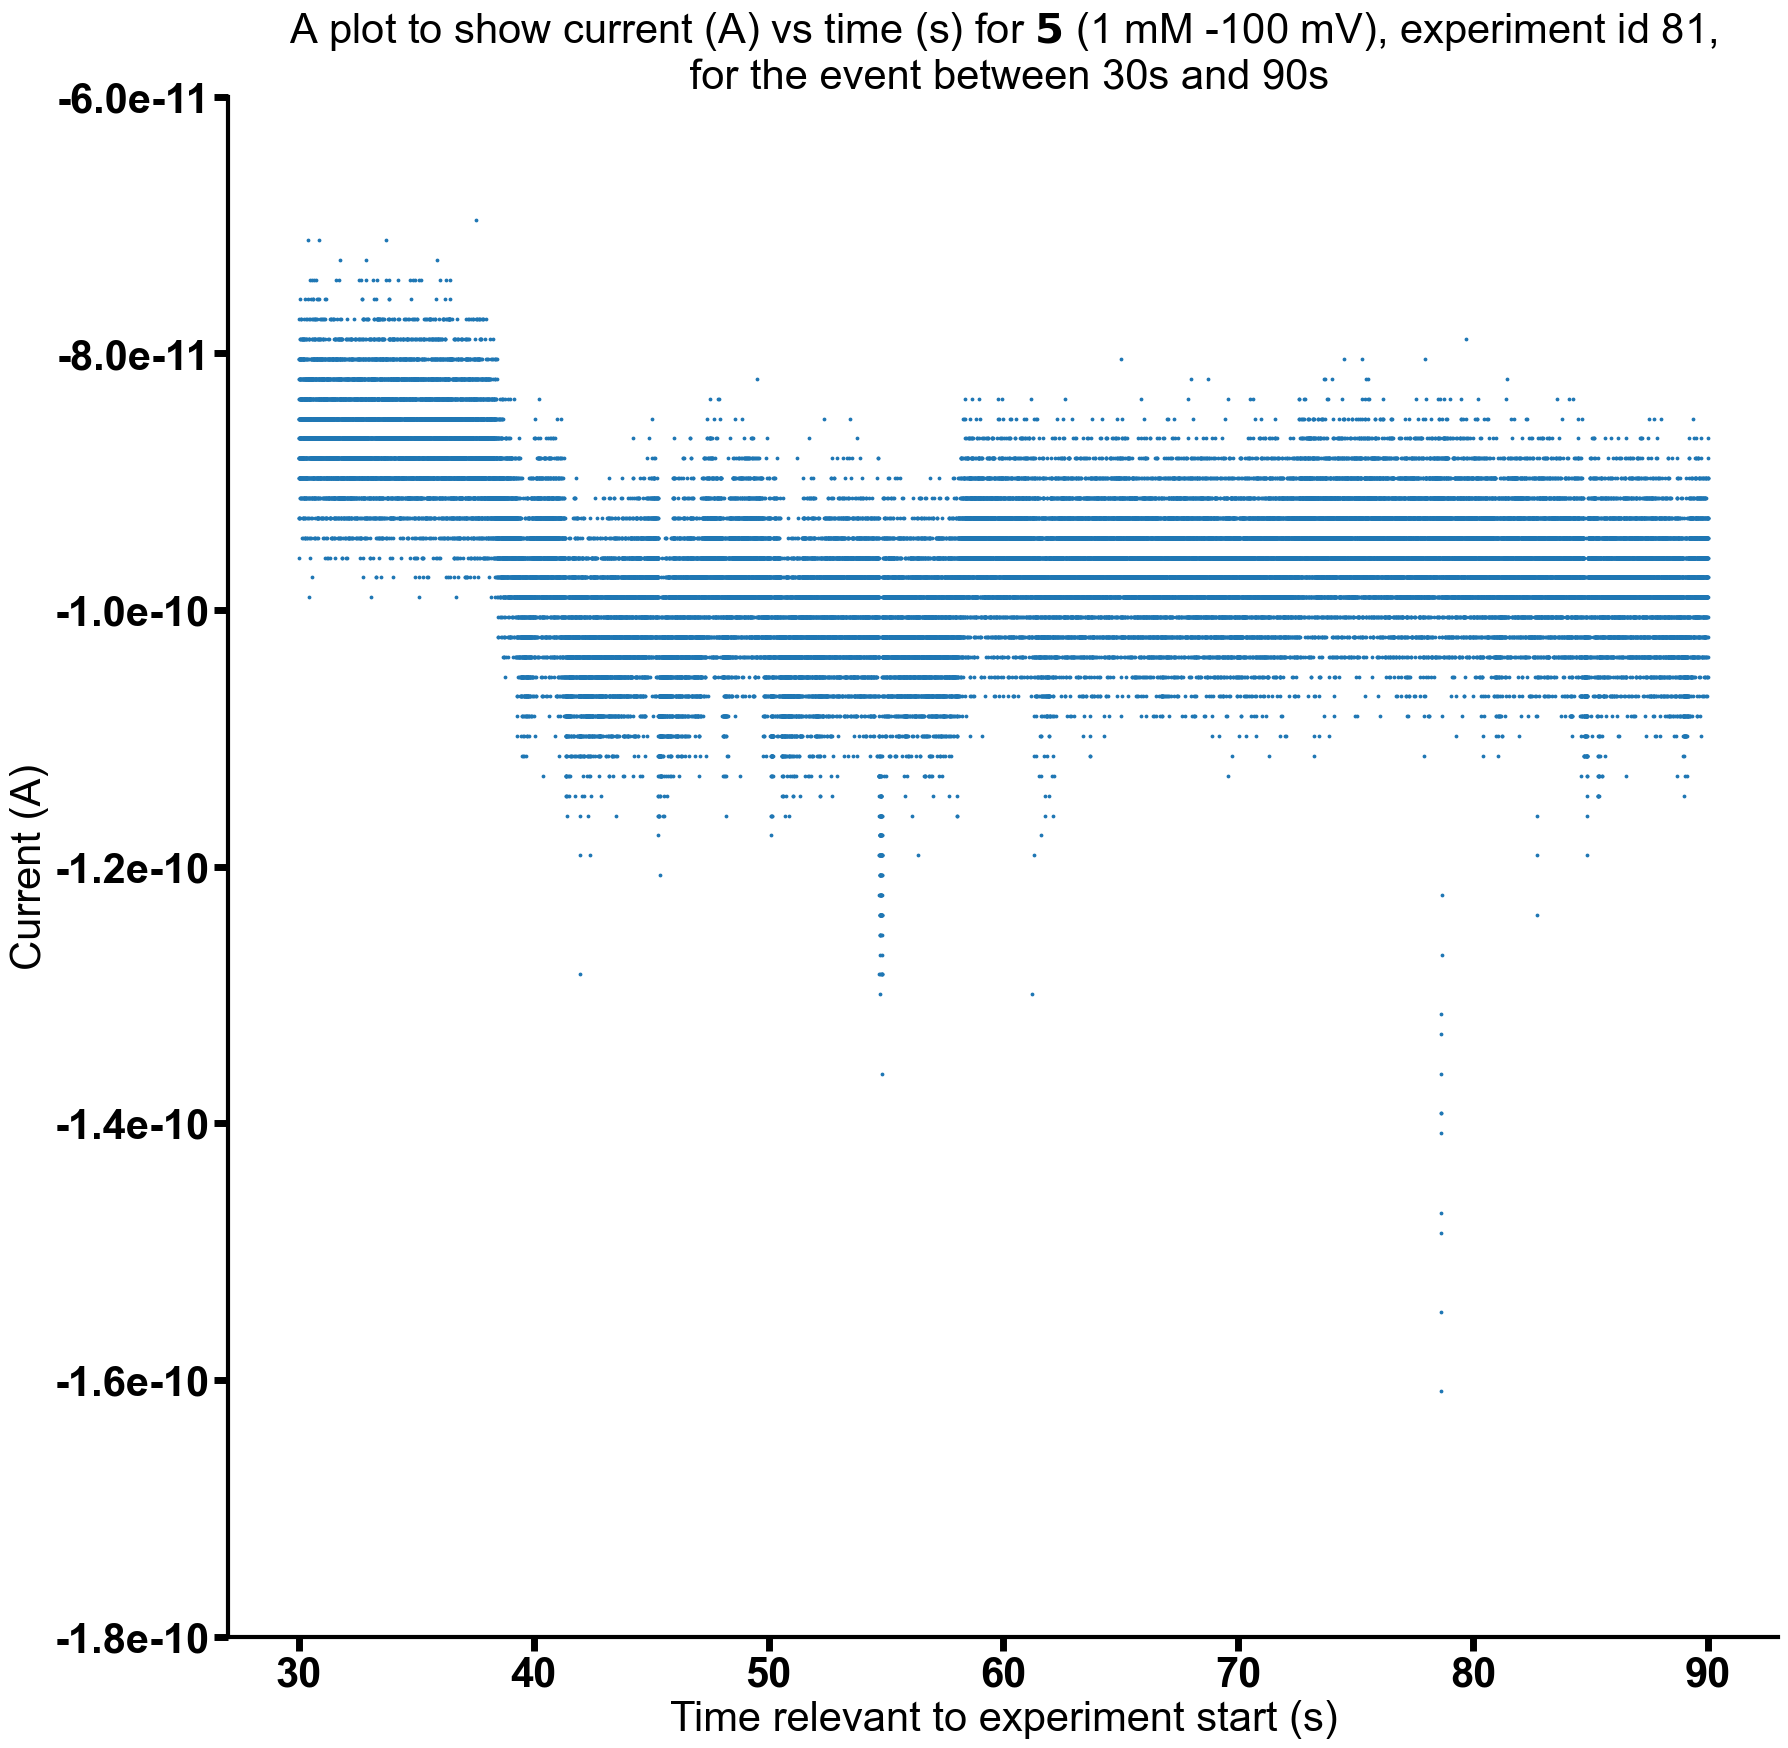

mol_5_cond_1_mM_-100_mV_82
82
mol_5_cond_1_mM_-100_mV_84
84
mol_5_cond_1_mM_-50_mV_71
71
mol_5_cond_1_mM_-50_mV_78
78


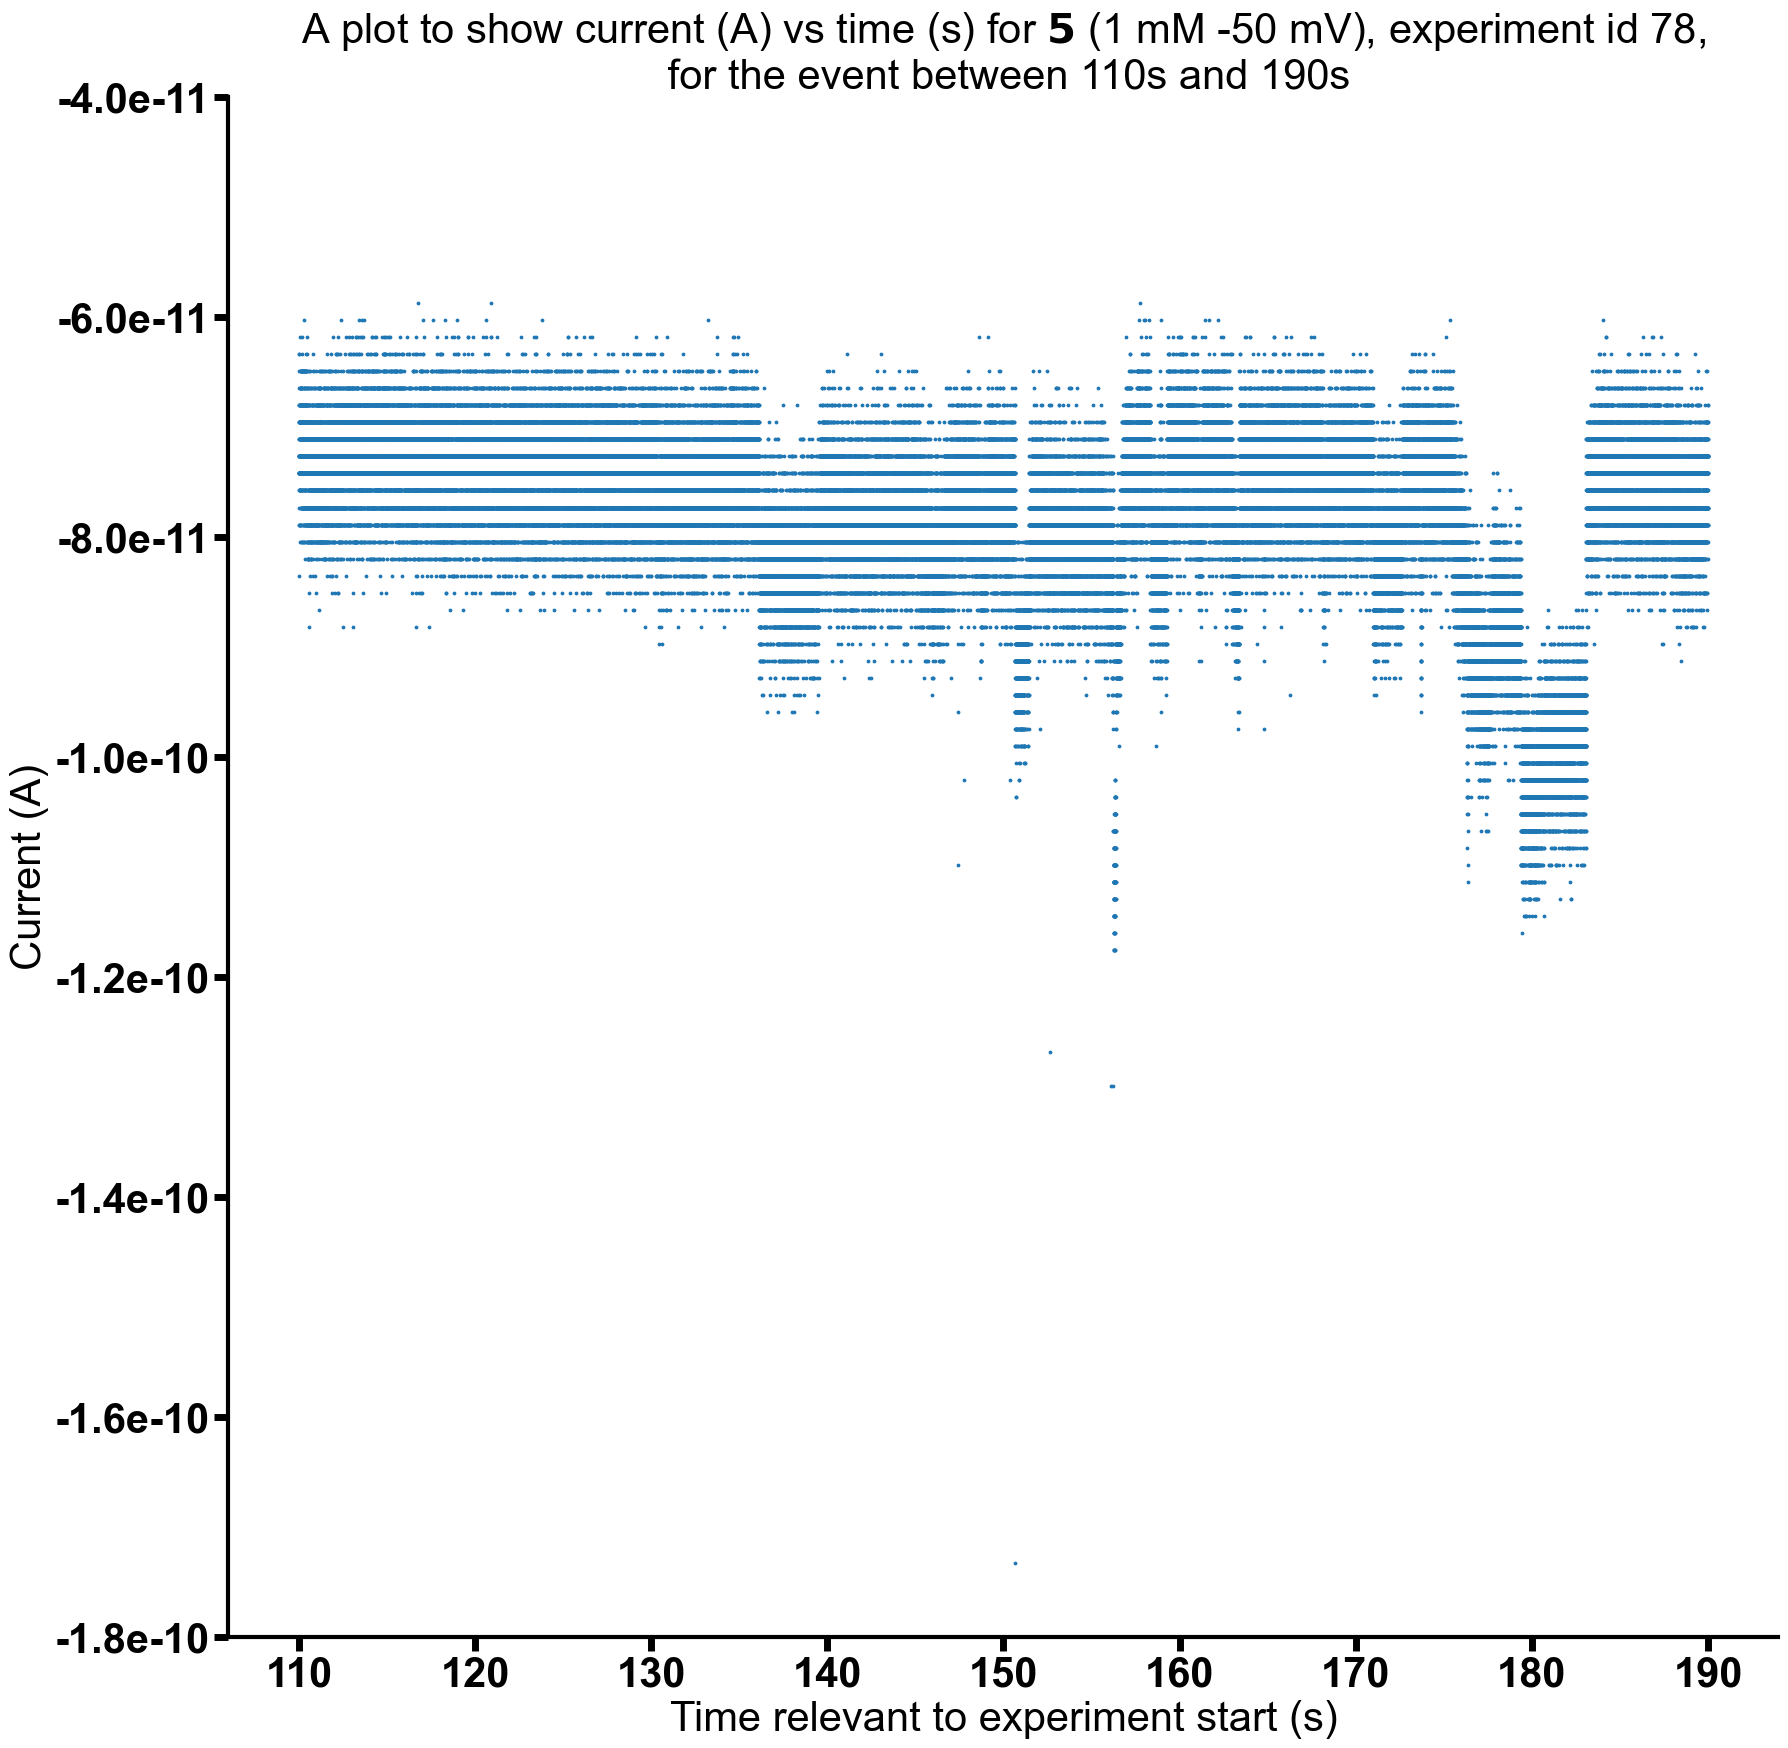

mol_5_cond_1_mM_-50_mV_79
79
mol_5_cond_1_mM_-50_mV_80
80


In [30]:
batch_size = 5

for i in range(0, len(file_paths), batch_size):#len(file_paths)
    batch_file_paths = file_paths[i:i+batch_size]
    batch_molecule_ids = molecule_ids[i:i+batch_size]
    batch_exp_ids = exp_ids[i:i+batch_size]
    batch_conds = conds[i:i+batch_size]

    for file_path, molecule_id, exp_id, cond in zip(batch_file_paths, batch_molecule_ids, batch_exp_ids, batch_conds):
        variable_name = f"mol_{molecule_id}_cond_{cond.replace(' ','_').replace('.','')}_{exp_id}"
        print(variable_name)
        exp_cond = cond#'1 mM'
        if cond == '1 mM +100 mV':
            current_bins=[-float('inf'), 0.5e-10, 5e-10, 4.9e-8, float('inf')]
            labels=None
        if cond == '1 mM +50 mV':
            current_bins= [-float('inf'), 0.25e-10, 2.5e-10, 4.9e-8, float('inf')]
            labels=None
        if cond == '1 mM -100 mV':
            current_bins= [-float('inf'), -4.9e-8, -5e-10, -0.5e-10, float('inf')]
            labels=[3,2,1,0]
        if cond == '1 mM -50 mV': 
            current_bins= [-float('inf'), -4.9e-8, -2.5e-10, -0.25e-10, float('inf')]
            labels=[3,2,1,0]
        print(exp_id)  
        if int(exp_id) == 75:
            print('here')
            instance = PatchClampData(file_path, molecule_id=molecule_id,exp_cond=exp_cond)
            instance.basic_static_plot_timesearch(430,500)
        if int(exp_id) == 73:
            instance = PatchClampData(file_path, molecule_id=molecule_id,exp_cond=exp_cond)
            instance.basic_static_plot_timesearch(110,190)
        if int(exp_id) == 78:
            instance = PatchClampData(file_path, molecule_id=molecule_id,exp_cond=exp_cond)
            instance.basic_static_plot_timesearch(110,190)
        if int(exp_id) == 81:
            instance = PatchClampData(file_path, molecule_id=molecule_id,exp_cond=exp_cond)
            instance.basic_static_plot_timesearch(30,90)
        
        

[0, 1, 2, 3]
label is   0
label is   1
label is   2
label is   3
{0: (-inf, 5e-11), 1: (5e-11, 5e-10), 2: (5e-10, 4.9e-08), 3: (4.9e-08, inf)}


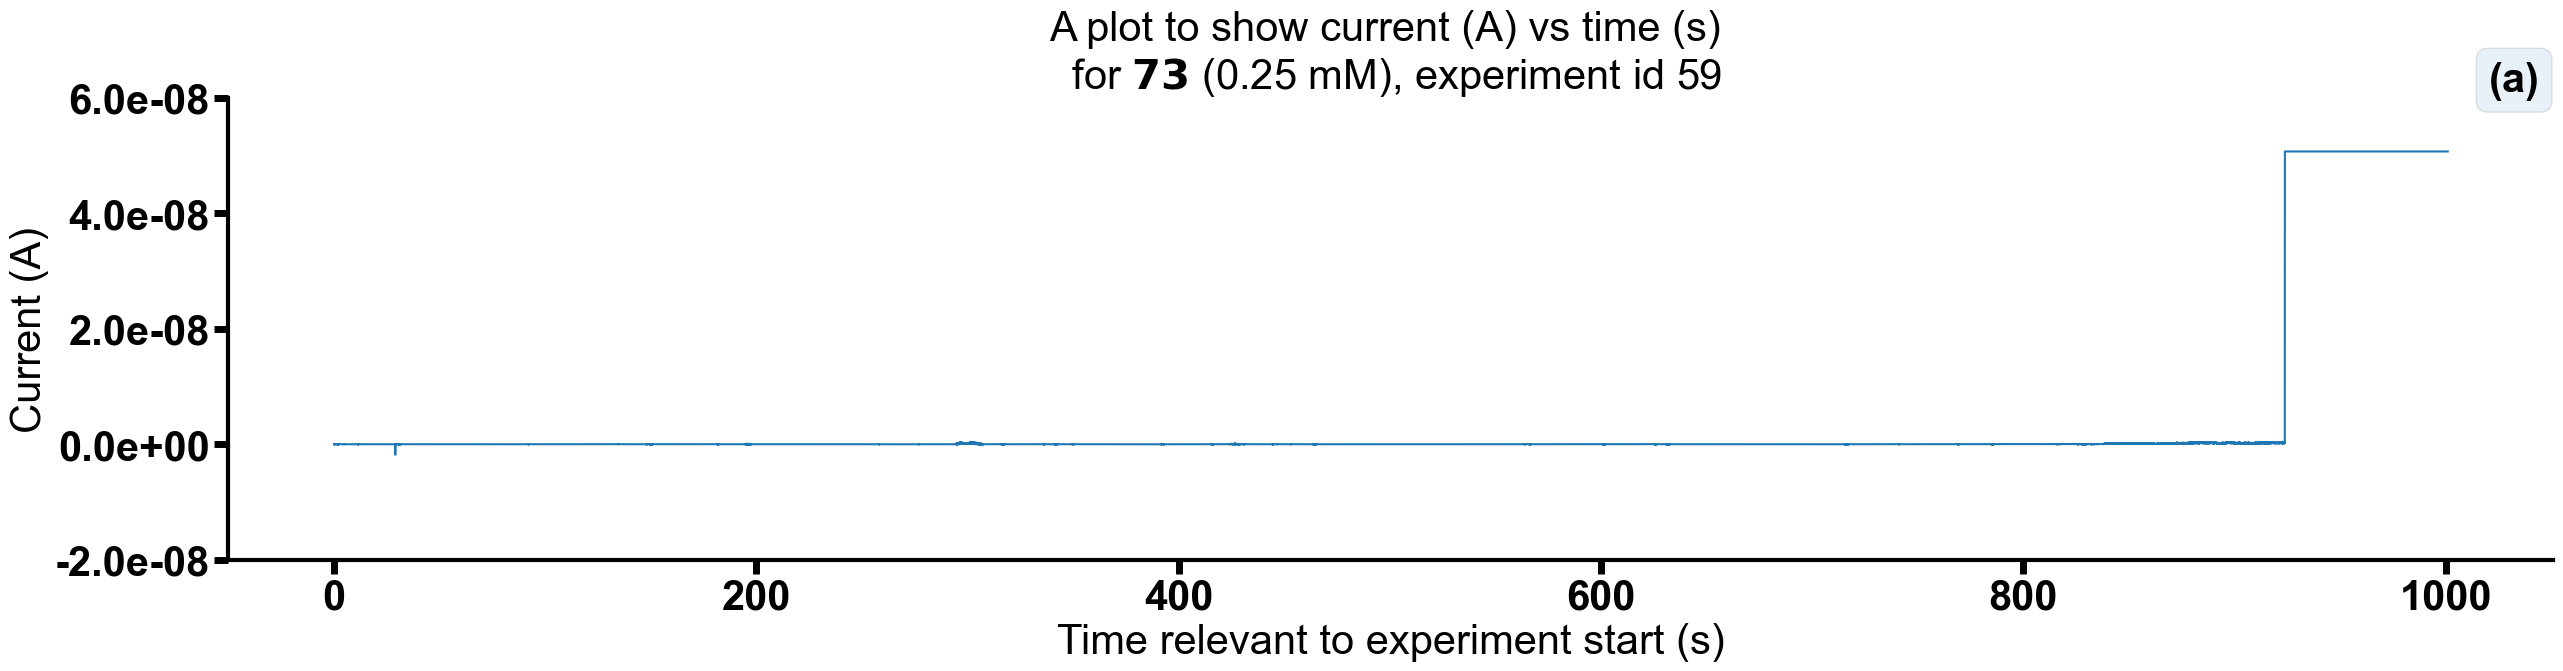

[0, 1, 2, 3]


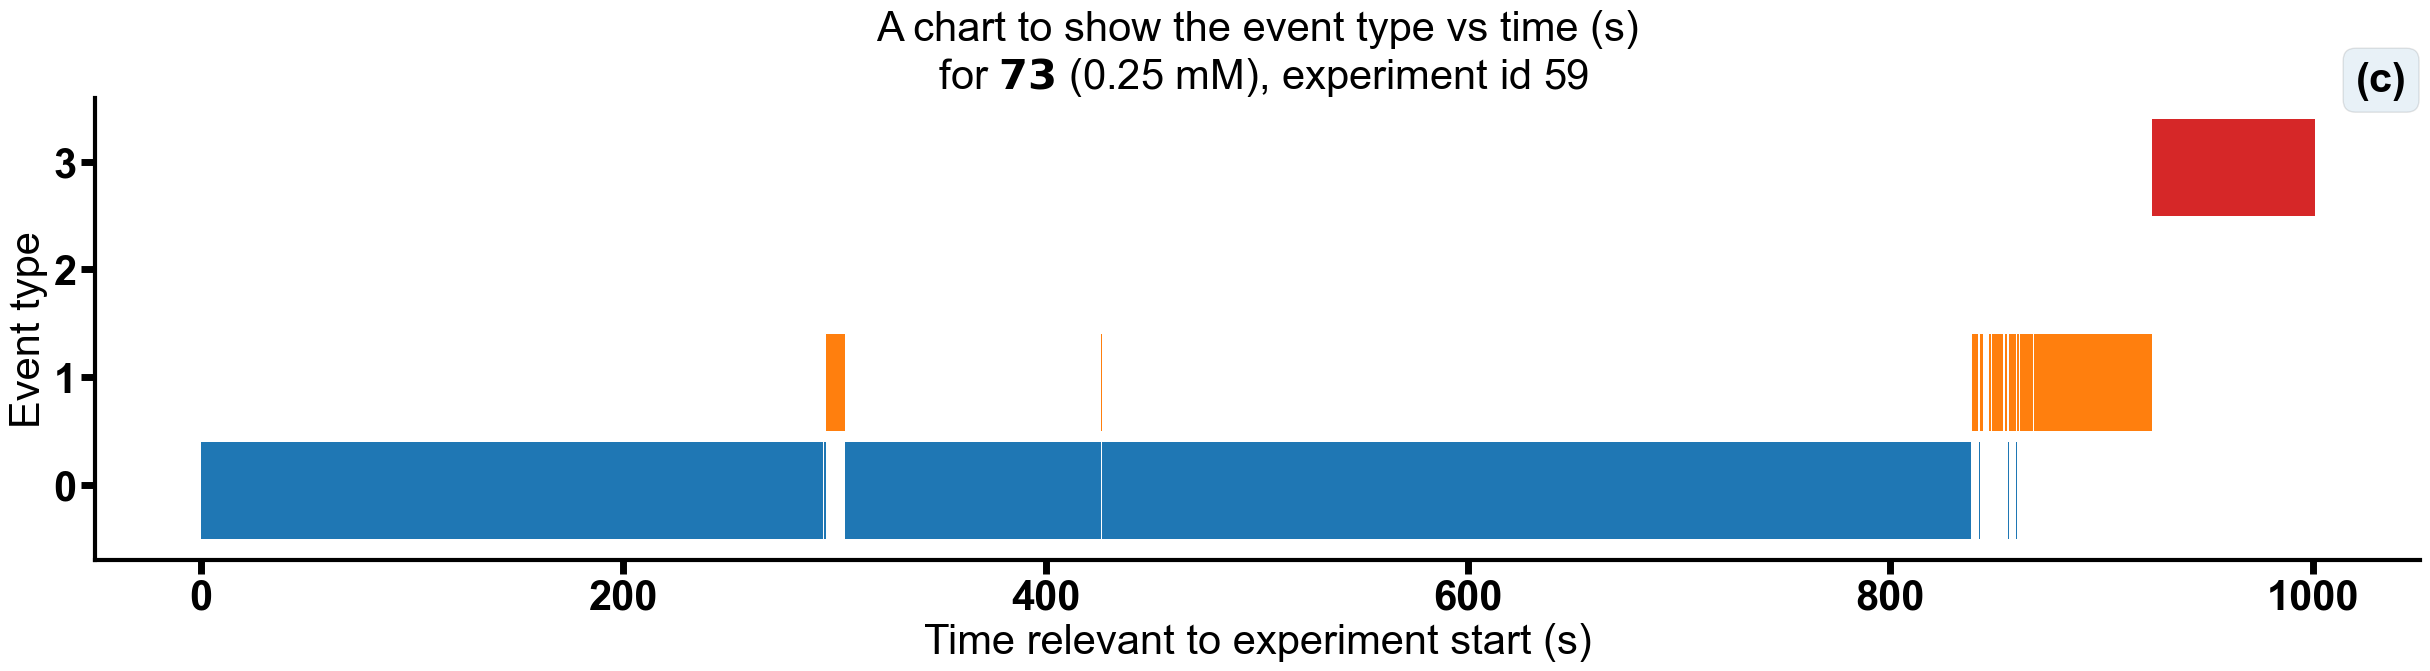

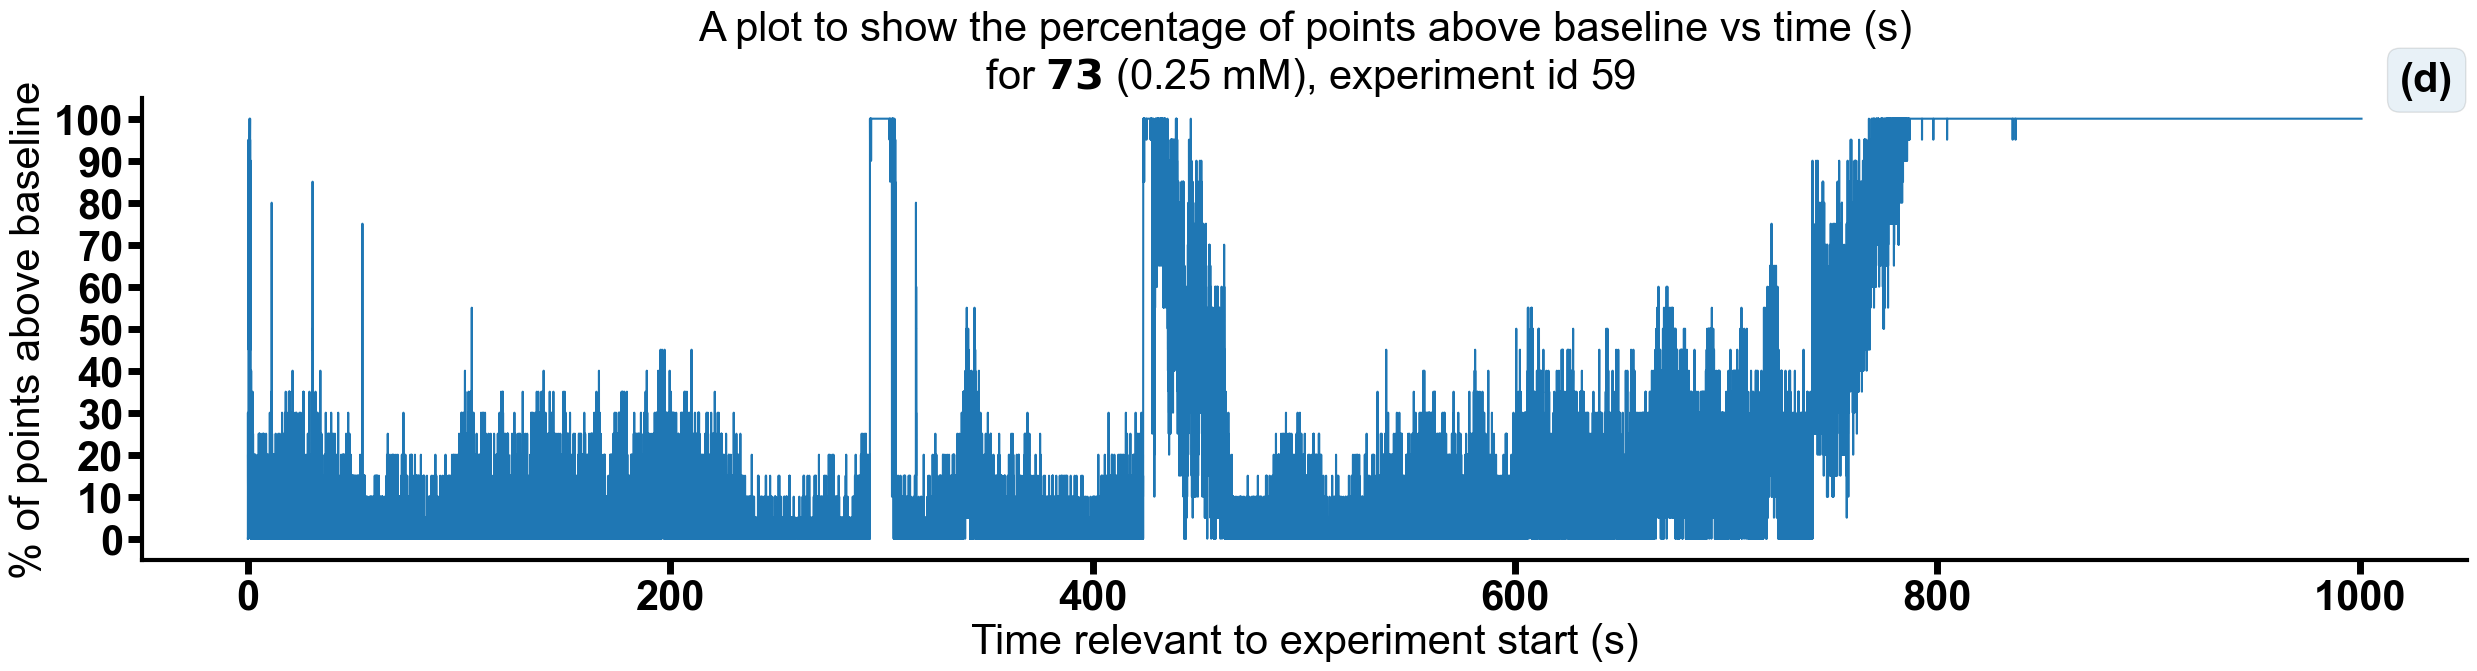

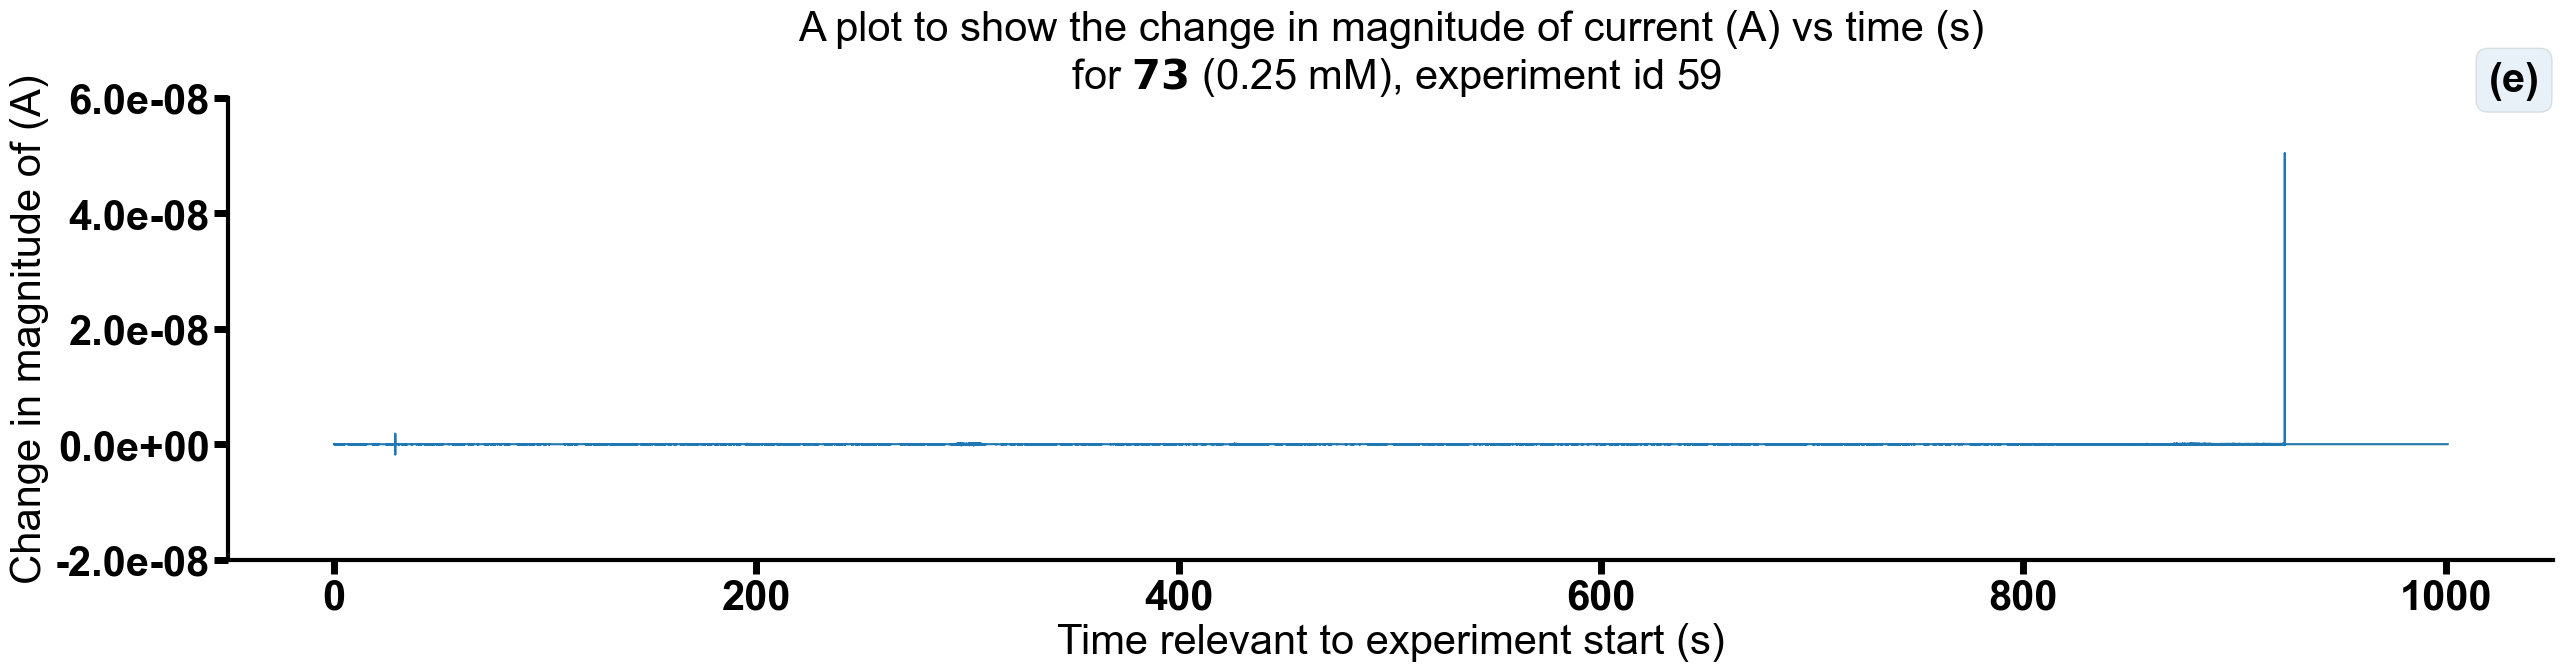

In [4]:
instance.categorize_data(bin_range=True)
instance.bin_event_allocation_summary()
instance.create_fig_caption()
instance.generate_interactive_plot()
instance.basic_static_plot()
instance.static_plot_with_labels()
instance.plot_gantt()
instance.time_vs_percentage_of_points_above_baseline_allocation_plot()
instance.time_vs_change_in_current_plot()
instance.static_event_plots(append_to_figure_doc=True,max_current_cutoff=5e-10)
instance.create_combined_figure(append_to_figure_doc=True)
instance.experiment_summary_dataframe.to_csv(f'experiment_summary_variable_current.csv', index=True)